# **Enhance the Prediction of Breast Cancer by Applying Machine Learning Algorithms.**

[Breast Cancer Dataset from Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

Note: Parameter Selection takes a lot of time to run, you can search "Parameter Selection" and comment them out to reduce running time.

# **Data Processing**

In [ ]:
# import libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
from google.colab import files
uploaded = files.upload()

# change dataset file name to breastcancer.csv (remove"_")
df = pd.read_csv('breastcancer.csv')

Saving breastcancer.csv to breastcancer.csv


In [ ]:
# Count the number of rows and columns in the data set
df.shape

(569, 32)

In [ ]:
# Count the number of empty (NaN, NAN, na) values in each column
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Drop the column with all missing values
df = df.dropna(axis=1)

In [ ]:
# Get the new count of the number of rows and columns
df.shape

(569, 32)

In [ ]:
# Get a count of the number of Malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

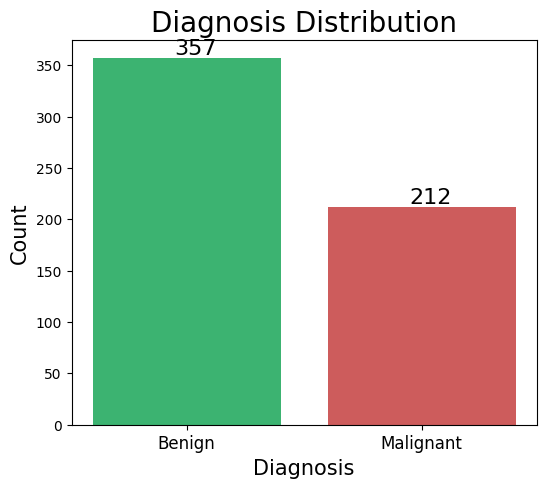

In [ ]:
import matplotlib.pyplot as plt

# Count the values of 'diagnosis'
diagnosis_values = df['diagnosis'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(['Benign', 'Malignant'], diagnosis_values, color=['mediumseagreen', 'indianred'])

plt.xlabel('Diagnosis', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Diagnosis Distribution', fontsize=20)

# Add count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.3, yval, round(yval, 2), va='bottom', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

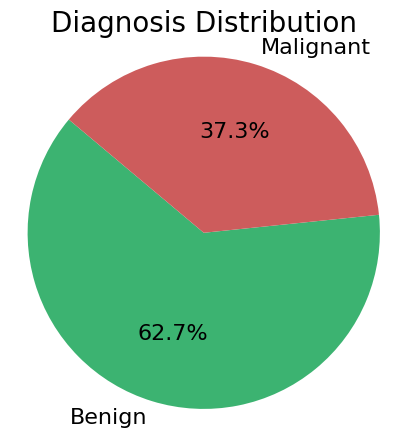

In [ ]:
import matplotlib.pyplot as plt

# Count the values of 'diagnosis'
diagnosis_values = df['diagnosis'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(diagnosis_values, labels=['Benign', 'Malignant'], autopct='%1.1f%%', startangle=140, colors=['mediumseagreen', 'indianred'], textprops={'fontsize': 16})
plt.axis('equal')
plt.title('Diagnosis Distribution', fontsize=20)
plt.show()

In [ ]:
# Look at the data types to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
laberencoder_Y = LabelEncoder()
df[df.columns[1]] = laberencoder_Y.fit_transform(df.iloc[:,1].values) #B->0, M->1

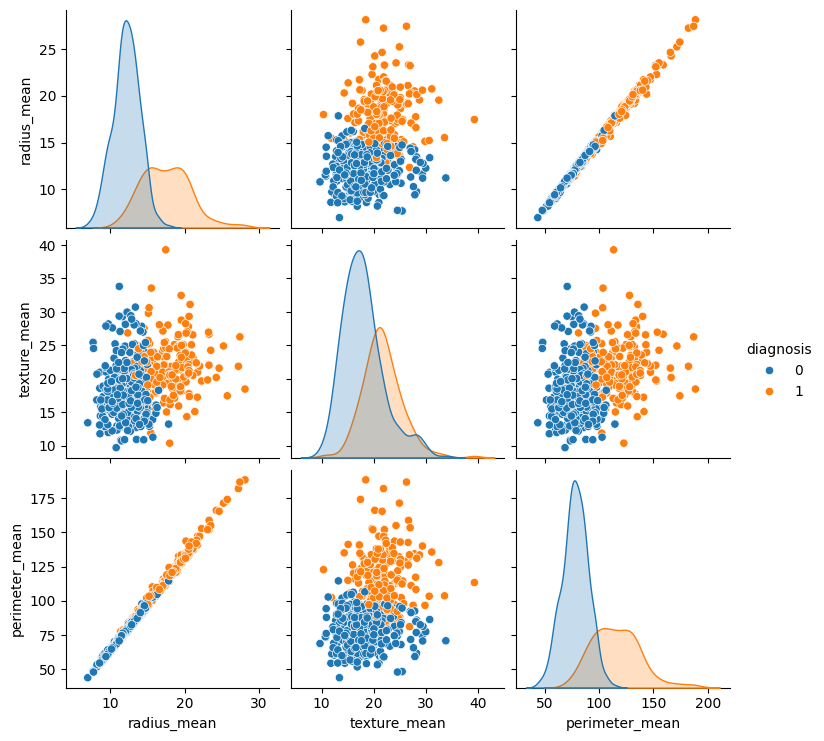

In [ ]:
# Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue = 'diagnosis')

In [ ]:
# Print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Get the correlation of the columns
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

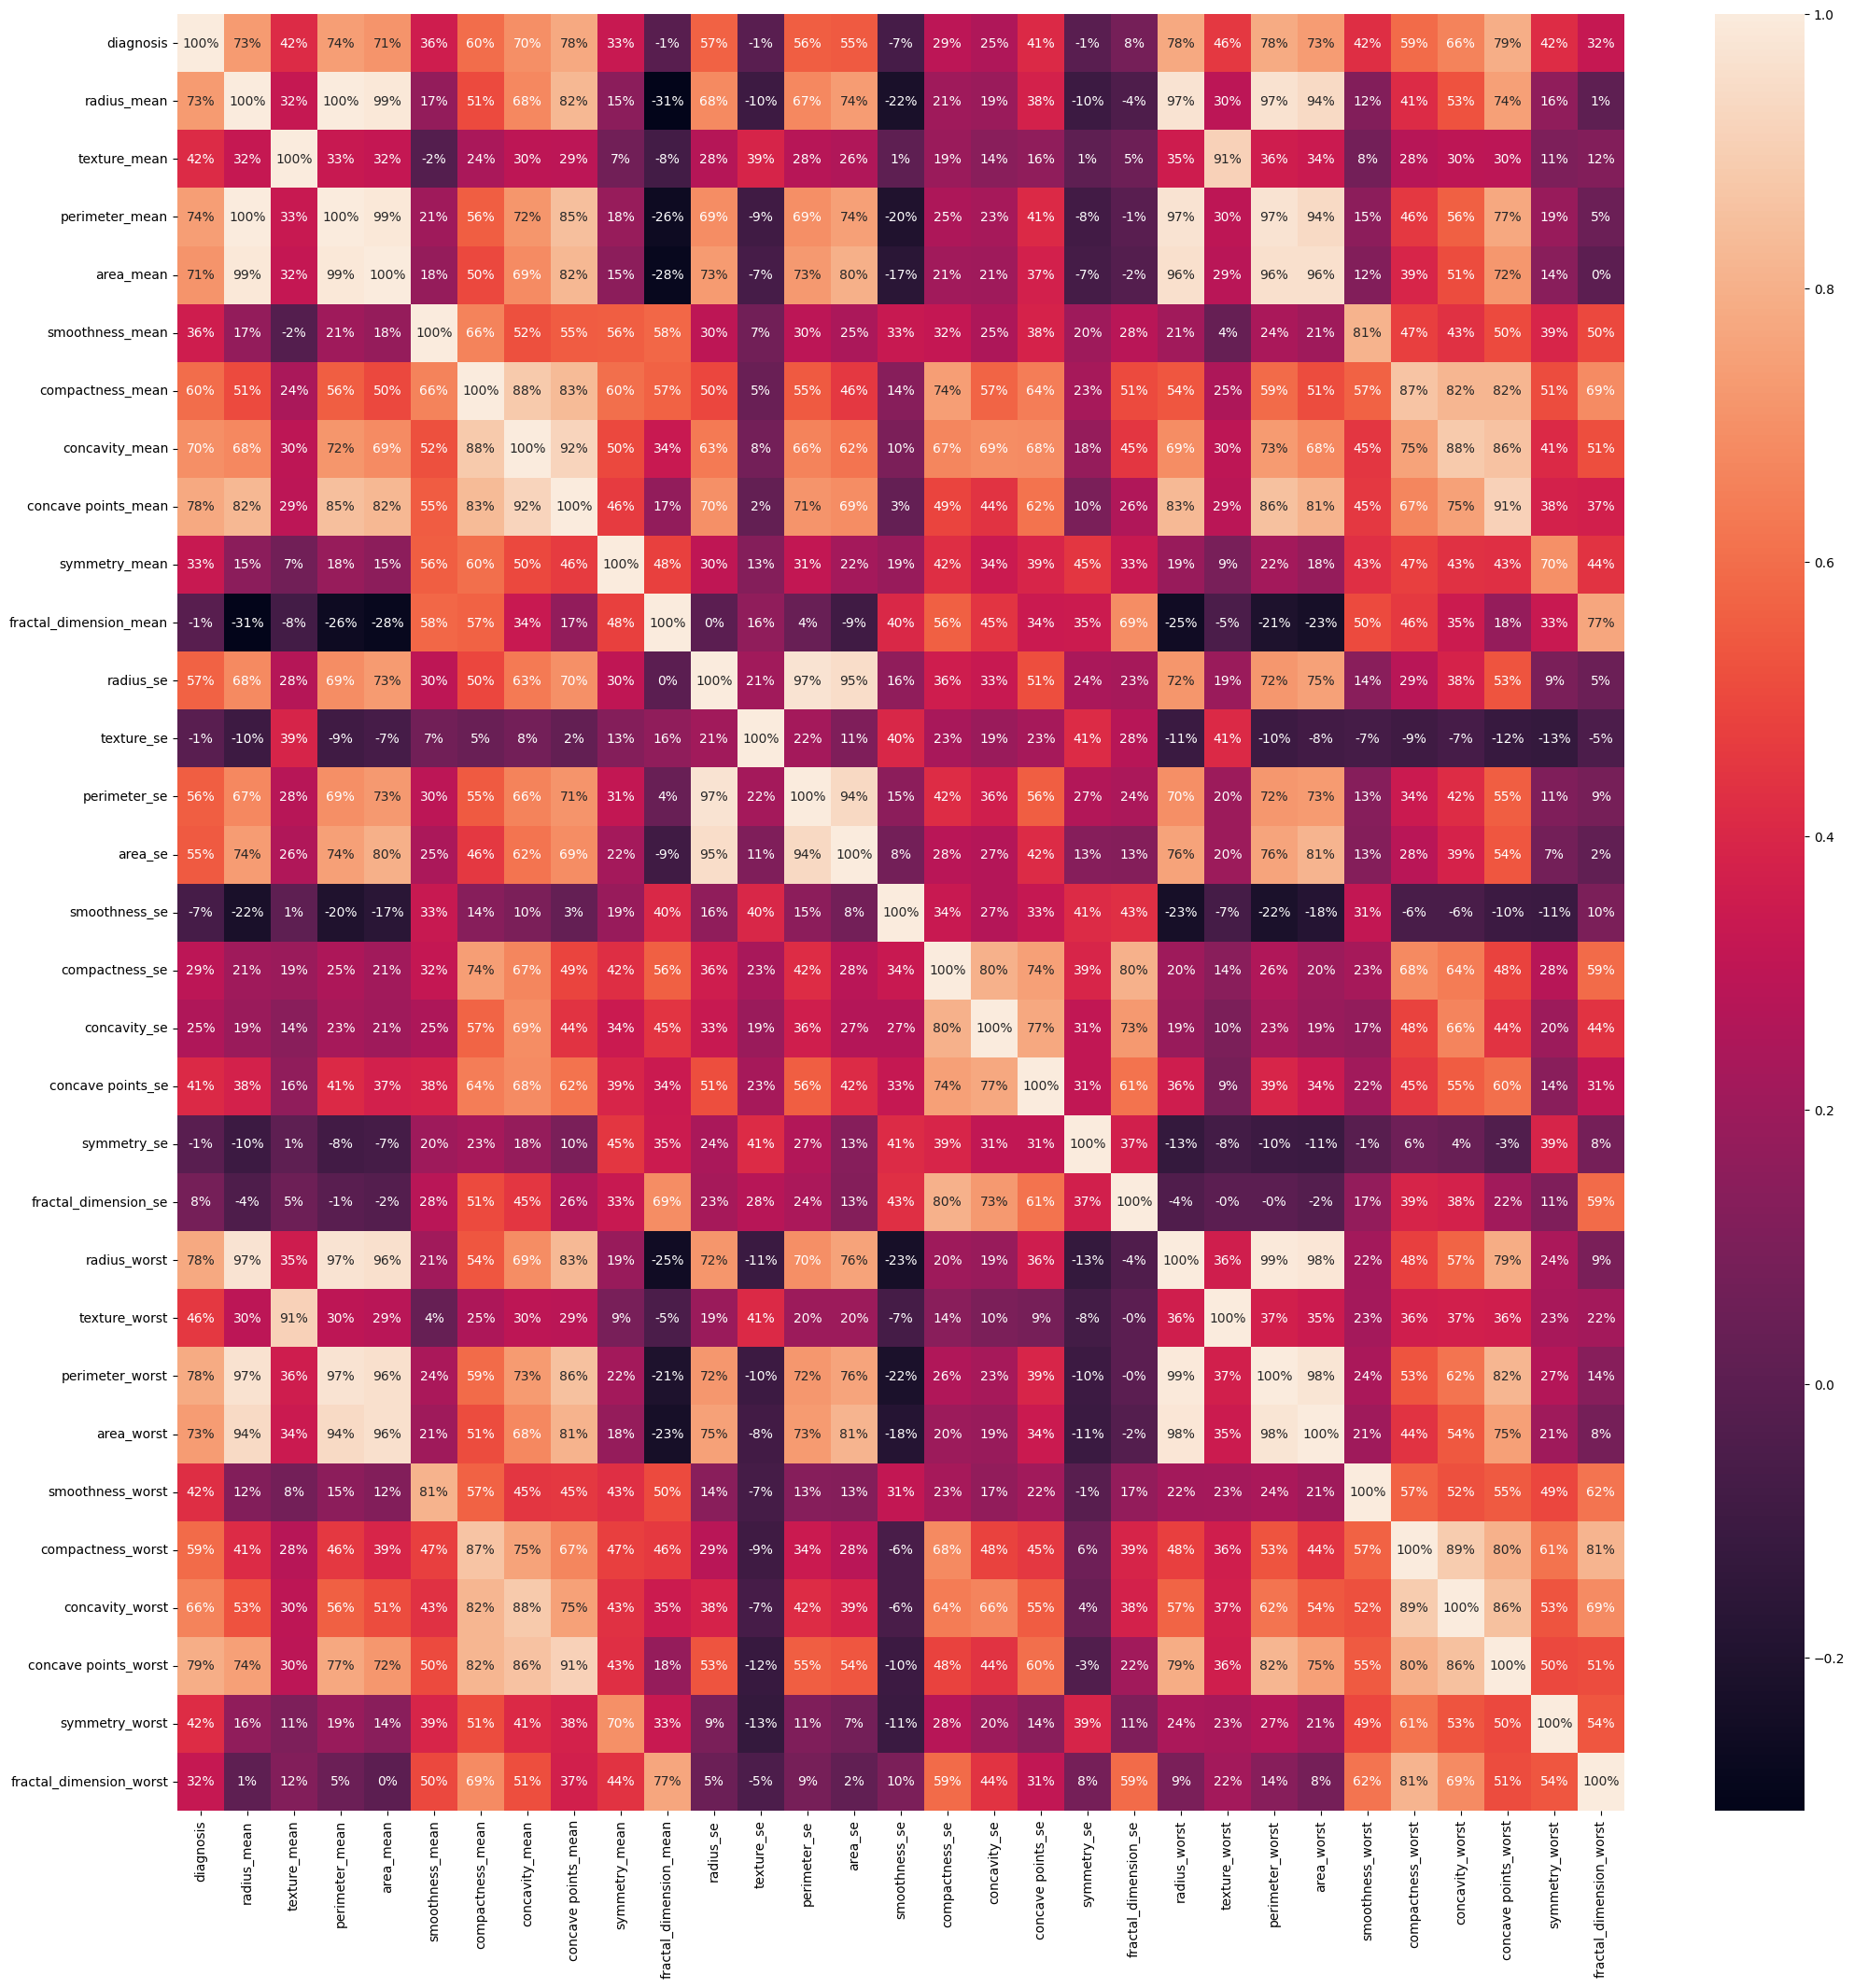

In [ ]:
# Visualize the correlation
plt.figure(figsize=(25,25))
sns.heatmap(df.iloc[:,1:32].corr(), annot=True,fmt='.0%')

In [ ]:
# A new version to train model one by one and try to show result in a table

# 1: drop area feature due to high correlation with radius, perimeter
# data = df.drop('id', axis=1)
# data = df.drop('area_mean', axis=1)
# data = df.drop('area_se', axis=1)
# data = df.drop('area_worst', axis=1)
# Xs = data

X = df.iloc[:,2:32]
y = df.iloc[:,1]
y = np.ravel(y)

# Scaler data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Cross-Validation, train data set 85%, test data set 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# PCA Data Visualization and Dimension reduction
from sklearn.decomposition import PCA

# Create a PCA with 2 components
pca2 = PCA(n_components=2, whiten=True)
# Create a PCA with 3 components
pca3 = PCA(n_components=3, whiten=True)
# Create a PCA with 4 components
pca4 = PCA(n_components=4, whiten=True)
# Create a PCA with 5 components
pca5 = PCA(n_components=5, whiten=True)
# Create a PCA with 6 components
pca6 = PCA(n_components=6, whiten=True)
# Create a PCA with 7 components
pca7 = PCA(n_components=7, whiten=True)

# Conduct PCA
X2 = pca2.fit_transform(X)
X3 = pca3.fit_transform(X)
X4 = pca4.fit_transform(X)
X5 = pca5.fit_transform(X)
X6 = pca6.fit_transform(X)
X7 = pca7.fit_transform(X)

# Split the transformed data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.25, random_state=0)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.25, random_state=0)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.25, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.25, random_state=0)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.25, random_state=0)

# Print Feature Dimensions
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X2.shape[1])
print('Reduced number of features:', X3.shape[1])
print('Reduced number of features:', X4.shape[1])
print('Reduced number of features:', X5.shape[1])
print('Reduced number of features:', X6.shape[1])
print('Reduced number of features:', X7.shape[1])

# Print explained variance
print('Explained variation per principal component for PCA 2: {}'.format(pca2.explained_variance_ratio_))
print('Explained variation per principal component for PCA 3: {}'.format(pca3.explained_variance_ratio_))
print('Explained variation per principal component for PCA 4: {}'.format(pca4.explained_variance_ratio_))
print('Explained variation per principal component for PCA 5: {}'.format(pca5.explained_variance_ratio_))
print('Explained variation per principal component for PCA 6: {}'.format(pca6.explained_variance_ratio_))
print('Explained variation per principal component FOR PCA 7: {}'.format(pca6.explained_variance_ratio_))

Original number of features: 30
Reduced number of features: 2
Reduced number of features: 3
Reduced number of features: 4
Reduced number of features: 5
Reduced number of features: 6
Reduced number of features: 7
Explained variation per principal component for PCA 2: [0.44272026 0.18971182]
Explained variation per principal component for PCA 3: [0.44272026 0.18971182 0.09393163]
Explained variation per principal component for PCA 4: [0.44272026 0.18971182 0.09393163 0.06602135]
Explained variation per principal component for PCA 5: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
Explained variation per principal component for PCA 6: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]
Explained variation per principal component FOR PCA 7: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]


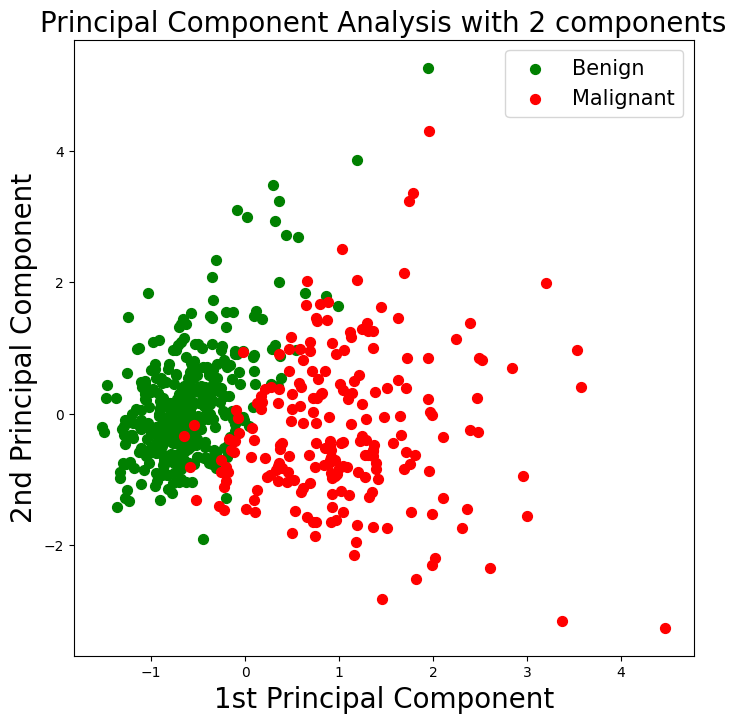

In [ ]:
# PCA Data Visualization for PCA 2
principal_breast_Df2 = pd.DataFrame(data=X2, columns=['principal component 1', 'principal component 2'])

plt.figure(figsize=(8,8))
plt.xlabel('1st Principal Component', fontsize=20)
plt.ylabel('2nd Principal Component', fontsize=20)
plt.title("Principal Component Analysis with 2 components", fontsize=20)
targets = [0, 1] # data encoded, B->0, M->1
colors = ['g', 'r']
legend_labels = {0: 'Benign', 1: 'Malignant'}

for target, color in zip(targets, colors):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(principal_breast_Df2.loc[indicesToKeep, 'principal component 1'],
                principal_breast_Df2.loc[indicesToKeep, 'principal component 2'],
                c=color, s=50, label=legend_labels[target])

plt.legend(prop={'size': 15})
plt.show()

From the above graph, you can observe that the two classes benign(0/green) and malignant(1/red), when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

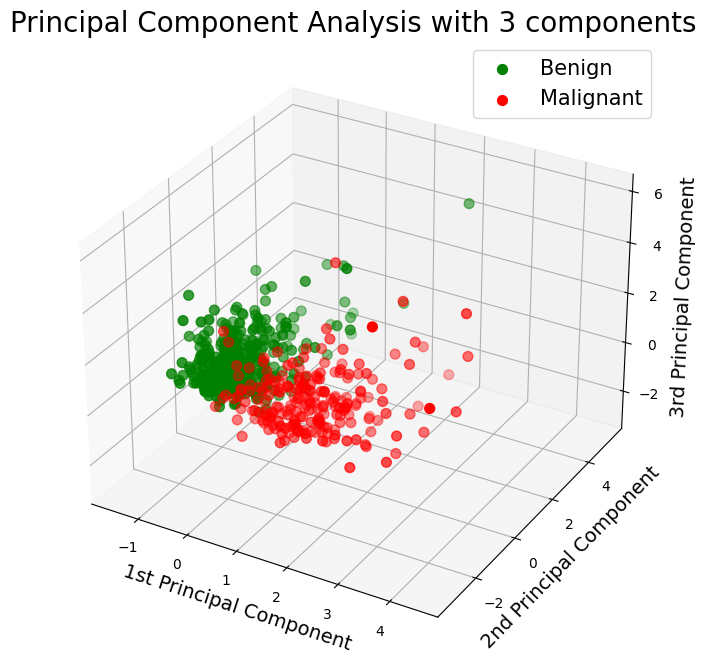

In [ ]:
# PCA Data Visualization for PCA 3
principal_breast_Df3 = pd.DataFrame(data=X3, columns=['principal component 1', 'principal component 2', 'principal component 3'])

# Plot the data
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')  # Create a 3D axes object
ax.set_xlabel('1st Principal Component', fontsize=14)
ax.set_ylabel('2nd Principal Component', fontsize=14)
ax.set_zlabel('3rd Principal Component', fontsize=14)
ax.set_title("Principal Component Analysis with 3 components", fontsize=20)
targets = [0, 1]  # Data encoded, B->0, M->1
colors = ['g', 'r']
legend_labels = {0: 'Benign', 1: 'Malignant'}

for target, color in zip(targets, colors):
    indicesToKeep = y == target
    ax.scatter3D(principal_breast_Df3.loc[indicesToKeep, 'principal component 1'],
                 principal_breast_Df3.loc[indicesToKeep, 'principal component 2'],
                 principal_breast_Df3.loc[indicesToKeep, 'principal component 3'],
                 c=color, s=50, label=legend_labels[target])

ax.legend(prop={'size': 15})
plt.show()

In [ ]:
# Kernel PCA Parameter Selection (comment out can save time)
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift

# Define the parameters grid
param_grid = {
    'alpha': [0.1, 0.5, 1]   # Values for the alpha parameter (regularization strength)
}

# Create KernelPCA object
kernel_pca = KernelPCA(kernel="rbf", fit_inverse_transform=True)

# Define a custom scoring function using ARI
def kmeans_custom_scoring(estimator, X, y=None):
    # Compute clustering using Kernel PCA
    transformed_X = estimator.fit_transform(X)
    # Perform Kmeans Clustering
    kmeans = KMeans(n_clusters=2, n_init=10)
    kmeans_pred = kmeans.fit_predict(transformed_X)
    # Calculate ARI
    kmeans_ari = adjusted_rand_score(y, kmeans_pred)
    return kmeans_ari

def hierarchical_custom_scoring(estimator, X, y=None):
    # Compute clustering using Kernel PCA
    transformed_X = estimator.fit_transform(X)
    # Perform Hierarchical clustering
    hierarchical = AgglomerativeClustering(n_clusters=2)
    hierarchical_pred = hierarchical.fit_predict(transformed_X)
    # Calculate ARI
    hierarchical_ari = adjusted_rand_score(y, hierarchical_pred)
    return hierarchical_ari

def meanshift_custom_scoring(estimator, X, y=None):
    # Compute clustering using Kernel PCA
    transformed_X = estimator.fit_transform(X)
    # Perform MeanShift clustering
    meanshift = MeanShift()
    meanshift_pred = meanshift.fit_predict(transformed_X)
    # Calculate ARI
    meanshift_ari = adjusted_rand_score(y, meanshift_pred)
    return meanshift_ari

# Perform grid search for Kmeans Clustering
kmeans_grid_search = GridSearchCV(kernel_pca, param_grid, cv=5, scoring=kmeans_custom_scoring)
kmeans_grid_search.fit(X, df["diagnosis"])  # Fit on your data X and true labels

# Perform grid search for Hierarchical clustering
hierarchical_grid_search = GridSearchCV(kernel_pca, param_grid, cv=5, scoring=hierarchical_custom_scoring)
hierarchical_grid_search.fit(X, df["diagnosis"])  # Fit on your data X and true labels

# Perform grid search for MeanShift clustering
meanshift_grid_search = GridSearchCV(kernel_pca, param_grid, cv=5, scoring=meanshift_custom_scoring)
meanshift_grid_search.fit(X, df["diagnosis"])  # Fit on your data X and true labels

# Print the best parameters found
print("Kernel PCA Best parameters for Kmeans:", kmeans_grid_search.best_params_)
# Print the best parameters found
print("Kernel PCA Best parameters for Hierarchical:", hierarchical_grid_search.best_params_)
# Print the best parameters found
print("Kernel PCA Best parameters for MeanShift:", meanshift_grid_search.best_params_)

Kernel PCA Best parameters for Kmeans: {'alpha': 1}
Kernel PCA Best parameters for Hierarchical: {'alpha': 0.1}
Kernel PCA Best parameters for MeanShift: {'alpha': 0.1}


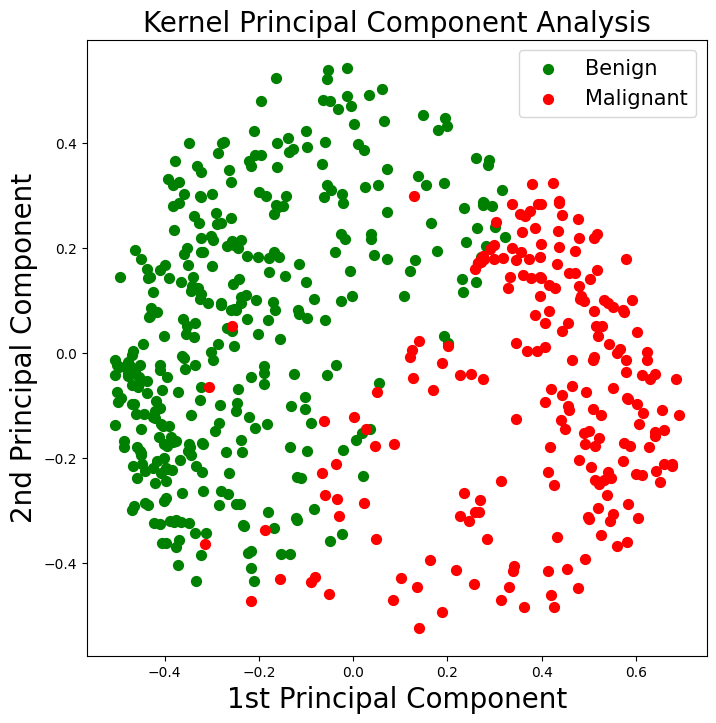

In [ ]:
# Kernel PCA Data Visualization and Dimension reduction
from sklearn.decomposition import KernelPCA

# Create kernel PCA
kernel_pca = KernelPCA(n_components = 2, kernel="rbf" ,alpha=0.1, fit_inverse_transform=True)

# Conduct PCA
XKernel = kernel_pca.fit_transform(X)

# Split data into train and test sets
XKernel_train, XKernel_test, yKernel_train, yKernel_test = train_test_split(XKernel, y, test_size=0.25, random_state=0)

plt.figure(figsize=(8, 8))
plt.xlabel('1st Principal Component', fontsize=20)
plt.ylabel('2nd Principal Component', fontsize=20)
plt.title("Kernel Principal Component Analysis", fontsize=20)

targets = [0, 1] # data encoded, B->0, M->1
colors = ['g', 'r']
legend_labels = {0: 'Benign', 1: 'Malignant'}

for target, color in zip(targets, colors):
    indicesToKeep = y == target
    plt.scatter(XKernel[indicesToKeep, 0], XKernel[indicesToKeep, 1], c=color, s=50, label=legend_labels[target])

plt.legend(prop={'size': 15})
plt.show()



---


# **Classfication Model**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import time

In [ ]:
# Logistic Regression Parameter Selection (You can comment out to save time)

# Define the range of parameter values to explore
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

best_score1 = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

best_params1 = None  # Initialize the best parameters for All features
best_params2 = None  # Initialize the best parameters for PCA 2
best_params3 = None  # Initialize the best parameters for PCA 3
best_params4 = None  # Initialize the best parameters for PCA 4
best_params5 = None  # Initialize the best parameters for PCA 5
best_params6 = None  # Initialize the best parameters for PCA 6
best_params7 = None  # Initialize the best parameters for PCA 7
best_paramsKernel = None  # Initialize the best parameters for Kernel PCA

for params in ParameterGrid(param_grid):
    # Create separate LogisticRegression instances for each dataset
    lr1 = LogisticRegression(**params, max_iter=1000)
    lr2 = LogisticRegression(**params, max_iter=1000)
    lr3 = LogisticRegression(**params, max_iter=1000)
    lr4 = LogisticRegression(**params, max_iter=1000)
    lr5 = LogisticRegression(**params, max_iter=1000)
    lr6 = LogisticRegression(**params, max_iter=1000)
    lr7 = LogisticRegression(**params, max_iter=1000)
    lrKernel = LogisticRegression(**params, max_iter=1000)

    # Fit LogisticRegression to each dataset
    lr1.fit(X_train, y_train)
    lr2.fit(X2_train, y2_train)
    lr3.fit(X3_train, y3_train)
    lr4.fit(X4_train, y4_train)
    lr5.fit(X5_train, y5_train)
    lr6.fit(X6_train, y6_train)
    lr7.fit(X7_train, y7_train)
    lrKernel.fit(XKernel_train, yKernel_train)

    # Predict on test data
    lr1_pred = lr1.predict(X_test)
    lr2_pred = lr2.predict(X2_test)
    lr3_pred = lr3.predict(X3_test)
    lr4_pred = lr4.predict(X4_test)
    lr5_pred = lr5.predict(X5_test)
    lr6_pred = lr6.predict(X6_test)
    lr7_pred = lr7.predict(X7_test)
    lrKernel_pred = lrKernel.predict(XKernel_test)

    # Evaluate LogisticRegression performance using recall score
    score1 = recall_score(y_test, lr1_pred, average='weighted')
    score2 = recall_score(y2_test, lr2_pred, average='weighted')
    score3 = recall_score(y3_test, lr3_pred, average='weighted')
    score4 = recall_score(y4_test, lr4_pred, average='weighted')
    score5 = recall_score(y5_test, lr5_pred, average='weighted')
    score6 = recall_score(y6_test, lr6_pred, average='weighted')
    score7 = recall_score(y7_test, lr7_pred, average='weighted')
    scoreKernel = recall_score(yKernel_test, lrKernel_pred, average='weighted')

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("Logistic Regression Best parameters for All features:", best_params1)
print("Logistic Regression Best recall score for All features:", best_score1)
print("Logistic Regression Best parameters for PCA 2:", best_params2)
print("Logistic Regression Best recall score for PCA 2:", best_score2)
print("Logistic Regression Best parameters for PCA 3:", best_params3)
print("Logistic Regression Best recall score for PCA 3:", best_score3)
print("Logistic Regression Best parameters for PCA 4:", best_params4)
print("Logistic Regression Best recall score for PCA 4:", best_score4)
print("Logistic Regression Best parameters for PCA 5:", best_params5)
print("Logistic Regression Best recall score for PCA 5:", best_score5)
print("Logistic Regression Best parameters for PCA 6:", best_params6)
print("Logistic Regression Best recall score for PCA 6:", best_score6)
print("Logistic Regression Best parameters for PCA 7:", best_params7)
print("Logistic Regression Best recall score for PCA 7:", best_score7)
print("Logistic Regression Best parameters for Kernel PCA:", best_paramsKernel)
print("Logistic Regression Best recall score for Kernel PCA:", best_scoreKernel)

Logistic Regression Best parameters for All features: {'C': 0.1}
Logistic Regression Best recall score for All features: 0.965034965034965
Logistic Regression Best parameters for PCA 2: {'C': 0.1}
Logistic Regression Best recall score for PCA 2: 0.951048951048951
Logistic Regression Best parameters for PCA 3: {'C': 0.1}
Logistic Regression Best recall score for PCA 3: 0.951048951048951
Logistic Regression Best parameters for PCA 4: {'C': 100}
Logistic Regression Best recall score for PCA 4: 0.972027972027972
Logistic Regression Best parameters for PCA 5: {'C': 0.1}
Logistic Regression Best recall score for PCA 5: 0.965034965034965
Logistic Regression Best parameters for PCA 6: {'C': 0.1}
Logistic Regression Best recall score for PCA 6: 0.965034965034965
Logistic Regression Best parameters for PCA 7: {'C': 0.1}
Logistic Regression Best recall score for PCA 7: 0.958041958041958
Logistic Regression Best parameters for Kernel PCA: {'C': 0.1}
Logistic Regression Best recall score for Kernel

In [ ]:
# Logistic Regression

# All features
start_time = time.time()
logistic = LogisticRegression(C=0.1).fit(X_train, y_train)
# Train
logistic_train = logistic.predict(X_train)
logistic_train_score = '{:.2%}'.format(accuracy_score(y_train, logistic_train))
# Test
logistic_test = logistic.predict(X_test)
logistic_test_score = '{:.2%}'.format(accuracy_score(y_test, logistic_test))
# Recall
logistic_recall = '{:.2%}'.format(recall_score(y_test, logistic_test, average='weighted'))
# Precision
logistic_precision = '{:.2%}'.format(precision_score(y_test, logistic_test, average='weighted'))
# F1 score
logistic_f1 = '{:.2%}'.format(f1_score(y_test, logistic_test, average='weighted'))
end_time = time.time()
logistic_time = end_time - start_time
print("Logistic Regression Train Accuracy is: ", logistic_train_score)
print("Logistic Regression Test Accuracy is: ", logistic_test_score)
print("Logistic Regression Recall is: ", logistic_recall)
print("Logistic Regression Precision is: ", logistic_precision)
print("Logistic Regression F1 score is: ", logistic_f1)

# PCA with 2 components
start_time = time.time()
logistic2 = LogisticRegression(C=0.1).fit(X2_train, y_train)
# Train
logistic2_train = logistic2.predict(X2_train)
logistic2_train_score = '{:.2%}'.format(accuracy_score(y2_train, logistic2_train))
# Test
logistic2_test = logistic2.predict(X2_test)
logistic2_test_score = '{:.2%}'.format(accuracy_score(y2_test, logistic2_test))
# Recall
logistic2_recall = '{:.2%}'.format(recall_score(y2_test, logistic2_test, average='weighted'))
# Precision
logistic2_precision = '{:.2%}'.format(precision_score(y2_test, logistic2_test, average='weighted'))
# F1 score
logistic2_f1 = '{:.2%}'.format(f1_score(y2_test, logistic2_test, average='weighted'))
end_time = time.time()
logistic2_time = end_time - start_time
print("Logistic Regression PCA 2 Train Accuracy is: ", logistic2_train_score)
print("Logistic Regression PCA 2 Test Accuracy is: ", logistic2_test_score)
print("Logistic Regression PCA 2 Recall is: ", logistic2_recall)
print("Logistic Regression PCA 2 Precision is: ", logistic2_precision)
print("Logistic Regression PCA 2 F1 score is: ", logistic2_f1)

# PCA with 3 components
start_time = time.time()
logistic3 = LogisticRegression(C=0.1).fit(X3_train, y_train)
# Train
logistic3_train = logistic3.predict(X3_train)
logistic3_train_score = '{:.2%}'.format(accuracy_score(y3_train, logistic3_train))
# Test
logistic3_test = logistic3.predict(X3_test)
logistic3_test_score = '{:.2%}'.format(accuracy_score(y3_test, logistic3_test))
# Recall
logistic3_recall = '{:.2%}'.format(recall_score(y3_test, logistic3_test, average='weighted'))
# Precision
logistic3_precision = '{:.2%}'.format(precision_score(y3_test, logistic3_test, average='weighted'))
# F1 score
logistic3_f1 = '{:.2%}'.format(f1_score(y3_test, logistic3_test, average='weighted'))
end_time = time.time()
logistic3_time = end_time - start_time
print("Logistic Regression PCA 3 Train Accuracy is: ", logistic3_train_score)
print("Logistic Regression PCA 3 Test Accuracy is: ", logistic3_test_score)
print("Logistic Regression PCA 3 Recall is: ", logistic3_recall)
print("Logistic Regression PCA 3 Precision is: ", logistic3_precision)
print("Logistic Regression PCA 3 F1 score is: ", logistic3_f1)

# PCA with 4 components
start_time = time.time()
logistic4 = LogisticRegression(C=100).fit(X4_train, y_train)
# Train
logistic4_train = logistic4.predict(X4_train)
logistic4_train_score = '{:.2%}'.format(accuracy_score(y4_train, logistic4_train))
# Test
logistic4_test = logistic4.predict(X4_test)
logistic4_test_score = '{:.2%}'.format(accuracy_score(y4_test, logistic4_test))
# Recall
logistic4_recall = '{:.2%}'.format(recall_score(y4_test, logistic4_test, average='weighted'))
# Precision
logistic4_precision = '{:.2%}'.format(precision_score(y4_test, logistic4_test, average='weighted'))
# F1 score
logistic4_f1 = '{:.2%}'.format(f1_score(y4_test, logistic4_test, average='weighted'))
end_time = time.time()
logistic4_time = end_time - start_time
print("Logistic Regression PCA 4 Train Accuracy is: ", logistic4_train_score)
print("Logistic Regression PCA 4 Test Accuracy is: ", logistic4_test_score)
print("Logistic Regression PCA 4 Recall is: ", logistic4_recall)
print("Logistic Regression PCA 4 Precision is: ", logistic4_precision)
print("Logistic Regression PCA 4 F1 score is: ", logistic4_f1)

# PCA with 5 components
start_time = time.time()
logistic5 = LogisticRegression(C=0.1).fit(X5_train, y_train)
# Train
logistic5_train = logistic5.predict(X5_train)
logistic5_train_score = '{:.2%}'.format(accuracy_score(y5_train, logistic5_train))
# Test
logistic5_test = logistic5.predict(X5_test)
logistic5_test_score = '{:.2%}'.format(accuracy_score(y5_test, logistic5_test))
# Recall
logistic5_recall = '{:.2%}'.format(recall_score(y5_test, logistic5_test, average='weighted'))
# Precision
logistic5_precision = '{:.2%}'.format(precision_score(y5_test, logistic5_test, average='weighted'))
# F1 score
logistic5_f1 = '{:.2%}'.format(f1_score(y5_test, logistic5_test, average='weighted'))
end_time = time.time()
logistic5_time = end_time - start_time
print("Logistic Regression PCA 5 Train Accuracy is: ", logistic5_train_score)
print("Logistic Regression PCA 5 Test Accuracy is: ", logistic5_test_score)
print("Logistic Regression PCA 5 Recall is: ", logistic5_recall)
print("Logistic Regression PCA 5 Precision is: ", logistic5_precision)
print("Logistic Regression PCA 5 F1 score is: ", logistic5_f1)

# PCA with 6 components
start_time = time.time()
logistic6 = LogisticRegression(C=0.1).fit(X6_train, y_train)
# Train
logistic6_train = logistic6.predict(X6_train)
logistic6_train_score = '{:.2%}'.format(accuracy_score(y6_train, logistic6_train))
# Test
logistic6_test = logistic6.predict(X6_test)
logistic6_test_score = '{:.2%}'.format(accuracy_score(y6_test, logistic6_test))
# Recall
logistic6_recall = '{:.2%}'.format(recall_score(y6_test, logistic6_test, average='weighted'))
# Precision
logistic6_precision = '{:.2%}'.format(precision_score(y6_test, logistic6_test, average='weighted'))
# F1 score
logistic6_f1 = '{:.2%}'.format(f1_score(y6_test, logistic6_test, average='weighted'))
end_time = time.time()
logistic6_time = end_time - start_time
print("Logistic Regression PCA 6 Train Accuracy is: ", logistic6_train_score)
print("Logistic Regression PCA 6 Test Accuracy is: ", logistic6_test_score)
print("Logistic Regression PCA 6 Recall is: ", logistic6_recall)
print("Logistic Regression PCA 6 Precision is: ", logistic6_precision)
print("Logistic Regression PCA 6 F1 score is: ", logistic6_f1)

# PCA with 7 components
start_time = time.time()
logistic7 = LogisticRegression(C=0.1).fit(X7_train, y_train)
# Train
logistic7_train = logistic7.predict(X7_train)
logistic7_train_score = '{:.2%}'.format(accuracy_score(y7_train, logistic7_train))
# Test
logistic7_test = logistic7.predict(X7_test)
logistic7_test_score = '{:.2%}'.format(accuracy_score(y7_test, logistic7_test))
# Recall
logistic7_recall = '{:.2%}'.format(recall_score(y7_test, logistic7_test, average='weighted'))
# Precision
logistic7_precision = '{:.2%}'.format(precision_score(y7_test, logistic7_test, average='weighted'))
# F1 score
logistic7_f1 = '{:.2%}'.format(f1_score(y7_test, logistic7_test, average='weighted'))
end_time = time.time()
logistic7_time = end_time - start_time
print("Logistic Regression PCA 7 Train Accuracy is: ", logistic7_train_score)
print("Logistic Regression PCA 7 Test Accuracy is: ", logistic7_test_score)
print("Logistic Regression PCA 7 Recall is: ", logistic7_recall)
print("Logistic Regression PCA 7 Precision is: ", logistic7_precision)
print("Logistic Regression PCA 7 F1 score is: ", logistic7_f1)

# Kernel PCA
start_time = time.time()
logisticKernel = LogisticRegression(C=0.1).fit(XKernel_train, yKernel_train)
# Train
logisticKernel_train = logisticKernel.predict(XKernel_train)
logisticKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, logisticKernel_train))
# Test
logisticKernel_test = logisticKernel.predict(XKernel_test)
logisticKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, logisticKernel_test))
# Recall
logisticKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, logisticKernel_test, average='weighted'))
# Precision
logisticKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, logisticKernel_test, average='weighted'))
# F1 score
logisticKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, logisticKernel_test, average='weighted'))
end_time = time.time()
logisticKernel_time = end_time - start_time
print("Logistic Regression kernel PCA Train Accuracy is: ", logisticKernel_train_score)
print("Logistic Regression kernel PCA Test Accuracy is: ", logisticKernel_test_score)
print("Logistic Regression kernel PCA Recall is: ", logisticKernel_recall)
print("Logistic Regression kernel PCA Precision is: ", logisticKernel_precision)
print("Logistic Regression kernel PCA F1 score is: ", logisticKernel_f1)

Logistic Regression Train Accuracy is:  98.59%
Logistic Regression Test Accuracy is:  96.50%
Logistic Regression Recall is:  96.50%
Logistic Regression Precision is:  96.55%
Logistic Regression F1 score is:  96.48%
Logistic Regression PCA 2 Train Accuracy is:  92.49%
Logistic Regression PCA 2 Test Accuracy is:  95.10%
Logistic Regression PCA 2 Recall is:  95.10%
Logistic Regression PCA 2 Precision is:  95.25%
Logistic Regression PCA 2 F1 score is:  95.05%
Logistic Regression PCA 3 Train Accuracy is:  95.07%
Logistic Regression PCA 3 Test Accuracy is:  95.10%
Logistic Regression PCA 3 Recall is:  95.10%
Logistic Regression PCA 3 Precision is:  95.46%
Logistic Regression PCA 3 F1 score is:  95.02%
Logistic Regression PCA 4 Train Accuracy is:  96.95%
Logistic Regression PCA 4 Test Accuracy is:  97.20%
Logistic Regression PCA 4 Recall is:  97.20%
Logistic Regression PCA 4 Precision is:  97.26%
Logistic Regression PCA 4 F1 score is:  97.21%
Logistic Regression PCA 5 Train Accuracy is:  96.9

In [ ]:
# Decision Tree Parameter Selection (You can comment out to save time)

# Define the range of parameter values to explore
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

best_score1 = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

best_params1 = None  # Initialize the best parameters for All features
best_params2 = None  # Initialize the best parameters for PCA 2
best_params3 = None  # Initialize the best parameters for PCA 3
best_params4 = None  # Initialize the best parameters for PCA 4
best_params5 = None  # Initialize the best parameters for PCA 5
best_params6 = None  # Initialize the best parameters for PCA 6
best_params7 = None  # Initialize the best parameters for PCA 7
best_paramsKernel = None  # Initialize the best parameters for Kernel PCA

for params in ParameterGrid(param_grid):
    # Create separate DecisionTreeClassifier instances for each dataset
    dt1 = DecisionTreeClassifier(**params)
    dt2 = DecisionTreeClassifier(**params)
    dt3 = DecisionTreeClassifier(**params)
    dt4 = DecisionTreeClassifier(**params)
    dt5 = DecisionTreeClassifier(**params)
    dt6 = DecisionTreeClassifier(**params)
    dt7 = DecisionTreeClassifier(**params)
    dtKernel = DecisionTreeClassifier(**params)

    # Fit DecisionTreeClassifier to each dataset
    dt1.fit(X_train, y_train)
    dt2.fit(X2_train, y2_train)
    dt3.fit(X3_train, y3_train)
    dt4.fit(X4_train, y4_train)
    dt5.fit(X5_train, y5_train)
    dt6.fit(X6_train, y6_train)
    dt7.fit(X7_train, y7_train)
    dtKernel.fit(XKernel_train, yKernel_train)

    # Predict on test data
    dt1_pred = dt1.predict(X_test)
    dt2_pred = dt2.predict(X2_test)
    dt3_pred = dt3.predict(X3_test)
    dt4_pred = dt4.predict(X4_test)
    dt5_pred = dt5.predict(X5_test)
    dt6_pred = dt6.predict(X6_test)
    dt7_pred = dt7.predict(X7_test)
    dtKernel_pred = dtKernel.predict(XKernel_test)

    # Evaluate DecisionTreeClassifier performance using recall score
    score1 = recall_score(y_test, dt1_pred, average='weighted')
    score2 = recall_score(y2_test, dt2_pred, average='weighted')
    score3 = recall_score(y3_test, dt3_pred, average='weighted')
    score4 = recall_score(y4_test, dt4_pred, average='weighted')
    score5 = recall_score(y5_test, dt5_pred, average='weighted')
    score6 = recall_score(y6_test, dt6_pred, average='weighted')
    score7 = recall_score(y7_test, dt7_pred, average='weighted')
    scoreKernel = recall_score(yKernel_test, dtKernel_pred, average='weighted')

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("Decision Tree Best parameters for All features:", best_params1)
print("Decision Tree Best recall score for All features:", best_score1)
print("Decision Tree Best parameters for PCA 2:", best_params2)
print("Decision Tree Best recall score for PCA 2:", best_score2)
print("Decision Tree Best parameters for PCA 3:", best_params3)
print("Decision Tree Best recall score for PCA 3:", best_score3)
print("Decision Tree Best parameters for PCA 4:", best_params4)
print("Decision Tree Best recall score for PCA 4:", best_score4)
print("Decision Tree Best parameters for PCA 5:", best_params5)
print("Decision Tree Best recall score for PCA 5:", best_score5)
print("Decision Tree Best parameters for PCA 6:", best_params6)
print("Decision Tree Best recall score for PCA 6:", best_score6)
print("Decision Tree Best parameters for PCA 7:", best_params7)
print("Decision Tree Best recall score for PCA 7:", best_score7)
print("Decision Tree Best parameters for Kernel PCA:", best_paramsKernel)
print("Decision Tree Best recall score for Kernel PCA:", best_scoreKernel)

Decision Tree Best parameters for All features: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Best recall score for All features: 0.9370629370629371
Decision Tree Best parameters for PCA 2: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Best recall score for PCA 2: 0.9440559440559441
Decision Tree Best parameters for PCA 3: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Best recall score for PCA 3: 0.9300699300699301
Decision Tree Best parameters for PCA 4: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Best recall score for PCA 4: 0.9230769230769231
Decision Tree Best parameters for PCA 5: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Best recall score for PCA 5: 0.9300699300699301
Decision Tree Best parameters for PCA 6: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Best recall

In [ ]:
# Decision Tree Classifer

# All features
start_time = time.time()
tree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5).fit(X_train, y_train)
# Train Accuracy
tree_train = tree.predict(X_train)
tree_train_score = '{:.2%}'.format(accuracy_score(y_train, tree_train))
# Test Accuracy
tree_test = tree.predict(X_test)
tree_test_score = '{:.2%}'.format(accuracy_score(y_test, tree_test))
# Recall
tree_recall = '{:.2%}'.format(recall_score(y_test, tree_test, average='weighted'))
# Precision
tree_precision = '{:.2%}'.format(precision_score(y_test, tree_test, average='weighted'))
# F1 score
tree_f1 = '{:.2%}'.format(f1_score(y_test, tree_test, average='weighted'))
end_time = time.time()
tree_time = end_time - start_time
print("Decision Tree Classifer Train Accuracy is: ", tree_train_score)
print("Decision Tree Classifer Test Accuracy is: ", tree_test_score)
print("Decision Tree Classifer Recall is: ", tree_recall)
print("Decision Tree Classifer Precision is: ", tree_precision)
print("Decision Tree Classifer F1 score is: ", tree_f1)

# PCA with 2 components
start_time = time.time()
tree2 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10).fit(X2_train, y2_train)
# Train Accuracy
tree2_train = tree2.predict(X2_train)
tree2_train_score = '{:.2%}'.format(accuracy_score(y2_train, tree2_train))
# Test Accuracy
tree2_test = tree2.predict(X2_test)
tree2_test_score = '{:.2%}'.format(accuracy_score(y2_test, tree2_test))
# Recall
tree2_recall = '{:.2%}'.format(recall_score(y2_test, tree2_test, average='weighted'))
# Precision
tree2_precision = '{:.2%}'.format(precision_score(y2_test, tree2_test, average='weighted'))
# F1 score
tree2_f1 = '{:.2%}'.format(f1_score(y2_test, tree2_test, average='weighted'))
end_time = time.time()
tree2_time = end_time - start_time
print("Decision Tree Classifer PCA 2 Train Accuracy is: ", tree2_train_score)
print("Decision Tree Classifer PCA 2 Test Accuracy is: ", tree2_test_score)
print("Decision Tree Classifer PCA 2 Recall is: ", tree2_recall)
print("Decision Tree Classifer PCA 2 Precision is: ", tree2_precision)
print("Decision Tree Classifer PCA 2 F1 score is: ", tree2_f1)

# PCA with 3 components
start_time = time.time()
tree3 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=10).fit(X3_train, y3_train)
# Train Accuracy
tree3_train = tree3.predict(X3_train)
tree3_train_score = '{:.2%}'.format(accuracy_score(y3_train, tree3_train))
# Test Accuracy
tree3_test = tree3.predict(X3_test)
tree3_test_score = '{:.2%}'.format(accuracy_score(y3_test, tree3_test))
# Recall
tree3_recall = '{:.2%}'.format(recall_score(y3_test, tree3_test, average='weighted'))
# Precision
tree3_precision = '{:.2%}'.format(precision_score(y3_test, tree3_test, average='weighted'))
# F1 score
tree3_f1 = '{:.2%}'.format(f1_score(y3_test, tree3_test, average='weighted'))
end_time = time.time()
tree3_time = end_time - start_time
print("Decision Tree Classifer PCA 3 Train Accuracy is: ", tree3_train_score)
print("Decision Tree Classifer PCA 3 Test Accuracy is: ", tree3_test_score)
print("Decision Tree Classifer PCA 3 Recall is: ", tree3_recall)
print("Decision Tree Classifer PCA 3 Precision is: ", tree3_precision)
print("Decision Tree Classifer PCA 3 F1 score is: ", tree3_f1)

# PCA with 4 components
start_time = time.time()
tree4 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=5).fit(X4_train, y4_train)
# Train Accuracy
tree4_train = tree4.predict(X4_train)
tree4_train_score = '{:.2%}'.format(accuracy_score(y4_train, tree4_train))
# Test Accuracy
tree4_test = tree4.predict(X4_test)
tree4_test_score = '{:.2%}'.format(accuracy_score(y4_test, tree4_test))
# Recall
tree4_recall = '{:.2%}'.format(recall_score(y4_test, tree4_test, average='weighted'))
# Precision
tree4_precision = '{:.2%}'.format(precision_score(y4_test, tree4_test, average='weighted'))
# F1 score
tree4_f1 = '{:.2%}'.format(f1_score(y4_test, tree4_test, average='weighted'))
end_time = time.time()
tree4_time = end_time - start_time
print("Decision Tree Classifer PCA 4 Train Accuracy is: ", tree4_train_score)
print("Decision Tree Classifer PCA 4 Test Accuracy is: ", tree4_test_score)
print("Decision Tree Classifer PCA 4 Recall is: ", tree4_recall)
print("Decision Tree Classifer PCA 4 Precision is: ", tree4_precision)
print("Decision Tree Classifer PCA 4 F1 score is: ", tree4_f1)

# PCA with 5 components
start_time = time.time()
tree5 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=10).fit(X5_train, y5_train)
# Train Accuracy
tree5_train = tree5.predict(X5_train)
tree5_train_score = '{:.2%}'.format(accuracy_score(y5_train, tree5_train))
# Test Accuracy
tree5_test = tree5.predict(X5_test)
tree5_test_score = '{:.2%}'.format(accuracy_score(y5_test, tree5_test))
# Recall
tree5_recall = '{:.2%}'.format(recall_score(y5_test, tree5_test, average='weighted'))
# Precision
tree5_precision = '{:.2%}'.format(precision_score(y5_test, tree5_test, average='weighted'))
# F1 score
tree5_f1 = '{:.2%}'.format(f1_score(y5_test, tree5_test, average='weighted'))
end_time = time.time()
tree5_time = end_time - start_time
print("Decision Tree Classifer PCA 5 Train Accuracy is: ", tree5_train_score)
print("Decision Tree Classifer PCA 5 Test Accuracy is: ", tree5_test_score)
print("Decision Tree Classifer PCA 5 Recall is: ", tree5_recall)
print("Decision Tree Classifer PCA 5 Precision is: ", tree5_precision)
print("Decision Tree Classifer PCA 5 F1 score is: ", tree5_f1)

# PCA with 6 components
start_time = time.time()
tree6 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10).fit(X6_train, y6_train)
# Train Accuracy
tree6_train = tree6.predict(X6_train)
tree6_train_score = '{:.2%}'.format(accuracy_score(y6_train, tree6_train))
# Test Accuracy
tree6_test = tree6.predict(X6_test)
tree6_test_score = '{:.2%}'.format(accuracy_score(y6_test, tree6_test))
# Recall
tree6_recall = '{:.2%}'.format(recall_score(y6_test, tree6_test, average='weighted'))
# Precision
tree6_precision = '{:.2%}'.format(precision_score(y6_test, tree6_test, average='weighted'))
# F1 score
tree6_f1 = '{:.2%}'.format(f1_score(y6_test, tree6_test, average='weighted'))
end_time = time.time()
tree6_time = end_time - start_time
print("Decision Tree Classifer PCA 6 Train Accuracy is: ", tree6_train_score)
print("Decision Tree Classifer PCA 6 Test Accuracy is: ", tree6_test_score)
print("Decision Tree Classifer PCA 6 Recall is: ", tree6_recall)
print("Decision Tree Classifer PCA 6 Precision is: ", tree6_precision)
print("Decision Tree Classifer PCA 6 F1 score is: ", tree6_f1)

# PCA with 7 components
start_time = time.time()
tree7 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10).fit(X7_train, y7_train)
# Train Accuracy
tree7_train = tree7.predict(X7_train)
tree7_train_score = '{:.2%}'.format(accuracy_score(y7_train, tree7_train))
# Test Accuracy
tree7_test = tree7.predict(X7_test)
tree7_test_score = '{:.2%}'.format(accuracy_score(y7_test, tree7_test))
# Recall
tree7_recall = '{:.2%}'.format(recall_score(y7_test, tree7_test, average='weighted'))
# Precision
tree7_precision = '{:.2%}'.format(precision_score(y7_test, tree7_test, average='weighted'))
# F1 score
tree7_f1 = '{:.2%}'.format(f1_score(y7_test, tree7_test, average='weighted'))
end_time = time.time()
tree7_time = end_time - start_time
print("Decision Tree Classifer PCA 7 Train Accuracy is: ", tree7_train_score)
print("Decision Tree Classifer PCA 7 Test Accuracy is: ", tree7_test_score)
print("Decision Tree Classifer PCA 7 Recall is: ", tree7_recall)
print("Decision Tree Classifer PCA 7 Precision is: ", tree7_precision)
print("Decision Tree Classifer PCA 7 F1 score is: ", tree7_f1)

# Kernel PCA
start_time = time.time()
treeKernel = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=10).fit(XKernel_train, yKernel_train)
# Train Accuracy
treeKernel_train = treeKernel.predict(XKernel_train)
treeKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, treeKernel_train))
# Test Accuracy
treeKernel_test = treeKernel.predict(XKernel_test)
treeKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, treeKernel_test))
# Recall
treeKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, treeKernel_test, average='weighted'))
# Precision
treeKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, treeKernel_test, average='weighted'))
# F1 score
treeKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, treeKernel_test, average='weighted'))
end_time = time.time()
treeKernel_time = end_time - start_time
print("Decision Tree Classifer Kernel PCA Train Accuracy is: ", treeKernel_train_score)
print("Decision Tree Classifer Kernel PCA Test Accuracy is: ", treeKernel_test_score)
print("Decision Tree Classifer Kernel PCA Recall is: ", treeKernel_recall)
print("Decision Tree Classifer Kernel PCA Precision is: ", treeKernel_precision)
print("Decision Tree Classifer Kernel PCA F1 score is: ", treeKernel_f1)

Decision Tree Classifer Train Accuracy is:  99.30%
Decision Tree Classifer Test Accuracy is:  89.51%
Decision Tree Classifer Recall is:  89.51%
Decision Tree Classifer Precision is:  90.50%
Decision Tree Classifer F1 score is:  89.64%
Decision Tree Classifer PCA 2 Train Accuracy is:  97.18%
Decision Tree Classifer PCA 2 Test Accuracy is:  94.41%
Decision Tree Classifer PCA 2 Recall is:  94.41%
Decision Tree Classifer PCA 2 Precision is:  94.63%
Decision Tree Classifer PCA 2 F1 score is:  94.44%
Decision Tree Classifer PCA 3 Train Accuracy is:  97.18%
Decision Tree Classifer PCA 3 Test Accuracy is:  93.01%
Decision Tree Classifer PCA 3 Recall is:  93.01%
Decision Tree Classifer PCA 3 Precision is:  93.25%
Decision Tree Classifer PCA 3 F1 score is:  93.05%
Decision Tree Classifer PCA 4 Train Accuracy is:  97.42%
Decision Tree Classifer PCA 4 Test Accuracy is:  90.91%
Decision Tree Classifer PCA 4 Recall is:  90.91%
Decision Tree Classifer PCA 4 Precision is:  90.95%
Decision Tree Classif

In [ ]:
# Random Forest Parameter Selection (You can comment out to save time)

# Define the range of parameter values to explore
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

best_score1 = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

best_params1 = None  # Initialize the best parameters for All features
best_params2 = None  # Initialize the best parameters for PCA 2
best_params3 = None  # Initialize the best parameters for PCA 3
best_params4 = None  # Initialize the best parameters for PCA 4
best_params5 = None  # Initialize the best parameters for PCA 5
best_params6 = None  # Initialize the best parameters for PCA 6
best_params7 = None  # Initialize the best parameters for PCA 7
best_paramsKernel = None  # Initialize the best parameters for Kernel PCA

for params in ParameterGrid(param_grid):
    # Create separate KNeighborsClassifier instances for each dataset
    rf1 = RandomForestClassifier(**params)
    rf2 = RandomForestClassifier(**params)
    rf3 = RandomForestClassifier(**params)
    rf4 = RandomForestClassifier(**params)
    rf5 = RandomForestClassifier(**params)
    rf6 = RandomForestClassifier(**params)
    rf7 = RandomForestClassifier(**params)
    rfKernel = RandomForestClassifier(**params)

    # Fit KNeighborsClassifier to each dataset
    rf1.fit(X_train, y_train)
    rf2.fit(X2_train, y2_train)
    rf3.fit(X3_train, y3_train)
    rf4.fit(X4_train, y4_train)
    rf5.fit(X5_train, y5_train)
    rf6.fit(X6_train, y6_train)
    rf7.fit(X7_train, y7_train)
    rfKernel.fit(XKernel_train, yKernel_train)

    # Predict on test data
    rf1_pred = rf1.predict(X_test)
    rf2_pred = rf2.predict(X2_test)
    rf3_pred = rf3.predict(X3_test)
    rf4_pred = rf4.predict(X4_test)
    rf5_pred = rf5.predict(X5_test)
    rf6_pred = rf6.predict(X6_test)
    rf7_pred = rf7.predict(X7_test)
    rfKernel_pred = rfKernel.predict(XKernel_test)

    # Evaluate KNN performance using recall score
    score1 = recall_score(y_test, rf1_pred, average='weighted')
    score2 = recall_score(y2_test, rf2_pred, average='weighted')
    score3 = recall_score(y3_test, rf3_pred, average='weighted')
    score4 = recall_score(y4_test, rf4_pred, average='weighted')
    score5 = recall_score(y5_test, rf5_pred, average='weighted')
    score6 = recall_score(y6_test, rf6_pred, average='weighted')
    score7 = recall_score(y7_test, rf7_pred, average='weighted')
    scoreKernel = recall_score(yKernel_test, rfKernel_pred, average='weighted')

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("Random Forest Best parameters for All features:", best_params1)
print("Random Forest Best recall score for All features:", best_score1)
print("Random Forest Best parameters for PCA 2:", best_params2)
print("Random Forest Best recall score for PCA 2:", best_score2)
print("Random Forest Best parameters for PCA 3:", best_params3)
print("Random Forest Best recall score for PCA 3:", best_score3)
print("Random Forest Best parameters for PCA 4:", best_params4)
print("Random Forest Best recall score for PCA 4:", best_score4)
print("Random Forest Best parameters for PCA 5:", best_params5)
print("Random Forest Best recall score for PCA 5:", best_score5)
print("Random Forest Best parameters for PCA 6:", best_params6)
print("Random Forest Best recall score for PCA 6:", best_score6)
print("Random Forest Best parameters for PCA 7:", best_params5)
print("Random Forest Best recall score for PCA 7:", best_score7)
print("Random Forest Best parameters for Kernel PCA:", best_paramsKernel)
print("Random Forest Best recall score for Kernel PCA:", best_scoreKernel)

Random Forest Best parameters for All features: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best recall score for All features: 0.986013986013986
Random Forest Best parameters for PCA 2: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best recall score for PCA 2: 0.951048951048951
Random Forest Best parameters for PCA 3: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best recall score for PCA 3: 0.9230769230769231
Random Forest Best parameters for PCA 4: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Best recall score for PCA 4: 0.9300699300699301
Random Forest Best parameters for PCA 5: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best recall score for PCA 5: 0.9370629370629371
Random Forest Best parameters for PCA 6: {'m

In [ ]:
# Random Forest

# All features
start_time = time.time()
forest = RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200).fit(X_train, y_train)
# Train Accuracy
forest_train = forest.predict(X_train)
forest_train_score = '{:.2%}'.format(accuracy_score(y_train, forest_train))
# Test Accuracy
forest_test = forest.predict(X_test)
forest_test_score = '{:.2%}'.format(accuracy_score(y_test, forest_test))
# Recall
forest_recall = '{:.2%}'.format(recall_score(y_test, forest_test, average='weighted'))
# Precision
forest_precision = '{:.2%}'.format(precision_score(y_test, forest_test, average='weighted'))
# F1 score
forest_f1 = '{:.2%}'.format(f1_score(y_test, forest_test, average='weighted'))
end_time = time.time()
forest_time = end_time - start_time
print("Random Forest Classifier Train Accuracy is: ", forest_train_score)
print("Random Forest Classifier Test Accuracy is: ", forest_test_score)
print("Random Forest Classifier Recall is: ", forest_recall)
print("Random Forest Classifier Precision is: ", forest_precision)
print("Random Forest Classifier F1 score is: ", forest_f1)

# PCA with 2 components
start_time = time.time()
forest2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split= 2, n_estimators=100).fit(X2_train, y2_train)
# Train Accuracy
forest2_train = forest2.predict(X2_train)
forest2_train_score = '{:.2%}'.format(accuracy_score(y2_train, forest2_train))
# Test Accuracy
forest2_test = forest2.predict(X2_test)
forest2_test_score = '{:.2%}'.format(accuracy_score(y2_test, forest2_test))
# Recall
forest2_recall = '{:.2%}'.format(recall_score(y2_test, forest2_test, average='weighted'))
# Precision
forest2_precision = '{:.2%}'.format(precision_score(y2_test, forest2_test, average='weighted'))
# F1 score
forest2_f1 = '{:.2%}'.format(f1_score(y2_test, forest2_test, average='weighted'))
end_time = time.time()
forest2_time = end_time - start_time
print("Random Forest Classifier PCA 2 Train Accuracy is: ", forest2_train_score)
print("Random Forest Classifier PCA 2 Test Accuracy is: ", forest2_test_score)
print("Random Forest Classifier PCA 2 Recall is: ", forest2_recall)
print("Random Forest Classifier PCA 2 Precision is: ", forest2_precision)
print("Random Forest Classifier PCA 2 F1 score is: ", forest2_f1)

# PCA with 3 components
start_time = time.time()
forest3 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50).fit(X3_train, y3_train)
# Train Accuracy
forest3_train = forest3.predict(X3_train)
forest3_train_score = '{:.2%}'.format(accuracy_score(y3_train, forest3_train))
# Test Accuracy
forest3_test = forest3.predict(X3_test)
forest3_test_score = '{:.2%}'.format(accuracy_score(y3_test, forest3_test))
# Recall
forest3_recall = '{:.2%}'.format(recall_score(y3_test, forest3_test, average='weighted'))
# Precision
forest3_precision = '{:.2%}'.format(precision_score(y3_test, forest3_test, average='weighted'))
# F1 score
forest3_f1 = '{:.2%}'.format(f1_score(y3_test, forest3_test, average='weighted'))
end_time = time.time()
forest3_time = end_time - start_time
print("Random Forest Classifier PCA 3 Train Accuracy is: ", forest3_train_score)
print("Random Forest Classifier PCA 3 Test Accuracy is: ", forest3_test_score)
print("Random Forest Classifier PCA 3 Recall is: ", forest3_recall)
print("Random Forest Classifier PCA 3 Precision is: ", forest3_precision)
print("Random Forest Classifier PCA 3 F1 score is: ", forest3_f1)

# PCA with 4 components
start_time = time.time()
forest4 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=150).fit(X4_train, y4_train)
# Train Accuracy
forest4_train = forest4.predict(X4_train)
forest4_train_score = '{:.2%}'.format(accuracy_score(y4_train, forest4_train))
# Test Accuracy
forest4_test = forest4.predict(X4_test)
forest4_test_score = '{:.2%}'.format(accuracy_score(y4_test, forest4_test))
# Recall
forest4_recall = '{:.2%}'.format(recall_score(y4_test, forest4_test, average='weighted'))
# Precision
forest4_precision = '{:.2%}'.format(precision_score(y4_test, forest4_test, average='weighted'))
# F1 score
forest4_f1 = '{:.2%}'.format(f1_score(y4_test, forest4_test, average='weighted'))
end_time = time.time()
forest4_time = end_time - start_time
print("Random Forest Classifier PCA 4 Train Accuracy is: ", forest4_train_score)
print("Random Forest Classifier PCA 4 Test Accuracy is: ", forest4_test_score)
print("Random Forest Classifier PCA 4 Recall is: ", forest4_recall)
print("Random Forest Classifier PCA 4 Precision is: ", forest4_precision)
print("Random Forest Classifier PCA 4 F1 score is: ", forest4_f1)

# PCA with 5 components
start_time = time.time()
forest5 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100).fit(X5_train, y5_train)
# Train Accuracy
forest5_train = forest5.predict(X5_train)
forest5_train_score = '{:.2%}'.format(accuracy_score(y5_train, forest5_train))
# Test Accuracy
forest5_test = forest5.predict(X5_test)
forest5_test_score = '{:.2%}'.format(accuracy_score(y5_test, forest5_test))
# Recall
forest5_recall = '{:.2%}'.format(recall_score(y5_test, forest5_test, average='weighted'))
# Precision
forest5_precision = '{:.2%}'.format(precision_score(y5_test, forest5_test, average='weighted'))
# F1 score
forest5_f1 = '{:.2%}'.format(f1_score(y5_test, forest5_test, average='weighted'))
end_time = time.time()
forest5_time = end_time - start_time
print("Random Forest Classifier PCA 5 Train Accuracy is: ", forest5_train_score)
print("Random Forest Classifier PCA 5 Test Accuracy is: ", forest5_test_score)
print("Random Forest Classifier PCA 5 Recall is: ", forest5_recall)
print("Random Forest Classifier PCA 5 Precision is: ", forest5_precision)
print("Random Forest Classifier PCA 5 F1 score is: ", forest5_f1)

# PCA with 6 components
start_time = time.time()
forest6 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100).fit(X6_train, y6_train)
# Train Accuracy
forest6_train = forest6.predict(X6_train)
forest6_train_score = '{:.2%}'.format(accuracy_score(y6_train, forest6_train))
# Test Accuracy
forest6_test = forest6.predict(X6_test)
forest6_test_score = '{:.2%}'.format(accuracy_score(y6_test, forest6_test))
# Recall
forest6_recall = '{:.2%}'.format(recall_score(y6_test, forest6_test, average='weighted'))
# Precision
forest6_precision = '{:.2%}'.format(precision_score(y6_test, forest6_test, average='weighted'))
# F1 score
forest6_f1 = '{:.2%}'.format(f1_score(y6_test, forest6_test, average='weighted'))
end_time = time.time()
forest6_time = end_time - start_time
print("Random Forest Classifier PCA 6 Train Accuracy is: ", forest6_train_score)
print("Random Forest Classifier PCA 6 Test Accuracy is: ", forest6_test_score)
print("Random Forest Classifier PCA 6 Recall is: ", forest6_recall)
print("Random Forest Classifier PCA 6 Precision is: ", forest6_precision)
print("Random Forest Classifier PCA 6 F1 score is: ", forest6_f1)

# PCA with 7 components
start_time = time.time()
forest7 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100).fit(X7_train, y7_train)
# Train Accuracy
forest7_train = forest7.predict(X7_train)
forest7_train_score = '{:.2%}'.format(accuracy_score(y7_train, forest7_train))
# Test Accuracy
forest7_test = forest7.predict(X7_test)
forest7_test_score = '{:.2%}'.format(accuracy_score(y7_test, forest7_test))
# Recall
forest7_recall = '{:.2%}'.format(recall_score(y7_test, forest7_test, average='weighted'))
# Precision
forest7_precision = '{:.2%}'.format(precision_score(y7_test, forest7_test, average='weighted'))
# F1 score
forest7_f1 = '{:.2%}'.format(f1_score(y7_test, forest7_test, average='weighted'))
end_time = time.time()
forest7_time = end_time - start_time
print("Random Forest Classifier PCA 7 Train Accuracy is: ", forest7_train_score)
print("Random Forest Classifier PCA 7 Test Accuracy is: ", forest7_test_score)
print("Random Forest Classifier PCA 7 Recall is: ", forest7_recall)
print("Random Forest Classifier PCA 7 Precision is: ", forest7_precision)
print("Random Forest Classifier PCA 7 F1 score is: ", forest7_f1)

# Kernel PCA
start_time = time.time()
forestKernel = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50).fit(XKernel_train, yKernel_train)
# Train Accuracy
forestKernel_train = forestKernel.predict(XKernel_train)
forestKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, forestKernel_train))
# Test Accuracy
forestKernel_test = forestKernel.predict(XKernel_test)
forestKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, forestKernel_test))
# Recall
forestKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, forestKernel_test, average='weighted'))
# Precision
forestKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, forestKernel_test, average='weighted'))
# F1 score
forestKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, forestKernel_test, average='weighted'))
end_time = time.time()
forestKernel_time = end_time - start_time
print("Random Forest Classifier Kernel PCA Train Accuracy is: ", forestKernel_train_score)
print("Random Forest Classifier Kernel PCA Test Accuracy is: ", forestKernel_test_score)
print("Random Forest Classifier Kernel PCA Recall is: ", forestKernel_recall)
print("Random Forest Classifier Kernel PCA Precision is: ", forestKernel_precision)
print("Random Forest Classifier Kernel PCA F1 score is: ", forestKernel_f1)

Random Forest Classifier Train Accuracy is:  98.59%
Random Forest Classifier Test Accuracy is:  96.50%
Random Forest Classifier Recall is:  96.50%
Random Forest Classifier Precision is:  96.63%
Random Forest Classifier F1 score is:  96.52%
Random Forest Classifier PCA 2 Train Accuracy is:  100.00%
Random Forest Classifier PCA 2 Test Accuracy is:  94.41%
Random Forest Classifier PCA 2 Recall is:  94.41%
Random Forest Classifier PCA 2 Precision is:  94.63%
Random Forest Classifier PCA 2 F1 score is:  94.44%
Random Forest Classifier PCA 3 Train Accuracy is:  99.77%
Random Forest Classifier PCA 3 Test Accuracy is:  90.91%
Random Forest Classifier PCA 3 Recall is:  90.91%
Random Forest Classifier PCA 3 Precision is:  91.09%
Random Forest Classifier PCA 3 F1 score is:  90.96%
Random Forest Classifier PCA 4 Train Accuracy is:  100.00%
Random Forest Classifier PCA 4 Test Accuracy is:  90.91%
Random Forest Classifier PCA 4 Recall is:  90.91%
Random Forest Classifier PCA 4 Precision is:  91.09%


In [ ]:
# Gradient Boosting Parameter Selection (You can comment out to save time)

# Define the range of parameter values to explore
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
}

best_score1 = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

best_params1 = None  # Initialize the best parameters for All features
best_params2 = None  # Initialize the best parameters for PCA 2
best_params3 = None  # Initialize the best parameters for PCA 3
best_params4 = None  # Initialize the best parameters for PCA 4
best_params5 = None  # Initialize the best parameters for PCA 5
best_params6 = None  # Initialize the best parameters for PCA 6
best_params7 = None  # Initialize the best parameters for PCA 7
best_paramsKernel = None  # Initialize the best parameters for Kernel PCA

for params in ParameterGrid(param_grid):
    # Create separate GradientBoostingClassifier instances for each dataset
    gbc1 = GradientBoostingClassifier(**params)
    gbc2 = GradientBoostingClassifier(**params)
    gbc3 = GradientBoostingClassifier(**params)
    gbc4 = GradientBoostingClassifier(**params)
    gbc5 = GradientBoostingClassifier(**params)
    gbc6 = GradientBoostingClassifier(**params)
    gbc7 = GradientBoostingClassifier(**params)
    gbcKernel = GradientBoostingClassifier(**params)

    # Fit GradientBoostingClassifier to each dataset
    gbc1.fit(X_train, y_train)
    gbc2.fit(X2_train, y2_train)
    gbc3.fit(X3_train, y3_train)
    gbc4.fit(X4_train, y4_train)
    gbc5.fit(X5_train, y5_train)
    gbc6.fit(X6_train, y6_train)
    gbc7.fit(X7_train, y7_train)
    gbcKernel.fit(XKernel_train, yKernel_train)

    # Predict on test data
    gbc1_pred = gbc1.predict(X_test)
    gbc2_pred = gbc2.predict(X2_test)
    gbc3_pred = gbc3.predict(X3_test)
    gbc4_pred = gbc4.predict(X4_test)
    gbc5_pred = gbc5.predict(X5_test)
    gbc6_pred = gbc6.predict(X6_test)
    gbc7_pred = gbc7.predict(X7_test)
    gbcKernel_pred = gbcKernel.predict(XKernel_test)

    # Evaluate GradientBoostingClassifier performance using recall score
    score1 = recall_score(y_test, gbc1_pred, average='weighted')
    score2 = recall_score(y2_test, gbc2_pred, average='weighted')
    score3 = recall_score(y3_test, gbc3_pred, average='weighted')
    score4 = recall_score(y4_test, gbc4_pred, average='weighted')
    score5 = recall_score(y5_test, gbc5_pred, average='weighted')
    score6 = recall_score(y6_test, gbc6_pred, average='weighted')
    score7 = recall_score(y7_test, gbc7_pred, average='weighted')
    scoreKernel = recall_score(yKernel_test, gbcKernel_pred, average='weighted')

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("Gradient Boosting Best parameters for All features:", best_params1)
print("Gradient Boosting Best recall score for All features:", best_score1)
print("Gradient Boosting Best parameters for PCA 2:", best_params2)
print("Gradient Boosting Best recall score for PCA 2:", best_score2)
print("Gradient Boosting Best parameters for PCA 3:", best_params3)
print("Gradient Boosting Best recall score for PCA 3:", best_score3)
print("Gradient Boosting Best parameters for PCA 4:", best_params4)
print("Gradient Boosting Best recall score for PCA 4:", best_score4)
print("Gradient Boosting Best parameters for PCA 5:", best_params5)
print("Gradient Boosting Best recall score for PCA 5:", best_score5)
print("Gradient Boosting Best parameters for PCA 6:", best_params6)
print("Gradient Boosting Best recall score for PCA 6:", best_score6)
print("Gradient Boosting Best parameters for PCA 7:", best_params7)
print("Gradient Boosting Best recall score for PCA 7:", best_score7)
print("Gradient Boosting Best parameters for Kernel PCA:", best_paramsKernel)
print("Gradient Boosting Best recall score for Kernel PCA:", best_scoreKernel)

Gradient Boosting Best parameters for All features: {'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Best recall score for All features: 0.972027972027972
Gradient Boosting Best parameters for PCA 2: {'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Best recall score for PCA 2: 0.9440559440559441
Gradient Boosting Best parameters for PCA 3: {'max_depth': 3, 'n_estimators': 150}
Gradient Boosting Best recall score for PCA 3: 0.9300699300699301
Gradient Boosting Best parameters for PCA 4: {'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Best recall score for PCA 4: 0.916083916083916
Gradient Boosting Best parameters for PCA 5: {'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Best recall score for PCA 5: 0.9300699300699301
Gradient Boosting Best parameters for PCA 6: {'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Best recall score for PCA 6: 0.9300699300699301
Gradient Boosting Best parameters for PCA 7: {'max_depth': 3, 'n_estimators': 50}
Gradient Boosti

In [ ]:
# Gradient Boosting

# All features
start_time = time.time()
boosting = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=42).fit(X_train, y_train)
# Train Accuracy
boosting_train = boosting.predict(X_train)
boosting_train_score = '{:.2%}'.format(accuracy_score(y_train, boosting_train))
# Test Accuracy
boosting_test = boosting.predict(X_test)
boosting_test_score = '{:.2%}'.format(accuracy_score(y_test, boosting_test))
# Recall
boosting_recall = '{:.2%}'.format(recall_score(y_test, boosting_test, average='weighted'))
# Precision
boosting_precision = '{:.2%}'.format(precision_score(y_test, boosting_test, average='weighted'))
# F1 score
boosting_f1 = '{:.2%}'.format(f1_score(y_test, boosting_test, average='weighted'))
end_time = time.time()
boosting_time = end_time - start_time
print("Gradient Boosting Train Accuracy is: ", boosting_train_score)
print("Gradient Boosting Test Accuracy is: ", boosting_test_score)
print("Gradient Boosting Recall is: ", boosting_recall)
print("Gradient Boosting Precision is: ", boosting_precision)
print("Gradient Boosting F1 score is: ", boosting_f1)

# PCA with 2 components
start_time = time.time()
boosting2 = GradientBoostingClassifier(max_depth=3, n_estimators=50, random_state=42).fit(X2_train, y2_train)
# Train Accuracy
boosting2_train = boosting2.predict(X2_train)
boosting2_train_score = '{:.2%}'.format(accuracy_score(y2_train, boosting2_train))
# Test Accuracy
boosting2_test = boosting2.predict(X2_test)
boosting2_test_score = '{:.2%}'.format(accuracy_score(y2_test, boosting2_test))
# Recall
boosting2_recall = '{:.2%}'.format(recall_score(y2_test, boosting2_test, average='weighted'))
# Precision
boosting2_precision = '{:.2%}'.format(precision_score(y2_test, boosting2_test, average='weighted'))
# F1 score
boosting2_f1 = '{:.2%}'.format(f1_score(y2_test, boosting2_test, average='weighted'))
end_time = time.time()
boosting2_time = end_time - start_time
print("Gradient Boosting PCA 2 Train Accuracy is: ", boosting2_train_score)
print("Gradient Boosting PCA 2 Test Accuracy is: ", boosting2_test_score)
print("Gradient Boosting PCA 2 Recall is: ", boosting2_recall)
print("Gradient Boosting PCA 2 Precision is: ", boosting2_precision)
print("Gradient Boosting PCA 2 F1 score is: ", boosting2_f1)

# PCA with 3 components
start_time = time.time()
boosting3 = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42).fit(X3_train, y3_train)
# Train Accuracy
boosting3_train = boosting3.predict(X3_train)
boosting3_train_score = '{:.2%}'.format(accuracy_score(y3_train, boosting3_train))
# Test Accuracy
boosting3_test = boosting3.predict(X3_test)
boosting3_test_score = '{:.2%}'.format(accuracy_score(y3_test, boosting3_test))
# Recall
boosting3_recall = '{:.2%}'.format(recall_score(y3_test, boosting3_test, average='weighted'))
# Precision
boosting3_precision = '{:.2%}'.format(precision_score(y3_test, boosting3_test, average='weighted'))
# F1 score
boosting3_f1 = '{:.2%}'.format(f1_score(y3_test, boosting3_test, average='weighted'))
end_time = time.time()
boosting3_time = end_time - start_time
print("Gradient Boosting PCA 3 Train Accuracy is: ", boosting3_train_score)
print("Gradient Boosting PCA 3 Test Accuracy is: ", boosting3_test_score)
print("Gradient Boosting PCA 3 Recall is: ", boosting3_recall)
print("Gradient Boosting PCA 3 Precision is: ", boosting3_precision)
print("Gradient Boosting PCA 3 F1 score is: ", boosting3_f1)

# PCA with 4 components
start_time = time.time()
boosting4 = GradientBoostingClassifier(max_depth=3, n_estimators=50, random_state=42).fit(X4_train, y4_train)
# Train Accuracy
boosting4_train = boosting4.predict(X4_train)
boosting4_train_score = '{:.2%}'.format(accuracy_score(y4_train, boosting4_train))
# Test Accuracy
boosting4_test = boosting4.predict(X4_test)
boosting4_test_score = '{:.2%}'.format(accuracy_score(y4_test, boosting4_test))
# Recall
boosting4_recall = '{:.2%}'.format(recall_score(y4_test, boosting4_test, average='weighted'))
# Precision
boosting4_precision = '{:.2%}'.format(precision_score(y4_test, boosting4_test, average='weighted'))
# F1 score
boosting4_f1 = '{:.2%}'.format(f1_score(y4_test, boosting4_test, average='weighted'))
end_time = time.time()
boosting4_time = end_time - start_time
print("Gradient Boosting PCA 4 Train Accuracy is: ", boosting4_train_score)
print("Gradient Boosting PCA 4 Test Accuracy is: ", boosting4_test_score)
print("Gradient Boosting PCA 4 Recall is: ", boosting4_recall)
print("Gradient Boosting PCA 4 Precision is: ", boosting4_precision)
print("Gradient Boosting PCA 4 F1 score is: ", boosting4_f1)

# PCA with 5 components
start_time = time.time()
boosting5 = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42).fit(X5_train, y5_train)
# Train Accuracy
boosting5_train = boosting5.predict(X5_train)
boosting5_train_score = '{:.2%}'.format(accuracy_score(y5_train, boosting5_train))
# Test Accuracy
boosting5_test = boosting5.predict(X5_test)
boosting5_test_score = '{:.2%}'.format(accuracy_score(y5_test, boosting5_test))
# Recall
boosting5_recall = '{:.2%}'.format(recall_score(y5_test, boosting5_test, average='weighted'))
# Precision
boosting5_precision = '{:.2%}'.format(precision_score(y5_test, boosting5_test, average='weighted'))
# F1 score
boosting5_f1 = '{:.2%}'.format(f1_score(y5_test, boosting5_test, average='weighted'))
end_time = time.time()
boosting5_time = end_time - start_time
print("Gradient Boosting PCA 5 Train Accuracy is: ", boosting5_train_score)
print("Gradient Boosting PCA 5 Test Accuracy is: ", boosting5_test_score)
print("Gradient Boosting PCA 5 Recall is: ", boosting5_recall)
print("Gradient Boosting PCA 5 Precision is: ", boosting5_precision)
print("Gradient Boosting PCA 5 F1 score is: ", boosting5_f1)

# PCA with 6 components
start_time = time.time()
boosting6 = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42).fit(X6_train, y6_train)
# Train Accuracy
boosting6_train = boosting6.predict(X6_train)
boosting6_train_score = '{:.2%}'.format(accuracy_score(y6_train, boosting6_train))
# Test Accuracy
boosting6_test = boosting6.predict(X6_test)
boosting6_test_score = '{:.2%}'.format(accuracy_score(y6_test, boosting6_test))
# Recall
boosting6_recall = '{:.2%}'.format(recall_score(y6_test, boosting6_test, average='weighted'))
# Precision
boosting6_precision = '{:.2%}'.format(precision_score(y6_test, boosting6_test, average='weighted'))
# F1 score
boosting6_f1 = '{:.2%}'.format(f1_score(y6_test, boosting6_test, average='weighted'))
end_time = time.time()
boosting6_time = end_time - start_time
print("Gradient Boosting PCA 6 Train Accuracy is: ", boosting6_train_score)
print("Gradient Boosting PCA 6 Test Accuracy is: ", boosting6_test_score)
print("Gradient Boosting PCA 6 Recall is: ", boosting6_recall)
print("Gradient Boosting PCA 6 Precision is: ", boosting6_precision)
print("Gradient Boosting PCA 6 F1 score is: ", boosting6_f1)

# PCA with 7 components
start_time = time.time()
boosting7 = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42).fit(X7_train, y7_train)
# Train Accuracy
boosting7_train = boosting7.predict(X7_train)
boosting7_train_score = '{:.2%}'.format(accuracy_score(y7_train, boosting7_train))
# Test Accuracy
boosting7_test = boosting7.predict(X7_test)
boosting7_test_score = '{:.2%}'.format(accuracy_score(y7_test, boosting7_test))
# Recall
boosting7_recall = '{:.2%}'.format(recall_score(y7_test, boosting7_test, average='weighted'))
# Precision
boosting7_precision = '{:.2%}'.format(precision_score(y7_test, boosting7_test, average='weighted'))
# F1 score
boosting7_f1 = '{:.2%}'.format(f1_score(y7_test, boosting7_test, average='weighted'))
end_time = time.time()
boosting7_time = end_time - start_time
print("Gradient Boosting PCA 7 Train Accuracy is: ", boosting7_train_score)
print("Gradient Boosting PCA 7 Test Accuracy is: ", boosting7_test_score)
print("Gradient Boosting PCA 7 Recall is: ", boosting7_recall)
print("Gradient Boosting PCA 7 Precision is: ", boosting7_precision)
print("Gradient Boosting PCA 7 F1 score is: ", boosting7_f1)

# Kernel PCA
start_time = time.time()
boostingKernel = GradientBoostingClassifier(max_depth=3, n_estimators=150, random_state=42).fit(XKernel_train, yKernel_train)
# Train Accuracy
boostingKernel_train = boostingKernel.predict(XKernel_train)
boostingKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, boostingKernel_train))
# Test Accuracy
boostingKernel_test = boostingKernel.predict(XKernel_test)
boostingKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, boostingKernel_test))
# Recall
boostingKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, boostingKernel_test, average='weighted'))
# Precision
boostingKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, boostingKernel_test, average='weighted'))
# F1 score
boostingKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, boostingKernel_test, average='weighted'))
end_time = time.time()
boostingKernel_time = end_time - start_time
print("Gradient Boosting Kernel PCA Train Accuracy is: ", boostingKernel_train_score)
print("Gradient Boosting Kernel PCA Test Accuracy is: ", boostingKernel_test_score)
print("Gradient Boosting Kernel PCA Recall is: ", boostingKernel_recall)
print("Gradient Boosting Kernel PCA Precision is: ", boostingKernel_precision)
print("Gradient Boosting Kernel PCA F1 score is: ", boostingKernel_f1)

Gradient Boosting Train Accuracy is:  100.00%
Gradient Boosting Test Accuracy is:  96.50%
Gradient Boosting Recall is:  96.50%
Gradient Boosting Precision is:  96.53%
Gradient Boosting F1 score is:  96.51%
Gradient Boosting PCA 2 Train Accuracy is:  98.83%
Gradient Boosting PCA 2 Test Accuracy is:  94.41%
Gradient Boosting PCA 2 Recall is:  94.41%
Gradient Boosting PCA 2 Precision is:  94.85%
Gradient Boosting PCA 2 F1 score is:  94.46%
Gradient Boosting PCA 3 Train Accuracy is:  100.00%
Gradient Boosting PCA 3 Test Accuracy is:  93.01%
Gradient Boosting PCA 3 Recall is:  93.01%
Gradient Boosting PCA 3 Precision is:  93.25%
Gradient Boosting PCA 3 F1 score is:  93.05%
Gradient Boosting PCA 4 Train Accuracy is:  99.77%
Gradient Boosting PCA 4 Test Accuracy is:  91.61%
Gradient Boosting PCA 4 Recall is:  91.61%
Gradient Boosting PCA 4 Precision is:  91.87%
Gradient Boosting PCA 4 F1 score is:  91.67%
Gradient Boosting PCA 5 Train Accuracy is:  100.00%
Gradient Boosting PCA 5 Test Accurac

In [ ]:
# k-Nearest Neighbors Parameter Selection  (You can comment out to save time)

# Define the range of parameter values to explore
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],  # Number of neighbors to consider
}

best_score1 = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

best_params1 = None  # Initialize the best parameters for All features
best_params2 = None  # Initialize the best parameters for PCA 2
best_params3 = None  # Initialize the best parameters for PCA 3
best_params4 = None  # Initialize the best parameters for PCA 4
best_params5 = None  # Initialize the best parameters for PCA 5
best_params6 = None  # Initialize the best parameters for PCA 6
best_params7 = None  # Initialize the best parameters for PCA 7
best_paramsKernel = None  # Initialize the best parameters for Kernel PCA

for params in ParameterGrid(param_grid):
    # Create separate KNeighborsClassifier instances for each dataset
    knn1 = KNeighborsClassifier(**params)
    knn2 = KNeighborsClassifier(**params)
    knn3 = KNeighborsClassifier(**params)
    knn4 = KNeighborsClassifier(**params)
    knn5 = KNeighborsClassifier(**params)
    knn6 = KNeighborsClassifier(**params)
    knn7 = KNeighborsClassifier(**params)
    knnKernel = KNeighborsClassifier(**params)

    # Fit KNeighborsClassifier to each dataset
    knn1.fit(X_train, y_train)
    knn2.fit(X2_train, y2_train)
    knn3.fit(X3_train, y3_train)
    knn4.fit(X4_train, y4_train)
    knn5.fit(X5_train, y5_train)
    knn6.fit(X6_train, y6_train)
    knn7.fit(X7_train, y7_train)
    knnKernel.fit(XKernel_train, yKernel_train)

    # Predict on test data
    knn1_pred = knn1.predict(X_test)
    knn2_pred = knn2.predict(X2_test)
    knn3_pred = knn3.predict(X3_test)
    knn4_pred = knn4.predict(X4_test)
    knn5_pred = knn5.predict(X5_test)
    knn6_pred = knn6.predict(X6_test)
    knn7_pred = knn7.predict(X7_test)
    knnKernel_pred = knnKernel.predict(XKernel_test)

    # Evaluate KNN performance using recall score
    score1 = recall_score(y_test, knn1_pred, average='weighted')
    score2 = recall_score(y2_test, knn2_pred, average='weighted')
    score3 = recall_score(y3_test, knn3_pred, average='weighted')
    score4 = recall_score(y4_test, knn4_pred, average='weighted')
    score5 = recall_score(y5_test, knn5_pred, average='weighted')
    score6 = recall_score(y6_test, knn6_pred, average='weighted')
    score7 = recall_score(y7_test, knn7_pred, average='weighted')
    scoreKernel = recall_score(yKernel_test, knnKernel_pred, average='weighted')

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("k-Nearest Neighbors Best parameters for All features:", best_params1)
print("k-Nearest Neighbors Best recall score for All features:", best_score1)
print("k-Nearest Neighbors Best parameters for PCA 2:", best_params2)
print("k-Nearest Neighbors Best recall score for PCA 2:", best_score2)
print("k-Nearest Neighbors Best parameters for PCA 3:", best_params3)
print("k-Nearest Neighbors Best recall score for PCA 3:", best_score3)
print("k-Nearest Neighbors Best parameters for PCA 4:", best_params4)
print("k-Nearest Neighbors Best recall score for PCA 4:", best_score4)
print("k-Nearest Neighbors Best parameters for PCA 5:", best_params5)
print("k-Nearest Neighbors Best recall score for PCA 5:", best_score5)
print("k-Nearest Neighbors Best parameters for PCA 6:", best_params6)
print("k-Nearest Neighbors Best recall score for PCA 6:", best_score6)
print("k-Nearest Neighbors Best parameters for PCA 7:", best_params7)
print("k-Nearest Neighbors Best recall score for PCA 7:", best_score7)
print("k-Nearest Neighbors Best parameters for Kernel PCA:", best_paramsKernel)
print("k-Nearest Neighbors Best recall score for Kernel PCA:", best_scoreKernel)

k-Nearest Neighbors Best parameters for All features: {'n_neighbors': 4}
k-Nearest Neighbors Best recall score for All features: 0.958041958041958
k-Nearest Neighbors Best parameters for PCA 2: {'n_neighbors': 10}
k-Nearest Neighbors Best recall score for PCA 2: 0.9300699300699301
k-Nearest Neighbors Best parameters for PCA 3: {'n_neighbors': 4}
k-Nearest Neighbors Best recall score for PCA 3: 0.9370629370629371
k-Nearest Neighbors Best parameters for PCA 4: {'n_neighbors': 10}
k-Nearest Neighbors Best recall score for PCA 4: 0.9370629370629371
k-Nearest Neighbors Best parameters for PCA 5: {'n_neighbors': 11}
k-Nearest Neighbors Best recall score for PCA 5: 0.9370629370629371
k-Nearest Neighbors Best parameters for PCA 6: {'n_neighbors': 8}
k-Nearest Neighbors Best recall score for PCA 6: 0.9300699300699301
k-Nearest Neighbors Best parameters for PCA 7: {'n_neighbors': 7}
k-Nearest Neighbors Best recall score for PCA 7: 0.9230769230769231
k-Nearest Neighbors Best parameters for Kernel

In [ ]:
# k-Nearest Neighbors

# All features k=4
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
# Train Accuracy
knn_train = knn.predict(X_train)
knn_train_score = '{:.2%}'.format(accuracy_score(y_train, knn_train))
# Test Accuracy
knn_test = knn.predict(X_test)
knn_test_score = '{:.2%}'.format(accuracy_score(y_test, knn_test))
# Recall
knn_recall = '{:.2%}'.format(recall_score(y_test, knn_test, average='weighted'))
# Precision
knn_precision = '{:.2%}'.format(precision_score(y_test, knn_test, average='weighted'))
# F1 score
knn_f1 = '{:.2%}'.format(f1_score(y_test, knn_test, average='weighted'))
end_time = time.time()
knn_time = end_time - start_time
print("k-Nearest Neighbors Train Accuracy is: ", knn_train_score)
print("k-Nearest Neighbors Test Accuracy is: ", knn_test_score)
print("k-Nearest Neighbors Recall is: ", knn_recall)
print("k-Nearest Neighbors Precision is: ", knn_precision)
print("k-Nearest Neighbors F1 score is: ", knn_f1)

# PCA with 2 components k=10
start_time = time.time()
knn2 = KNeighborsClassifier(n_neighbors=10).fit(X2_train, y2_train)
# Train Accuracy
knn2_train = knn2.predict(X2_train)
knn2_train_score = '{:.2%}'.format(accuracy_score(y2_train, knn2_train))
# Test Accuracy
knn2_test = knn2.predict(X2_test)
knn2_test_score = '{:.2%}'.format(accuracy_score(y2_test, knn2_test))
# Recall
knn2_recall = '{:.2%}'.format(recall_score(y2_test, knn2_test, average='weighted'))
# Precision
knn2_precision = '{:.2%}'.format(precision_score(y2_test, knn2_test, average='weighted'))
# F1 score
knn2_f1 = '{:.2%}'.format(f1_score(y2_test, knn2_test, average='weighted'))
end_time = time.time()
knn2_time = end_time - start_time
print("k-Nearest Neighbors PCA 2 Train Accuracy is: ", knn2_train_score)
print("k-Nearest Neighbors PCA 2 Test Accuracy is: ", knn2_test_score)
print("k-Nearest Neighbors PCA 2 Recall is: ", knn2_recall)
print("k-Nearest Neighbors PCA 2 Precision is: ", knn2_precision)
print("k-Nearest Neighbors PCA 2 F1 score is: ", knn2_f1)

# PCA with 3 components k=4
start_time = time.time()
knn3 = KNeighborsClassifier(n_neighbors=4).fit(X3_train, y3_train)
# Train Accuracy
knn3_train = knn3.predict(X3_train)
knn3_train_score = '{:.2%}'.format(accuracy_score(y3_train, knn3_train))
# Test Accuracy
knn3_test = knn3.predict(X3_test)
knn3_test_score = '{:.2%}'.format(accuracy_score(y3_test, knn3_test))
# Recall
knn3_recall = '{:.2%}'.format(recall_score(y3_test, knn3_test, average='weighted'))
# Precision
knn3_precision = '{:.2%}'.format(precision_score(y2_test, knn3_test, average='weighted'))
# F1 score
knn3_f1 = '{:.2%}'.format(f1_score(y3_test, knn3_test, average='weighted'))
end_time = time.time()
knn3_time = end_time - start_time
print("k-Nearest Neighbors PCA 3 Train Accuracy is: ", knn3_train_score)
print("k-Nearest Neighbors PCA 3 Test Accuracy is: ", knn3_test_score)
print("k-Nearest Neighbors PCA 3 Recall is: ", knn3_recall)
print("k-Nearest Neighbors PCA 3 Precision is: ", knn3_precision)
print("k-Nearest Neighbors PCA 3 F1 score is: ", knn3_f1)

# PCA with 4 components k=10
start_time = time.time()
knn4 = KNeighborsClassifier(n_neighbors=10).fit(X4_train, y4_train)
# Train Accuracy
knn4_train = knn4.predict(X4_train)
knn4_train_score = '{:.2%}'.format(accuracy_score(y4_train, knn4_train))
# Test Accuracy
knn4_test = knn4.predict(X4_test)
knn4_test_score = '{:.2%}'.format(accuracy_score(y4_test, knn4_test))
# Recall
knn4_recall = '{:.2%}'.format(recall_score(y4_test, knn4_test, average='weighted'))
# Precision
knn4_precision = '{:.2%}'.format(precision_score(y2_test, knn4_test, average='weighted'))
# F1 score
knn4_f1 = '{:.2%}'.format(f1_score(y4_test, knn4_test, average='weighted'))
end_time = time.time()
knn4_time = end_time - start_time
print("k-Nearest Neighbors PCA 4 Train Accuracy is: ", knn4_train_score)
print("k-Nearest Neighbors PCA 4 Test Accuracy is: ", knn4_test_score)
print("k-Nearest Neighbors PCA 4 Recall is: ", knn4_recall)
print("k-Nearest Neighbors PCA 4 Precision is: ", knn4_precision)
print("k-Nearest Neighbors PCA 4 F1 score is: ", knn4_f1)

# PCA with 5 components k=11
start_time = time.time()
knn5 = KNeighborsClassifier(n_neighbors=11).fit(X5_train, y5_train)
# Train Accuracy
knn5_train = knn5.predict(X5_train)
knn5_train_score = '{:.2%}'.format(accuracy_score(y5_train, knn5_train))
# Test Accuracy
knn5_test = knn5.predict(X5_test)
knn5_test_score = '{:.2%}'.format(accuracy_score(y5_test, knn5_test))
# Recall
knn5_recall = '{:.2%}'.format(recall_score(y5_test, knn5_test, average='weighted'))
# Precision
knn5_precision = '{:.2%}'.format(precision_score(y2_test, knn5_test, average='weighted'))
# F1 score
knn5_f1 = '{:.2%}'.format(f1_score(y5_test, knn5_test, average='weighted'))
end_time = time.time()
knn5_time = end_time - start_time
print("k-Nearest Neighbors PCA 5 Train Accuracy is: ", knn5_train_score)
print("k-Nearest Neighbors PCA 5 Test Accuracy is: ", knn5_test_score)
print("k-Nearest Neighbors PCA 5 Recall is: ", knn5_recall)
print("k-Nearest Neighbors PCA 5 Precision is: ", knn5_precision)
print("k-Nearest Neighbors PCA 5 F1 score is: ", knn5_f1)

# PCA with 6 components k=8
start_time = time.time()
knn6 = KNeighborsClassifier(n_neighbors=8).fit(X6_train, y6_train)
# Train Accuracy
knn6_train = knn6.predict(X6_train)
knn6_train_score = '{:.2%}'.format(accuracy_score(y6_train, knn6_train))
# Test Accuracy
knn6_test = knn6.predict(X6_test)
knn6_test_score = '{:.2%}'.format(accuracy_score(y6_test, knn6_test))
# Recall
knn6_recall = '{:.2%}'.format(recall_score(y6_test, knn6_test, average='weighted'))
# Precision
knn6_precision = '{:.2%}'.format(precision_score(y2_test, knn6_test, average='weighted'))
# F1 score
knn6_f1 = '{:.2%}'.format(f1_score(y6_test, knn6_test, average='weighted'))
end_time = time.time()
knn6_time = end_time - start_time
print("k-Nearest Neighbors PCA 6 Train Accuracy is: ", knn6_train_score)
print("k-Nearest Neighbors PCA 6 Test Accuracy is: ", knn6_test_score)
print("k-Nearest Neighbors PCA 6 Recall is: ", knn6_recall)
print("k-Nearest Neighbors PCA 6 Precision is: ", knn6_precision)
print("k-Nearest Neighbors PCA 6 F1 score is: ", knn6_f1)

# PCA with 7 components k=7
start_time = time.time()
knn7 = KNeighborsClassifier(n_neighbors=7).fit(X7_train, y7_train)
# Train Accuracy
knn7_train = knn7.predict(X7_train)
knn7_train_score = '{:.2%}'.format(accuracy_score(y7_train, knn7_train))
# Test Accuracy
knn7_test = knn7.predict(X7_test)
knn7_test_score = '{:.2%}'.format(accuracy_score(y7_test, knn7_test))
# Recall
knn7_recall = '{:.2%}'.format(recall_score(y7_test, knn7_test, average='weighted'))
# Precision
knn7_precision = '{:.2%}'.format(precision_score(y2_test, knn7_test, average='weighted'))
# F1 score
knn7_f1 = '{:.2%}'.format(f1_score(y7_test, knn7_test, average='weighted'))
end_time = time.time()
knn7_time = end_time - start_time
print("k-Nearest Neighbors PCA 7 Train Accuracy is: ", knn7_train_score)
print("k-Nearest Neighbors PCA 7 Test Accuracy is: ", knn7_test_score)
print("k-Nearest Neighbors PCA 7 Recall is: ", knn7_recall)
print("k-Nearest Neighbors PCA 7 Precision is: ", knn7_precision)
print("k-Nearest Neighbors PCA 7 F1 score is: ", knn7_f1)

# Kernel PCA k=2
start_time = time.time()
knnKernel = KNeighborsClassifier(n_neighbors=2).fit(XKernel_train, yKernel_train)
# Train Accuracy
knnKernel_train = knnKernel.predict(XKernel_train)
knnKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, knnKernel_train))
# Test Accuracy
knnKernel_test = knnKernel.predict(XKernel_test)
knnKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, knnKernel_test))
# Recall
knnKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, knnKernel_test, average='weighted'))
# Precision
knnKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, knnKernel_test, average='weighted'))
# F1 score
knnKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, knnKernel_test, average='weighted'))
end_time = time.time()
knnKernel_time = end_time - start_time
print("k-Nearest Neighbors Kernel PCA Train Accuracy is: ", knnKernel_train_score)
print("k-Nearest Neighbors Kernel PCA Test Accuracy is: ", knnKernel_test_score)
print("k-Nearest Neighbors Kernel PCA Recall is: ", knnKernel_recall)
print("k-Nearest Neighbors Kernel PCA Precision is: ", knnKernel_precision)
print("k-Nearest Neighbors Kernel PCA F1 score is: ", knnKernel_f1)

k-Nearest Neighbors Train Accuracy is:  97.18%
k-Nearest Neighbors Test Accuracy is:  95.80%
k-Nearest Neighbors Recall is:  95.80%
k-Nearest Neighbors Precision is:  96.07%
k-Nearest Neighbors F1 score is:  95.75%
k-Nearest Neighbors PCA 2 Train Accuracy is:  95.07%
k-Nearest Neighbors PCA 2 Test Accuracy is:  93.01%
k-Nearest Neighbors PCA 2 Recall is:  93.01%
k-Nearest Neighbors PCA 2 Precision is:  93.01%
k-Nearest Neighbors PCA 2 F1 score is:  93.01%
k-Nearest Neighbors PCA 3 Train Accuracy is:  95.31%
k-Nearest Neighbors PCA 3 Test Accuracy is:  93.71%
k-Nearest Neighbors PCA 3 Recall is:  93.71%
k-Nearest Neighbors PCA 3 Precision is:  93.82%
k-Nearest Neighbors PCA 3 F1 score is:  93.64%
k-Nearest Neighbors PCA 4 Train Accuracy is:  96.24%
k-Nearest Neighbors PCA 4 Test Accuracy is:  93.71%
k-Nearest Neighbors PCA 4 Recall is:  93.71%
k-Nearest Neighbors PCA 4 Precision is:  93.72%
k-Nearest Neighbors PCA 4 F1 score is:  93.67%
k-Nearest Neighbors PCA 5 Train Accuracy is:  96.0

In [ ]:
# Naive Bayes

# All features
start_time = time.time()
naiveBayes = GaussianNB().fit(X_train, y_train)
# Train Accuracy
naiveBayes_train = naiveBayes.predict(X_train)
naiveBayes_train_score = '{:.2%}'.format(accuracy_score(y_train, naiveBayes_train))
# Test Accuracy
naiveBayes_test = naiveBayes.predict(X_test)
naiveBayes_test_score = '{:.2%}'.format(accuracy_score(y_test, naiveBayes_test))
# Recall
naiveBayes_recall = '{:.2%}'.format(recall_score(y_test, naiveBayes_test, average='weighted'))
# Precision
naiveBayes_precision = '{:.2%}'.format(precision_score(y_test, naiveBayes_test, average='weighted'))
# F1 score
naiveBayes_f1 = '{:.2%}'.format(f1_score(y_test, naiveBayes_test, average='weighted'))
end_time = time.time()
naiveBayes_time = end_time - start_time
print("Naive Bayes Train Accuracy is: ", naiveBayes_train_score)
print("Naive Bayes Test Accuracy is: ", naiveBayes_test_score)
print("Naive Bayes Recall is: ", naiveBayes_recall)
print("Naive Bayes Precision is: ", naiveBayes_precision)
print("Naive Bayes F1 score is: ", naiveBayes_f1)

# PCA with 2 components
start_time = time.time()
naiveBayes2 = GaussianNB().fit(X2_train, y2_train)
# Train Accuracy
naiveBayes2_train = naiveBayes2.predict(X2_train)
naiveBayes2_train_score = '{:.2%}'.format(accuracy_score(y2_train, naiveBayes2_train))
# Test Accuracy
naiveBayes2_test = naiveBayes2.predict(X2_test)
naiveBayes2_test_score = '{:.2%}'.format(accuracy_score(y2_test, naiveBayes2_test))
# Recall
naiveBayes2_recall = '{:.2%}'.format(recall_score(y2_test, naiveBayes2_test, average='weighted'))
# Precision
naiveBayes2_precision = '{:.2%}'.format(precision_score(y2_test, naiveBayes2_test, average='weighted'))
# F1 score
naiveBayes2_f1 = '{:.2%}'.format(f1_score(y2_test, naiveBayes2_test, average='weighted'))
end_time = time.time()
naiveBayes2_time = end_time - start_time
print("Naive Bayes PCA 2 Train Accuracy is: ", naiveBayes2_train_score)
print("Naive Bayes PCA 2 Test Accuracy is: ", naiveBayes2_test_score)
print("Naive Bayes PCA 2 Recall is: ", naiveBayes2_recall)
print("Naive Bayes PCA 2 Precision is: ", naiveBayes2_precision)
print("Naive Bayes PCA 2 F1 score is: ", naiveBayes2_f1)

# PCA with 3 components
start_time = time.time()
naiveBayes3 = GaussianNB().fit(X3_train, y3_train)
# Train Accuracy
naiveBayes3_train = naiveBayes3.predict(X3_train)
naiveBayes3_train_score = '{:.2%}'.format(accuracy_score(y3_train, naiveBayes3_train))
# Test Accuracy
naiveBayes3_test = naiveBayes3.predict(X3_test)
naiveBayes3_test_score = '{:.2%}'.format(accuracy_score(y3_test, naiveBayes3_test))
# Recall
naiveBayes3_recall = '{:.2%}'.format(recall_score(y3_test, naiveBayes3_test, average='weighted'))
# Precision
naiveBayes3_precision = '{:.2%}'.format(precision_score(y3_test, naiveBayes3_test, average='weighted'))
# F1 score
naiveBayes3_f1 = '{:.2%}'.format(f1_score(y3_test, naiveBayes3_test, average='weighted'))
end_time = time.time()
naiveBayes3_time = end_time - start_time
print("Naive Bayes PCA 3 Train Accuracy is: ", naiveBayes3_train_score)
print("Naive Bayes PCA 3 Test Accuracy is: ", naiveBayes3_test_score)
print("Naive Bayes PCA 3 Recall is: ", naiveBayes3_recall)
print("Naive Bayes PCA 3 Precision is: ", naiveBayes3_precision)
print("Naive Bayes PCA 3 F1 score is: ", naiveBayes3_f1)

# PCA with 4 components
start_time = time.time()
naiveBayes4 = GaussianNB().fit(X4_train, y4_train)
# Train Accuracy
naiveBayes4_train = naiveBayes4.predict(X4_train)
naiveBayes4_train_score = '{:.2%}'.format(accuracy_score(y4_train, naiveBayes4_train))
# Test Accuracy
naiveBayes4_test = naiveBayes4.predict(X4_test)
naiveBayes4_test_score = '{:.2%}'.format(accuracy_score(y4_test, naiveBayes4_test))
# Recall
naiveBayes4_recall = '{:.2%}'.format(recall_score(y4_test, naiveBayes4_test, average='weighted'))
# Precision
naiveBayes4_precision = '{:.2%}'.format(precision_score(y4_test, naiveBayes4_test, average='weighted'))
# F1 score
naiveBayes4_f1 = '{:.2%}'.format(f1_score(y4_test, naiveBayes4_test, average='weighted'))
end_time = time.time()
naiveBayes4_time = end_time - start_time
print("Naive Bayes PCA 4 Train Accuracy is: ", naiveBayes4_train_score)
print("Naive Bayes PCA 4 Test Accuracy is: ", naiveBayes4_test_score)
print("Naive Bayes PCA 4 Recall is: ", naiveBayes4_recall)
print("Naive Bayes PCA 4 Precision is: ", naiveBayes4_precision)
print("Naive Bayes PCA 4 F1 score is: ", naiveBayes4_f1)

# PCA with 5 components
start_time = time.time()
naiveBayes5 = GaussianNB().fit(X5_train, y5_train)
# Train Accuracy
naiveBayes5_train = naiveBayes5.predict(X5_train)
naiveBayes5_train_score = '{:.2%}'.format(accuracy_score(y5_train, naiveBayes5_train))
# Test Accuracy
naiveBayes5_test = naiveBayes5.predict(X5_test)
naiveBayes5_test_score = '{:.2%}'.format(accuracy_score(y5_test, naiveBayes5_test))
# Recall
naiveBayes5_recall = '{:.2%}'.format(recall_score(y5_test, naiveBayes5_test, average='weighted'))
# Precision
naiveBayes5_precision = '{:.2%}'.format(precision_score(y5_test, naiveBayes5_test, average='weighted'))
# F1 score
naiveBayes5_f1 = '{:.2%}'.format(f1_score(y5_test, naiveBayes5_test, average='weighted'))
end_time = time.time()
naiveBayes5_time = end_time - start_time
print("Naive Bayes PCA 5 Train Accuracy is: ", naiveBayes5_train_score)
print("Naive Bayes PCA 5 Test Accuracy is: ", naiveBayes5_test_score)
print("Naive Bayes PCA 5 Recall is: ", naiveBayes5_recall)
print("Naive Bayes PCA 5 Precision is: ", naiveBayes5_precision)
print("Naive Bayes PCA 5 F1 score is: ", naiveBayes5_f1)

# PCA with 6 components
start_time = time.time()
naiveBayes6 = GaussianNB().fit(X6_train, y6_train)
# Train Accuracy
naiveBayes6_train = naiveBayes6.predict(X6_train)
naiveBayes6_train_score = '{:.2%}'.format(accuracy_score(y6_train, naiveBayes6_train))
# Test Accuracy
naiveBayes6_test = naiveBayes6.predict(X6_test)
naiveBayes6_test_score = '{:.2%}'.format(accuracy_score(y6_test, naiveBayes6_test))
# Recall
naiveBayes6_recall = '{:.2%}'.format(recall_score(y6_test, naiveBayes6_test, average='weighted'))
# Precision
naiveBayes6_precision = '{:.2%}'.format(precision_score(y6_test, naiveBayes6_test, average='weighted'))
# F1 score
naiveBayes6_f1 = '{:.2%}'.format(f1_score(y6_test, naiveBayes6_test, average='weighted'))
end_time = time.time()
naiveBayes6_time = end_time - start_time
print("Naive Bayes PCA 6 Train Accuracy is: ", naiveBayes6_train_score)
print("Naive Bayes PCA 6 Test Accuracy is: ", naiveBayes6_test_score)
print("Naive Bayes PCA 6 Recall is: ", naiveBayes6_recall)
print("Naive Bayes PCA 6 Precision is: ", naiveBayes6_precision)
print("Naive Bayes PCA 6 F1 score is: ", naiveBayes6_f1)

# PCA with 7 components
start_time = time.time()
naiveBayes7 = GaussianNB().fit(X7_train, y7_train)
# Train Accuracy
naiveBayes7_train = naiveBayes7.predict(X7_train)
naiveBayes7_train_score = '{:.2%}'.format(accuracy_score(y7_train, naiveBayes7_train))
# Test Accuracy
naiveBayes7_test = naiveBayes7.predict(X7_test)
naiveBayes7_test_score = '{:.2%}'.format(accuracy_score(y7_test, naiveBayes7_test))
# Recall
naiveBayes7_recall = '{:.2%}'.format(recall_score(y7_test, naiveBayes7_test, average='weighted'))
# Precision
naiveBayes7_precision = '{:.2%}'.format(precision_score(y7_test, naiveBayes7_test, average='weighted'))
# F1 score
naiveBayes7_f1 = '{:.2%}'.format(f1_score(y7_test, naiveBayes7_test, average='weighted'))
end_time = time.time()
naiveBayes7_time = end_time - start_time
print("Naive Bayes PCA 7 Train Accuracy is: ", naiveBayes7_train_score)
print("Naive Bayes PCA 7 Test Accuracy is: ", naiveBayes7_test_score)
print("Naive Bayes PCA 7 Recall is: ", naiveBayes7_recall)
print("Naive Bayes PCA 7 Precision is: ", naiveBayes7_precision)
print("Naive Bayes PCA 7 F1 score is: ", naiveBayes7_f1)

# Kernel PCA
start_time = time.time()
naiveBayesKernel = GaussianNB().fit(XKernel_train, yKernel_train)
# Train Accuracy
naiveBayesKernel_train = naiveBayesKernel.predict(XKernel_train)
naiveBayesKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, naiveBayes_train))
# Test Accuracy
naiveBayesKernel_test = naiveBayesKernel.predict(XKernel_test)
naiveBayesKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, naiveBayesKernel_test))
# Recall
naiveBayesKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, naiveBayesKernel_test, average='weighted'))
# Precision
naiveBayesKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, naiveBayesKernel_test, average='weighted'))
# F1 score
naiveBayesKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, naiveBayesKernel_test, average='weighted'))
end_time = time.time()
naiveBayesKernel_time = end_time - start_time
print("Naive Bayes Kernel PCA Train Accuracy is: ", naiveBayesKernel_train_score)
print("Naive Bayes Kernel PCA Test Accuracy is: ", naiveBayesKernel_test_score)
print("Naive Bayes Kernel PCA Recall is: ", naiveBayesKernel_recall)
print("Naive Bayes Kernel PCA Precision is: ", naiveBayesKernel_precision)
print("Naive Bayes Kernel PCA F1 score is: ", naiveBayesKernel_f1)

Naive Bayes Train Accuracy is:  94.84%
Naive Bayes Test Accuracy is:  91.61%
Naive Bayes Recall is:  91.61%
Naive Bayes Precision is:  91.61%
Naive Bayes F1 score is:  91.61%
Naive Bayes PCA 2 Train Accuracy is:  91.31%
Naive Bayes PCA 2 Test Accuracy is:  90.91%
Naive Bayes PCA 2 Recall is:  90.91%
Naive Bayes PCA 2 Precision is:  90.95%
Naive Bayes PCA 2 F1 score is:  90.93%
Naive Bayes PCA 3 Train Accuracy is:  92.02%
Naive Bayes PCA 3 Test Accuracy is:  90.21%
Naive Bayes PCA 3 Recall is:  90.21%
Naive Bayes PCA 3 Precision is:  90.32%
Naive Bayes PCA 3 F1 score is:  90.25%
Naive Bayes PCA 4 Train Accuracy is:  92.49%
Naive Bayes PCA 4 Test Accuracy is:  90.91%
Naive Bayes PCA 4 Recall is:  90.91%
Naive Bayes PCA 4 Precision is:  90.95%
Naive Bayes PCA 4 F1 score is:  90.93%
Naive Bayes PCA 5 Train Accuracy is:  92.96%
Naive Bayes PCA 5 Test Accuracy is:  91.61%
Naive Bayes PCA 5 Recall is:  91.61%
Naive Bayes PCA 5 Precision is:  91.58%
Naive Bayes PCA 5 F1 score is:  91.57%
Naive

In [ ]:
# Support Vector Machines Parameter Selection (You can comment out to save time)

# Define the range of parameter values to explore
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

best_score1 = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

best_params1 = None  # Initialize the best parameters for All features
best_params2 = None  # Initialize the best parameters for PCA 2
best_params3 = None  # Initialize the best parameters for PCA 3
best_params4 = None  # Initialize the best parameters for PCA 4
best_params5 = None  # Initialize the best parameters for PCA 5
best_params6 = None  # Initialize the best parameters for PCA 6
best_params7 = None  # Initialize the best parameters for PCA 7
best_paramsKernel = None  # Initialize the best parameters for Kernel PCA

for params in ParameterGrid(param_grid):
    # Create separate SVM instances for each dataset
    svm1 = SVC(**params)
    svm2 = SVC(**params)
    svm3 = SVC(**params)
    svm4 = SVC(**params)
    svm5 = SVC(**params)
    svm6 = SVC(**params)
    svm7 = SVC(**params)
    svmKernel = SVC(**params)

    # Fit SVM to each dataset
    svm1.fit(X_train, y_train)
    svm2.fit(X2_train, y2_train)
    svm3.fit(X3_train, y3_train)
    svm4.fit(X4_train, y4_train)
    svm5.fit(X5_train, y5_train)
    svm6.fit(X6_train, y6_train)
    svm7.fit(X7_train, y7_train)
    svmKernel.fit(XKernel_train, yKernel_train)

    # Predict on test data
    svm1_pred = svm1.predict(X_test)
    svm2_pred = svm2.predict(X2_test)
    svm3_pred = svm3.predict(X3_test)
    svm4_pred = svm4.predict(X4_test)
    svm5_pred = svm5.predict(X5_test)
    svm6_pred = svm6.predict(X6_test)
    svm7_pred = svm7.predict(X7_test)
    svmKernel_pred = svmKernel.predict(XKernel_test)

    # Evaluate SVM performance using recall score
    score1 = recall_score(y_test, svm1_pred, average='weighted')
    score2 = recall_score(y2_test, svm2_pred, average='weighted')
    score3 = recall_score(y3_test, svm3_pred, average='weighted')
    score4 = recall_score(y4_test, svm4_pred, average='weighted')
    score5 = recall_score(y5_test, svm5_pred, average='weighted')
    score6 = recall_score(y6_test, svm6_pred, average='weighted')
    score7 = recall_score(y7_test, svm7_pred, average='weighted')
    scoreKernel = recall_score(yKernel_test, svmKernel_pred, average='weighted')

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("Support Vector Machines Best parameters for All features:", best_params1)
print("Support Vector Machines Best recall score for All features:", best_score1)
print("Support Vector Machines Best parameters for PCA 2:", best_params2)
print("Support Vector Machines Best recall score for PCA 2:", best_score2)
print("Support Vector Machines Best parameters for PCA 3:", best_params3)
print("Support Vector Machines Best recall score for PCA 3:", best_score3)
print("Support Vector Machines Best parameters for PCA 4:", best_params4)
print("Support Vector Machines Best recall score for PCA 4:", best_score4)
print("Support Vector Machines Best parameters for PCA 5:", best_params5)
print("Support Vector Machines Best recall score for PCA 5:", best_score5)
print("Support Vector Machines Best parameters for PCA 6:", best_params6)
print("Support Vector Machines Best recall score for PCA 6:", best_score6)
print("Support Vector Machines Best parameters for PCA 7:", best_params7)
print("Support Vector Machines Best recall score for PCA 7:", best_score7)
print("Support Vector Machines Best parameters for Kernel PCA:", best_paramsKernel)
print("Support Vector Machines Best recall score for Kernel PCA:", best_scoreKernel)

Support Vector Machines Best parameters for All features: {'C': 10, 'kernel': 'rbf'}
Support Vector Machines Best recall score for All features: 0.993006993006993
Support Vector Machines Best parameters for PCA 2: {'C': 10, 'kernel': 'linear'}
Support Vector Machines Best recall score for PCA 2: 0.951048951048951
Support Vector Machines Best parameters for PCA 3: {'C': 0.1, 'kernel': 'linear'}
Support Vector Machines Best recall score for PCA 3: 0.9440559440559441
Support Vector Machines Best parameters for PCA 4: {'C': 10, 'kernel': 'linear'}
Support Vector Machines Best recall score for PCA 4: 0.958041958041958
Support Vector Machines Best parameters for PCA 5: {'C': 10, 'kernel': 'linear'}
Support Vector Machines Best recall score for PCA 5: 0.965034965034965
Support Vector Machines Best parameters for PCA 6: {'C': 10, 'kernel': 'linear'}
Support Vector Machines Best recall score for PCA 6: 0.965034965034965
Support Vector Machines Best parameters for PCA 7: {'C': 10, 'kernel': 'lin

In [ ]:
# Support Vector Machines

# All features
start_time = time.time()
svm = SVC(kernel='rbf', C=10, random_state=42).fit(X_train, y_train)
# Train Accuracy
svm_train = svm.predict(X_train)
svm_train_score = '{:.2%}'.format(accuracy_score(y_train, svm_train))
# Test Accuracy
svm_test = svm.predict(X_test)
svm_test_score = '{:.2%}'.format(accuracy_score(y_test, svm_test))
# Recall
svm_recall = '{:.2%}'.format(recall_score(y_test, svm_test, average='weighted'))
# Precision
svm_precision = '{:.2%}'.format(precision_score(y_test, svm_test, average='weighted'))
# F1 score
svm_f1 = '{:.2%}'.format(f1_score(y_test, svm_test, average='weighted'))
end_time = time.time()
svm_time = end_time - start_time
print("Support Vector Machines Train Accuracy is: ", svm_train_score)
print("Support Vector Machines Test Accuracy is: ", svm_test_score)
print("Support Vector Machines Recall is: ", svm_recall)
print("Support Vector Machines Precision is: ", svm_precision)
print("Support Vector Machines F1 score is: ", svm_f1)

# PCA with 2 components
start_time = time.time()
svm2 = SVC(kernel='linear', C=10, random_state=42).fit(X2_train, y2_train)
# Train Accuracy
svm2_train = svm2 .predict(X2_train)
svm2_train_score = '{:.2%}'.format(accuracy_score(y2_train, svm2_train))
# Test Accuracy
svm2_test = svm2.predict(X2_test)
svm2_test_score = '{:.2%}'.format(accuracy_score(y2_test, svm2_test))
# Recall
svm2_recall = '{:.2%}'.format(recall_score(y2_test, svm2_test, average='weighted'))
# Precision
svm2_precision = '{:.2%}'.format(precision_score(y2_test, svm2_test, average='weighted'))
# F1 score
svm2_f1 = '{:.2%}'.format(f1_score(y2_test, svm2_test, average='weighted'))
end_time = time.time()
svm2_time = end_time - start_time
print("Support Vector Machines PCA 2 Train Accuracy is: ", svm2_train_score)
print("Support Vector Machines PCA 2 Test Accuracy is: ", svm2_test_score)
print("Support Vector Machines PCA 2 Recall is: ", svm2_recall)
print("Support Vector Machines PCA 2 Precision is: ", svm2_precision)
print("Support Vector Machines PCA 2 F1 score is: ", svm2_f1)

# PCA with 3 components
start_time = time.time()
svm3 = SVC(kernel='linear', C=0.1, random_state=42).fit(X3_train, y3_train)
# Train Accuracy
svm3_train = svm3.predict(X3_train)
svm3_train_score = '{:.2%}'.format(accuracy_score(y3_train, svm3_train))
# Test Accuracy
svm3_test = svm3.predict(X3_test)
svm3_test_score = '{:.2%}'.format(accuracy_score(y3_test, svm3_test))
# Recall
svm3_recall = '{:.2%}'.format(recall_score(y3_test, svm3_test, average='weighted'))
# Precision
svm3_precision = '{:.2%}'.format(precision_score(y3_test, svm3_test, average='weighted'))
# F1 score
svm3_f1 = '{:.2%}'.format(f1_score(y3_test, svm3_test, average='weighted'))
end_time = time.time()
svm3_time = end_time - start_time
print("Support Vector Machines PCA 3 Train Accuracy is: ", svm3_train_score)
print("Support Vector Machines PCA 3 Test Accuracy is: ", svm3_test_score)
print("Support Vector Machines PCA 3 Recall is: ", svm3_recall)
print("Support Vector Machines PCA 3 Precision is: ", svm3_precision)
print("Support Vector Machines PCA 3 F1 score is: ", svm3_f1)

# PCA with 4 components
start_time = time.time()
svm4 = SVC(kernel='linear', C=10, random_state=42).fit(X4_train, y4_train)
# Train Accuracy
svm4_train = svm4.predict(X4_train)
svm4_train_score = '{:.2%}'.format(accuracy_score(y4_train, svm4_train))
# Test Accuracy
svm4_test = svm4.predict(X4_test)
svm4_test_score = '{:.2%}'.format(accuracy_score(y4_test, svm4_test))
# Recall
svm4_recall = '{:.2%}'.format(recall_score(y4_test, svm4_test, average='weighted'))
# Precision
svm4_precision = '{:.2%}'.format(precision_score(y4_test, svm4_test, average='weighted'))
# F1 score
svm4_f1 = '{:.2%}'.format(f1_score(y4_test, svm4_test, average='weighted'))
end_time = time.time()
svm4_time = end_time - start_time
print("Support Vector Machines PCA 4 Train Accuracy is: ", svm4_train_score)
print("Support Vector Machines PCA 4 Test Accuracy is: ", svm4_test_score)
print("Support Vector Machines PCA 4 Recall is: ", svm4_recall)
print("Support Vector Machines PCA 4 Precision is: ", svm4_precision)
print("Support Vector Machines PCA 4 F1 score is: ", svm4_f1)

# PCA with 5 components
start_time = time.time()
svm5 = SVC(kernel='linear', C=10, random_state=42).fit(X5_train, y5_train)
# Train Accuracy
svm5_train = svm5.predict(X5_train)
svm5_train_score = '{:.2%}'.format(accuracy_score(y5_train, svm5_train))
# Test Accuracy
svm5_test = svm5.predict(X5_test)
svm5_test_score = '{:.2%}'.format(accuracy_score(y5_test, svm5_test))
# Recall
svm5_recall = '{:.2%}'.format(recall_score(y5_test, svm5_test, average='weighted'))
# Precision
svm5_precision = '{:.2%}'.format(precision_score(y5_test, svm5_test, average='weighted'))
# F1 score
svm5_f1 = '{:.2%}'.format(f1_score(y5_test, svm5_test, average='weighted'))
end_time = time.time()
svm5_time = end_time - start_time
print("Support Vector Machines PCA 5 Train Accuracy is: ", svm5_train_score)
print("Support Vector Machines PCA 5 Test Accuracy is: ", svm5_test_score)
print("Support Vector Machines PCA 5 Recall is: ", svm5_recall)
print("Support Vector Machines PCA 5 Precision is: ", svm5_precision)
print("Support Vector Machines PCA 5 F1 score is: ", svm5_f1)

# PCA with 6 components
start_time = time.time()
svm6 = SVC(kernel='linear', C=10, random_state=42).fit(X6_train, y6_train)
# Train Accuracy
svm6_train = svm6.predict(X6_train)
svm6_train_score = '{:.2%}'.format(accuracy_score(y6_train, svm6_train))
# Test Accuracy
svm6_test = svm6.predict(X6_test)
svm6_test_score = '{:.2%}'.format(accuracy_score(y6_test, svm6_test))
# Recall
svm6_recall = '{:.2%}'.format(recall_score(y6_test, svm6_test, average='weighted'))
# Precision
svm6_precision = '{:.2%}'.format(precision_score(y6_test, svm6_test, average='weighted'))
# F1 score
svm6_f1 = '{:.2%}'.format(f1_score(y6_test, svm6_test, average='weighted'))
end_time = time.time()
svm6_time = end_time - start_time
print("Support Vector Machines PCA 6 Train Accuracy is: ", svm6_train_score)
print("Support Vector Machines PCA 6 Test Accuracy is: ", svm6_test_score)
print("Support Vector Machines PCA 6 Recall is: ", svm6_recall)
print("Support Vector Machines PCA 6 Precision is: ", svm6_precision)
print("Support Vector Machines PCA 6 F1 score is: ", svm6_f1)

# PCA with 7 components
start_time = time.time()
svm7 = SVC(kernel='linear', C=10, random_state=42).fit(X7_train, y7_train)
# Train Accuracy
svm7_train = svm7.predict(X7_train)
svm7_train_score = '{:.2%}'.format(accuracy_score(y7_train, svm7_train))
# Test Accuracy
svm7_test = svm7.predict(X7_test)
svm7_test_score = '{:.2%}'.format(accuracy_score(y7_test, svm7_test))
# Recall
svm7_recall = '{:.2%}'.format(recall_score(y7_test, svm7_test, average='weighted'))
# Precision
svm7_precision = '{:.2%}'.format(precision_score(y7_test, svm7_test, average='weighted'))
# F1 score
svm7_f1 = '{:.2%}'.format(f1_score(y7_test, svm7_test, average='weighted'))
end_time = time.time()
svm7_time = end_time - start_time
print("Support Vector Machines PCA 7 Train Accuracy is: ", svm7_train_score)
print("Support Vector Machines PCA 7 Test Accuracy is: ", svm7_test_score)
print("Support Vector Machines PCA 7 Recall is: ", svm7_recall)
print("Support Vector Machines PCA 7 Precision is: ", svm7_precision)
print("Support Vector Machines PCA 7 F1 score is: ", svm7_f1)

# Kernel PCA
start_time = time.time()
svmKernel = SVC(kernel='poly', C=1, random_state=42).fit(XKernel_train, yKernel_train)
# Train Accuracy
svmKernel_train = svmKernel.predict(XKernel_train)
svmKernel_train_score = '{:.2%}'.format(accuracy_score(yKernel_train, svmKernel_train))
# Test Accuracy
svmKernel_test = svmKernel.predict(XKernel_test)
svmKernel_test_score = '{:.2%}'.format(accuracy_score(yKernel_test, svmKernel_test))
# Recall
svmKernel_recall = '{:.2%}'.format(recall_score(yKernel_test, svmKernel_test, average='weighted'))
# Precision
svmKernel_precision = '{:.2%}'.format(precision_score(yKernel_test, svmKernel_test, average='weighted'))
# F1 score
svmKernel_f1 = '{:.2%}'.format(f1_score(yKernel_test, svmKernel_test, average='weighted'))
end_time = time.time()
svmKernel_time = end_time - start_time
print("Support Vector Machines Kernel PCA Train Accuracy is: ", svmKernel_train_score)
print("Support Vector Machines Kernel PCA Test Accuracy is: ", svmKernel_test_score)
print("Support Vector Machines Kernel PCA Recall is: ", svmKernel_recall)
print("Support Vector Machines Kernel PCA Precision is: ", svmKernel_precision)
print("Support Vector Machines Kernel PCA F1 score is: ", svmKernel_f1)

Support Vector Machines Train Accuracy is:  98.83%
Support Vector Machines Test Accuracy is:  99.30%
Support Vector Machines Recall is:  99.30%
Support Vector Machines Precision is:  99.31%
Support Vector Machines F1 score is:  99.30%
Support Vector Machines PCA 2 Train Accuracy is:  96.01%
Support Vector Machines PCA 2 Test Accuracy is:  95.10%
Support Vector Machines PCA 2 Recall is:  95.10%
Support Vector Machines PCA 2 Precision is:  95.43%
Support Vector Machines PCA 2 F1 score is:  95.15%
Support Vector Machines PCA 3 Train Accuracy is:  95.54%
Support Vector Machines PCA 3 Test Accuracy is:  94.41%
Support Vector Machines PCA 3 Recall is:  94.41%
Support Vector Machines PCA 3 Precision is:  94.47%
Support Vector Machines PCA 3 F1 score is:  94.36%
Support Vector Machines PCA 4 Train Accuracy is:  97.18%
Support Vector Machines PCA 4 Test Accuracy is:  95.80%
Support Vector Machines PCA 4 Recall is:  95.80%
Support Vector Machines PCA 4 Precision is:  95.87%
Support Vector Machin

# **Clustering Model**

In [ ]:
# Clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances, adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

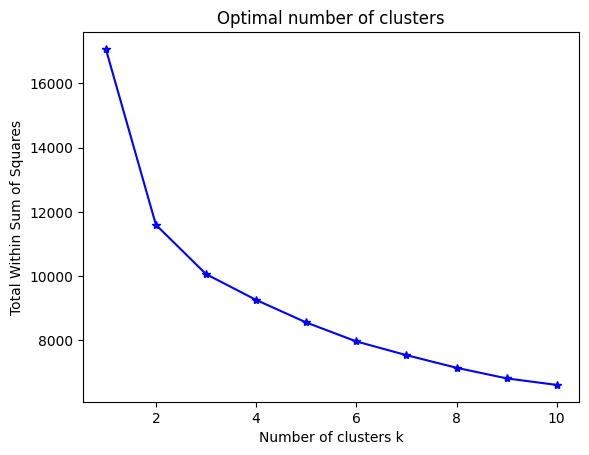

In [ ]:
# Optimal number of clusters
wss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=123)
    kmeans = kmeans.fit(X)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

1. there is a kink at k=2, hence k=2 can be considered a good number of the cluster to cluster this data
2. k=2 i.e. either Malignant or Benign

In [ ]:
# KMeans Parameter Selection

# Define the range of parameter values to explore
param_grid = {
    # n_clusters: The number of clusters to form (malignant or benign) (plt above also shows k=2 is the best)
    'n_clusters': [2],
    # init: The method for initializing the centroids
    'init': ['k-means++', 'random'],
    # n_init: The number of times the KMeans algorithm will be run with different centroid seeds
    'n_init': [10, 20, 30],
    # max_iter: The maximum number of iterations of the KMeans algorithm for a single run
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-5, 1e-6]  # Try different tolerance values
}

best_score1 = -1 # Initialize the best score
best_score2 = -1 # Initialize the best score
best_score3 = -1 # Initialize the best score
best_score4 = -1 # Initialize the best score
best_score5 = -1 # Initialize the best score
best_score6 = -1 # Initialize the best score
best_score7 = -1 # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

for params in ParameterGrid(param_grid):
    # Perform KMeans clustering with current parameter values
    km_pa = KMeans(**params)
    km1_pa_pred = km_pa.fit_predict(X)
    km2_pa_pred = km_pa.fit_predict(X2)
    km3_pa_pred = km_pa.fit_predict(X3)
    km4_pa_pred = km_pa.fit_predict(X4)
    km5_pa_pred = km_pa.fit_predict(X5)
    km6_pa_pred = km_pa.fit_predict(X6)
    km7_pa_pred = km_pa.fit_predict(X7)
    kmKernel_pa_pred = km_pa.fit_predict(XKernel)

    # Evaluate clustering performance using silhouette score
    score1 = adjusted_rand_score(df["diagnosis"], km1_pa_pred)
    score2 = adjusted_rand_score(df["diagnosis"], km2_pa_pred)
    score3 = adjusted_rand_score(df["diagnosis"], km3_pa_pred)
    score4 = adjusted_rand_score(df["diagnosis"], km4_pa_pred)
    score5 = adjusted_rand_score(df["diagnosis"], km5_pa_pred)
    score6 = adjusted_rand_score(df["diagnosis"], km6_pa_pred)
    score7 = adjusted_rand_score(df["diagnosis"], km7_pa_pred)
    scoreKernel = adjusted_rand_score(df["diagnosis"], kmKernel_pa_pred)

    # Update best score and best parameters if current score is higher
    if score1 > best_score1:
        best_score1 = score1
        best_params1 = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("KMeans Best parameters for All features:", best_params1)
print("KMeans Best adjusted Rand score for All features:", best_score1)
print("KMeans Best parameters for PCA 2:", best_params2)
print("KMeans Best adjusted Rand score for PCA 2:", best_score2)
print("KMeans Best parameters for PCA 3:", best_params3)
print("KMeans Best adjusted Rand score for PCA 3:", best_score3)
print("KMeans Best parameters for PCA 4:", best_params4)
print("KMeans Best adjusted Rand score for PCA 4:", best_score4)
print("KMeans Best parameters for PCA 5:", best_params5)
print("KMeans Best adjusted Rand score for PCA 5:", best_score5)
print("KMeans Best parameters for PCA 6:", best_params6)
print("KMeans Best adjusted Rand score for PCA 6:", best_score6)
print("KMeans Best parameters for PCA 7:", best_params7)
print("KMeans Best adjusted Rand score for PCA 7:", best_score7)
print("KMeans Best parameters for Kernel PCA:", best_paramsKernel)
print("KMeans Best adjusted Rand score for Kernel PCA:", best_scoreKernel)

KMeans Best parameters for All features: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10, 'tol': 1e-05}
KMeans Best adjusted Rand score for All features: 0.6707206476880808
KMeans Best parameters for PCA 2: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10, 'tol': 1e-06}
KMeans Best adjusted Rand score for PCA 2: 0.7058197409589875
KMeans Best parameters for PCA 3: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 30, 'tol': 1e-06}
KMeans Best adjusted Rand score for PCA 3: 0.7360533702931327
KMeans Best parameters for PCA 4: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10, 'tol': 0.0001}
KMeans Best adjusted Rand score for PCA 4: 0.730008764774305
KMeans Best parameters for PCA 5: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 10, 'tol': 1e-06}
KMeans Best adjusted Rand score for PCA 5: 0.8046283775834497
KMeans Best parameters for PCA 6: {'init': 'random', 'max_iter': 300, 'n_clusters': 2,

In [ ]:
# KMeans Clustering

# All features
start_time = time.time()
km = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=100, tol=1e-05, random_state=0)
km_pred = km.fit_predict(X)
# Check how many of the samples were correctly labeled
kmLabels = km.labels_
correct_kmLabels = sum(y == kmLabels)
# Correct Labeled Percentage
km_acc = '{:.2%}'.format(correct_kmLabels/float(y.size))
# Silhouette Score
km_ss = '{:.2%}'.format(silhouette_score(X, km_pred))
# Davies-Bouldin Index (DBI)
km_dbi = '{:.2f}'.format(davies_bouldin_score(X, km_pred))
# Calinski-Harabasz Index (CHI)
km_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X, km_pred))
# Adjusted Rand Index (ARI)
km_ari = '{:.2%}'.format(adjusted_rand_score(y, km_pred))
# Normalized Mutual Information (NMI)
km_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km_pred))
end_time = time.time()
km_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_kmLabels, y.size))
print("KMeans correctly labeled percentage is: ", km_acc)
print("KMeans Silhouette Score is: ", km_ss)
print("KMeans Davies-Bouldin Index is: ", km_dbi)
print("KMeans Calinski-Harabasz Index is: ", km_chi)
print("KMeans Adjusted Rand Index is: ", km_ari)
print("KMeans Normalized Mutual Information is: ", km_nmi)

# PCA with 2 components
start_time = time.time()
km2 = KMeans(n_clusters=2, init="k-means++", n_init=20, max_iter=100, tol=1e-06, random_state=0)
km2_pred = km2.fit_predict(X2)
# Check how many of the samples were correctly labeled
km2Labels = km2.labels_
correct_km2Labels = sum(y == km2Labels)
# Correct Labeled Percentage
km2_acc = '{:.2%}'.format(correct_km2Labels/float(y.size))
# Silhouette Score
km2_ss = '{:.2%}'.format(silhouette_score(X2, km2_pred))
# Davies-Bouldin Index (DBI)
km2_dbi = '{:.2f}'.format(davies_bouldin_score(X2, km2_pred))
# Calinski-Harabasz Index (CHI)
km2_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X2, km2_pred))
# Adjusted Rand Index (ARI)
km2_ari = '{:.2%}'.format(adjusted_rand_score(y, km2_pred))
# Normalized Mutual Information (NMI)
km2_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km2_pred))
end_time = time.time()
km2_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_km2Labels, y.size))
print("KMeans PCA 2 correctly labeled percentage is: ", km2_acc)
print("KMeans PCA 2 Silhouette Score is: ", km2_ss)
print("KMeans PCA 2 Davies-Bouldin Index is: ", km2_dbi)
print("KMeans PCA 2 Calinski-Harabasz Index is: ", km2_chi)
print("KMeans PCA 2 Adjusted Rand Index is: ", km2_ari)
print("KMeans PCA 2 Normalized Mutual Information is: ", km2_nmi)

# PCA with 3 components
start_time = time.time()
km3 = KMeans(n_clusters=2, init="k-means++", n_init=20, max_iter=100, tol=1e-06, random_state=0)
km3_pred = km3.fit_predict(X3)
# Check how many of the samples were correctly labeled
km3Labels = km3.labels_
correct_km3Labels = sum(y == km3Labels)
# Correct Labeled Percentage
km3_acc = '{:.2%}'.format(correct_km3Labels/float(y.size))
# Silhouette Score
km3_ss = '{:.2%}'.format(silhouette_score(X3, km3_pred))
# Davies-Bouldin Index (DBI)
km3_dbi = '{:.2f}'.format(davies_bouldin_score(X3, km3_pred))
# Calinski-Harabasz Index (CHI)
km3_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X3, km3_pred))
# Adjusted Rand Index (ARI)
km3_ari = '{:.2%}'.format(adjusted_rand_score(y, km3_pred))
# Normalized Mutual Information (NMI)
km3_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km3_pred))
end_time = time.time()
km3_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_km3Labels, y.size))
print("KMeans PCA 3 correctly labeled percentage is: ", km3_acc)
print("KMeans PCA 3 Silhouette Score is: ", km3_ss)
print("KMeans PCA 3 Davies-Bouldin Index is: ", km3_dbi)
print("KMeans PCA 3 Calinski-Harabasz Index is: ", km3_chi)
print("KMeans PCA 3 Adjusted Rand Index is: ", km3_ari)
print("KMeans PCA 3 Normalized Mutual Information is: ", km3_nmi)

# PCA with 4 components
start_time = time.time()
km4 = KMeans(n_clusters=2, init="k-means++", n_init=20, max_iter=300, tol=1e-06, random_state=0)
km4_pred = km4.fit_predict(X4)
# Check how many of the samples were correctly labeled
km4Labels = km4.labels_
correct_km4Labels = sum(y == km4Labels)
# Correct Labeled Percentage
km4_acc = '{:.2%}'.format(correct_km4Labels/float(y.size))
# Silhouette Score
km4_ss = '{:.2%}'.format(silhouette_score(X4, km4_pred))
# Davies-Bouldin Index (DBI)
km4_dbi = '{:.2f}'.format(davies_bouldin_score(X4, km4_pred))
# Calinski-Harabasz Index (CHI)
km4_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X4, km4_pred))
# Adjusted Rand Index (ARI)
km4_ari = '{:.2%}'.format(adjusted_rand_score(y, km4_pred))
# Normalized Mutual Information (NMI)
km4_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km4_pred))
end_time = time.time()
km4_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_km4Labels, y.size))
print("KMeans PCA 4 correctly labeled percentage is: ", km4_acc)
print("KMeans PCA 4 Silhouette Score is: ", km4_ss)
print("KMeans PCA 4 Davies-Bouldin Index is: ", km4_dbi)
print("KMeans PCA 4 Calinski-Harabasz Index is: ", km4_chi)
print("KMeans PCA 4 Adjusted Rand Index is: ", km4_ari)
print("KMeans PCA 4 Normalized Mutual Information is: ", km4_nmi)

# PCA with 5 components
start_time = time.time()
km5 = KMeans(n_clusters=2, init="k-means++", n_init=30, max_iter=200, tol=1e-06, random_state=0)
km5_pred = km5.fit_predict(X5)
# Check how many of the samples were correctly labeled
km5Labels = km5.labels_
correct_km5Labels = sum(y == km5Labels)
# Correct Labeled Percentage
km5_acc = '{:.2%}'.format(correct_km5Labels/float(y.size))
# Silhouette Score
km5_ss = '{:.2%}'.format(silhouette_score(X5, km5_pred))
# Davies-Bouldin Index (DBI)
km5_dbi = '{:.2f}'.format(davies_bouldin_score(X5, km5_pred))
# Calinski-Harabasz Index (CHI)
km5_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X5, km5_pred))
# Adjusted Rand Index (ARI)
km5_ari = '{:.2%}'.format(adjusted_rand_score(y, km5_pred))
# Normalized Mutual Information (NMI)
km5_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km5_pred))
end_time = time.time()
km5_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_km5Labels, y.size))
print("KMeans PCA 5 correctly labeled percentage is: ", km5_acc)
print("KMeans PCA 5 Silhouette Score is: ", km5_ss)
print("KMeans PCA 5 Davies-Bouldin Index is: ", km5_dbi)
print("KMeans PCA 5 Calinski-Harabasz Index is: ", km5_chi)
print("KMeans PCA 5 Adjusted Rand Index is: ", km5_ari)
print("KMeans PCA 5 Normalized Mutual Information is: ", km5_nmi)

# PCA with 6 components
start_time = time.time()
km6 = KMeans(n_clusters=2, init="k-means++", n_init=20, max_iter=200, tol=0.0001, random_state=0)
km6_pred = km6.fit_predict(X6)
# Check how many of the samples were correctly labeled
km6Labels = km6.labels_
correct_km6Labels = sum(y == km6Labels)
# Correct Labeled Percentage
km6_acc = '{:.2%}'.format(correct_km6Labels/float(y.size))
# Silhouette Score
km6_ss = '{:.2%}'.format(silhouette_score(X6, km6_pred))
# Davies-Bouldin Index (DBI)
km6_dbi = '{:.2f}'.format(davies_bouldin_score(X6, km6_pred))
# Calinski-Harabasz Index (CHI)
km6_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X6, km6_pred))
# Adjusted Rand Index (ARI)
km6_ari = '{:.2%}'.format(adjusted_rand_score(y, km6_pred))
# Normalized Mutual Information (NMI)
km6_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km6_pred))
end_time = time.time()
km6_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_km6Labels, y.size))
print("KMeans PCA 6 correctly labeled percentage is: ", km6_acc)
print("KMeans PCA 6 Silhouette Score is: ", km6_ss)
print("KMeans PCA 6 Davies-Bouldin Index is: ", km6_dbi)
print("KMeans PCA 6 Calinski-Harabasz Index is: ", km6_chi)
print("KMeans PCA 6 Adjusted Rand Index is: ", km6_ari)
print("KMeans PCA 6 Normalized Mutual Information is: ", km6_nmi)

# PCA with 7 components
start_time = time.time()
km7 = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=100, tol=0.0001, random_state=0)
km7_pred = km7.fit_predict(X7)
# Check how many of the samples were correctly labeled
km7Labels = km7.labels_
correct_km7Labels = sum(y == km7Labels)
# Correct Labeled Percentage
km7_acc = '{:.2%}'.format(correct_km7Labels/float(y.size))
# Silhouette Score
km7_ss = '{:.2%}'.format(silhouette_score(X7, km7_pred))
# Davies-Bouldin Index (DBI)
km7_dbi = '{:.2f}'.format(davies_bouldin_score(X7, km7_pred))
# Calinski-Harabasz Index (CHI)
km7_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X7, km7_pred))
# Adjusted Rand Index (ARI)
km7_ari = '{:.2%}'.format(adjusted_rand_score(y, km7_pred))
# Normalized Mutual Information (NMI)
km7_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, km7_pred))
end_time = time.time()
km7_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_km7Labels, y.size))
print("KMeans PCA 7 correctly labeled percentage is: ", km7_acc)
print("KMeans PCA 7 Silhouette Score is: ", km7_ss)
print("KMeans PCA 7 Davies-Bouldin Index is: ", km7_dbi)
print("KMeans PCA 7 Calinski-Harabasz Index is: ", km7_chi)
print("KMeans PCA 7 Adjusted Rand Index is: ", km7_ari)
print("KMeans PCA 7 Normalized Mutual Information is: ", km7_nmi)

# Kernel PCA
start_time = time.time()
kmKernel = KMeans(n_clusters=2, init="k-means++", n_init=10, max_iter=100, tol=0.0001, random_state=0)
kmKernel_pred = kmKernel.fit_predict(XKernel)
# Check how many of the samples were correctly labeled
kmKernelLabels = kmKernel.labels_
correct_kmKernelLabels = sum(y == kmKernelLabels)
# Correct Labeled Percentage
kmKernel_acc = '{:.2%}'.format(correct_kmKernelLabels/float(y.size))
# Silhouette Score
kmKernel_ss = '{:.2%}'.format(silhouette_score(XKernel, kmKernel_pred))
# Davies-Bouldin Index (DBI)
kmKernel_dbi = '{:.2f}'.format(davies_bouldin_score(XKernel, kmKernel_pred))
# Calinski-Harabasz Index (CHI)
kmKernel_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(XKernel, kmKernel_pred))
# Adjusted Rand Index (ARI)
kmKernel_ari = '{:.2%}'.format(adjusted_rand_score(y, kmKernel_pred))
# Normalized Mutual Information (NMI)
kmKernel_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, kmKernel_pred))
end_time = time.time()
kmKernel_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_kmKernelLabels, y.size))
print("KMeans Kernel PCA correctly labeled percentage is: ", kmKernel_acc)
print("KMeans Kernel PCA Silhouette Score is: ", kmKernel_ss)
print("KMeans Kernel PCA Davies-Bouldin Index is: ", kmKernel_dbi)
print("KMeans Kernel PCA Calinski-Harabasz Index is: ", kmKernel_chi)
print("KMeans Kernel PCA Adjusted Rand Index is: ", kmKernel_ari)
print("KMeans Kernel PCA Normalized Mutual Information is: ", kmKernel_nmi)

515 out of 569 samples were correctly labeled.
KMeans correctly labeled percentage is:  90.51%
KMeans Silhouette Score is:  34.34%
KMeans Davies-Bouldin Index is:  1.32
KMeans Calinski-Harabasz Index is:  267.69
KMeans Adjusted Rand Index is:  65.36%
KMeans Normalized Mutual Information is:  53.24%
524 out of 569 samples were correctly labeled.
KMeans PCA 2 correctly labeled percentage is:  92.09%
KMeans PCA 2 Silhouette Score is:  43.63%
KMeans PCA 2 Davies-Bouldin Index is:  1.10
KMeans PCA 2 Calinski-Harabasz Index is:  321.16
KMeans PCA 2 Adjusted Rand Index is:  70.56%
KMeans PCA 2 Normalized Mutual Information is:  61.00%
527 out of 569 samples were correctly labeled.
KMeans PCA 3 correctly labeled percentage is:  92.62%
KMeans PCA 3 Silhouette Score is:  33.74%
KMeans PCA 3 Davies-Bouldin Index is:  1.50
KMeans PCA 3 Calinski-Harabasz Index is:  183.57
KMeans PCA 3 Adjusted Rand Index is:  72.38%
KMeans PCA 3 Normalized Mutual Information is:  62.70%
41 out of 569 samples were c

In [ ]:
# Hierarchical Agglomerative Clustering Parameter Selection

# Define the range of parameter values to explore
param_grid = {
    # n_clusters: The number of clusters to form
    'n_clusters': [2],
    # linkage: The linkage criterion to use
    'linkage': ['ward', 'complete', 'average', 'single'],
    # affinity: The distance metric to use for the linkage
    'metric': ['euclidean', 'manhattan', 'cosine']  # Exclude l1 and l2 for 'ward' linkage
}

best_score = -1  # Initialize the best score
best_score2 = -1  # Initialize the best score
best_score3 = -1  # Initialize the best score
best_score4 = -1  # Initialize the best score
best_score5 = -1  # Initialize the best score
best_score6 = -1  # Initialize the best score
best_score7 = -1  # Initialize the best score
best_scoreKernel = -1  # Initialize the best score

for params in ParameterGrid(param_grid):
    # Check if 'ward' linkage is used with non-Euclidean metrics
    if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
        continue  # Skip this iteration

    # Perform Hierarchical Agglomerative Clustering with current parameter values
    ha_pa = AgglomerativeClustering(**params)

    ha_pa_pred = ha_pa.fit_predict(X)
    ha2_pa_pred = ha_pa.fit_predict(X2)
    ha3_pa_pred = ha_pa.fit_predict(X3)
    ha4_pa_pred = ha_pa.fit_predict(X4)
    ha5_pa_pred = ha_pa.fit_predict(X5)
    ha6_pa_pred = ha_pa.fit_predict(X6)
    ha7_pa_pred = ha_pa.fit_predict(X7)
    haKernel_pa_pred = ha_pa.fit_predict(XKernel)

    # Evaluate clustering performance using adjusted_rand_score
    score = adjusted_rand_score(df["diagnosis"], ha_pa_pred)
    score2 = adjusted_rand_score(df["diagnosis"], ha2_pa_pred)
    score3 = adjusted_rand_score(df["diagnosis"], ha3_pa_pred)
    score4 = adjusted_rand_score(df["diagnosis"], ha4_pa_pred)
    score5 = adjusted_rand_score(df["diagnosis"], ha5_pa_pred)
    score6 = adjusted_rand_score(df["diagnosis"], ha6_pa_pred)
    score7 = adjusted_rand_score(df["diagnosis"], ha7_pa_pred)
    scoreKernel = adjusted_rand_score(df["diagnosis"], haKernel_pa_pred)

    # Update best score and best parameters if current score is higher
    if score > best_score:
        best_score = score
        best_params = params
    if score2 > best_score2:
        best_score2 = score2
        best_params2 = params
    if score3 > best_score3:
        best_score3 = score3
        best_params3 = params
    if score4 > best_score4:
        best_score4 = score4
        best_params4 = params
    if score5 > best_score5:
        best_score5 = score5
        best_params5 = params
    if score6 > best_score6:
        best_score6 = score6
        best_params6 = params
    if score7 > best_score7:
        best_score7 = score7
        best_params7 = params
    if scoreKernel > best_scoreKernel:
        best_scoreKernel = scoreKernel
        best_paramsKernel = params

# Print the best parameters and score
print("Hierarchical Best parameters for All features:", best_params)
print("Hierarchical Best adjusted Rand score for All features:", best_score)
print("Hierarchical Best parameters for PCA 2:", best_params2)
print("Hierarchical Best adjusted Rand score for PCA 2:", best_score2)
print("Hierarchical Best parameters for PCA 3:", best_params3)
print("Hierarchical Best adjusted Rand score for PCA 3:", best_score3)
print("Hierarchical Best parameters for PCA 4:", best_params4)
print("Hierarchical Best adjusted Rand score for PCA 4:", best_score4)
print("Hierarchical Best parameters for PCA 5:", best_params5)
print("Hierarchical Best adjusted Rand score for PCA 5:", best_score5)
print("Hierarchical Best parameters for PCA 6:", best_params6)
print("Hierarchical Best adjusted Rand score for PCA 6:", best_score6)
print("Hierarchical Best parameters for PCA 7:", best_params7)
print("Hierarchical Best adjusted Rand score for PCA 7:", best_score7)
print("Hierarchical Best parameters for Kernel PCA:", best_paramsKernel)
print("Hierarchical Best adjusted Rand score for Kernel PCA:", best_scoreKernel)

Hierarchical Best parameters for All features: {'linkage': 'average', 'metric': 'cosine', 'n_clusters': 2}
Hierarchical Best adjusted Rand score for All features: 0.779598877208407
Hierarchical Best parameters for PCA 2: {'linkage': 'average', 'metric': 'cosine', 'n_clusters': 2}
Hierarchical Best adjusted Rand score for PCA 2: 0.7367380261041125
Hierarchical Best parameters for PCA 3: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2}
Hierarchical Best adjusted Rand score for PCA 3: 0.6597055895341802
Hierarchical Best parameters for PCA 4: {'linkage': 'complete', 'metric': 'cosine', 'n_clusters': 2}
Hierarchical Best adjusted Rand score for PCA 4: 0.6889430171085501
Hierarchical Best parameters for PCA 5: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2}
Hierarchical Best adjusted Rand score for PCA 5: 0.6362446582681864
Hierarchical Best parameters for PCA 6: {'linkage': 'average', 'metric': 'cosine', 'n_clusters': 2}
Hierarchical Best adjusted Rand score for PCA 

In [ ]:
# Hierarchical Agglomerative Clustering

# All features
start_time = time.time()
ha = AgglomerativeClustering(n_clusters=2, linkage="average", metric='cosine', connectivity=None)
ha_pred = ha.fit_predict(X)
# Check how many of the samples were correctly labeled
haLabels = ha.labels_
correct_haLabels = sum(y == haLabels)
# Correct Labeled Percentage
ha_acc = '{:.2%}'.format(correct_haLabels/float(y.size))
# Silhouette Score
ha_ss = '{:.2%}'.format(silhouette_score(X, ha_pred))
# Davies-Bouldin Index (DBI)
ha_dbi = '{:.2f}'.format(davies_bouldin_score(X, ha_pred))
# Calinski-Harabasz Index (CHI)
ha_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X, ha_pred))
# Adjusted Rand Index (ARI)
ha_ari = '{:.2%}'.format(adjusted_rand_score(y, ha_pred))
# Normalized Mutual Information (NMI)
ha_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha_pred))
end_time = time.time()
ha_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_haLabels, y.size))
print("Hierarchical Agglomerative correctly labeled percentage is: ", ha_acc)
print("Hierarchical Agglomerative Silhouette Score is: ", ha_ss)
print("Hierarchical Agglomerative Davies-Bouldin Index is: ", ha_dbi)
print("Hierarchical Agglomerative Calinski-Harabasz Index is: ", ha_chi)
print("Hierarchical Agglomerative Adjusted Rand Index is: ", ha_ari)
print("Hierarchical Agglomerative Normalized Mutual Information is: ", ha_nmi)

# PCA with 2 components
start_time = time.time()
ha2 = AgglomerativeClustering(n_clusters=2, linkage="average", metric='cosine', connectivity=None)
ha2_pred = ha2.fit_predict(X2)
# Check how many of the samples were correctly labeled
ha2Labels = ha2.labels_
correct_ha2Labels = sum(y == ha2Labels)
# Correctly Labeled (%)
ha2_acc = '{:.2%}'.format(correct_ha2Labels/float(y.size))
# Silhouette Score
ha2_ss = '{:.2%}'.format(silhouette_score(X2, ha2_pred))
# Davies-Bouldin Index (DBI)
ha2_dbi = '{:.2f}'.format(davies_bouldin_score(X2, ha2_pred))
# Calinski-Harabasz Index (CHI)
ha2_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X2, ha2_pred))
# Adjusted Rand Index (ARI)
ha2_ari = '{:.2%}'.format(adjusted_rand_score(y, ha2_pred))
# Normalized Mutual Information (NMI)
ha2_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha2_pred))
end_time = time.time()
ha2_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_ha2Labels, y.size))
print("Hierarchical Agglomerative PCA 2 correctly labeled percentage is: ", ha2_acc)
print("Hierarchical Agglomerative PCA 2 Silhouette Score is: ", ha2_ss)
print("Hierarchical Agglomerative PCA 2 Davies-Bouldin Index is: ", ha2_dbi)
print("Hierarchical Agglomerative PCA 2 Calinski-Harabasz Index is: ", ha2_chi)
print("Hierarchical Agglomerative PCA 2 Adjusted Rand Index is: ", ha2_ari)
print("Hierarchical Agglomerative PCA 2 Normalized Mutual Information is: ", ha2_nmi)

# PCA with 3 components
start_time = time.time()
ha3 = AgglomerativeClustering(n_clusters=2, linkage="ward", metric='euclidean', connectivity=None)
ha3_pred = ha3.fit_predict(X3)
# Check how many of the samples were correctly labeled
ha3Labels = ha3.labels_
correct_ha3Labels = sum(y == ha3Labels)
# Correctly Labeled (%)
ha3_acc = '{:.2%}'.format(correct_ha3Labels/float(y.size))
# Silhouette Score
ha3_ss = '{:.2%}'.format(silhouette_score(X3, ha3_pred))
# Davies-Bouldin Index (DBI)
ha3_dbi = '{:.2f}'.format(davies_bouldin_score(X3, ha3_pred))
# Calinski-Harabasz Index (CHI)
ha3_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X3, ha3_pred))
# Adjusted Rand Index (ARI)
ha3_ari = '{:.2%}'.format(adjusted_rand_score(y, ha3_pred))
# Normalized Mutual Information (NMI)
ha3_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha3_pred))
end_time = time.time()
ha3_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_ha3Labels, y.size))
print("Hierarchical Agglomerative PCA 3 correctly labeled percentage is: ", ha3_acc)
print("Hierarchical Agglomerative PCA 3 Silhouette Score is: ", ha3_ss)
print("Hierarchical Agglomerative PCA 3 Davies-Bouldin Index is: ", ha3_dbi)
print("Hierarchical Agglomerative PCA 3 Calinski-Harabasz Index is: ", ha3_chi)
print("Hierarchical Agglomerative PCA 3 Adjusted Rand Index is: ", ha3_ari)
print("Hierarchical Agglomerative PCA 3 Normalized Mutual Information is: ", ha3_nmi)

# PCA with 4 components
start_time = time.time()
ha4 = AgglomerativeClustering(n_clusters=2, linkage="complete", metric='cosine', connectivity=None)
ha4_pred = ha4.fit_predict(X4)
# Check how many of the samples were correctly labeled
ha4Labels = ha4.labels_
correct_ha4Labels = sum(y == ha4Labels)
# Correctly Labeled (%)
ha4_acc = '{:.2%}'.format(correct_ha4Labels/float(y.size))
# Silhouette Score
ha4_ss = '{:.2%}'.format(silhouette_score(X4, ha4_pred))
# Davies-Bouldin Index (DBI)
ha4_dbi = '{:.2f}'.format(davies_bouldin_score(X4, ha4_pred))
# Calinski-Harabasz Index (CHI)
ha4_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X4, ha4_pred))
# Adjusted Rand Index (ARI)
ha4_ari = '{:.2%}'.format(adjusted_rand_score(y, ha4_pred))
# Normalized Mutual Information (NMI)
ha4_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha4_pred))
end_time = time.time()
ha4_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_ha4Labels, y.size))
print("Hierarchical Agglomerative PCA 4 correctly labeled percentage is: ", ha4_acc)
print("Hierarchical Agglomerative PCA 4 Silhouette Score is: ", ha4_ss)
print("Hierarchical Agglomerative PCA 4 Davies-Bouldin Index is: ", ha4_dbi)
print("Hierarchical Agglomerative PCA 4 Calinski-Harabasz Index is: ", ha4_chi)
print("Hierarchical Agglomerative PCA 4 Adjusted Rand Index is: ", ha4_ari)
print("Hierarchical Agglomerative PCA 4 Normalized Mutual Information is: ", ha4_nmi)

# PCA with 5 components
start_time = time.time()
ha5 = AgglomerativeClustering(n_clusters=2, linkage="ward", metric='euclidean', connectivity=None)
ha5_pred = ha5.fit_predict(X5)
# Check how many of the samples were correctly labeled
ha5Labels = ha5.labels_
correct_ha5Labels = sum(y == ha5Labels)
# Correctly Labeled (%)
ha5_acc = '{:.2%}'.format(correct_ha5Labels/float(y.size))
# Silhouette Score
ha5_ss = '{:.2%}'.format(silhouette_score(X5, ha5_pred))
# Davies-Bouldin Index (DBI)
ha5_dbi = '{:.2f}'.format(davies_bouldin_score(X5, ha5_pred))
# Calinski-Harabasz Index (CHI)
ha5_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X5, ha5_pred))
# Adjusted Rand Index (ARI)
ha5_ari = '{:.2%}'.format(adjusted_rand_score(y, ha5_pred))
# Normalized Mutual Information (NMI)
ha5_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha5_pred))
end_time = time.time()
ha5_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_ha5Labels, y.size))
print("Hierarchical Agglomerative PCA 5 correctly labeled percentage is: ", ha5_acc)
print("Hierarchical Agglomerative PCA 5 Silhouette Score is: ", ha5_ss)
print("Hierarchical Agglomerative PCA 5 Davies-Bouldin Index is: ", ha5_dbi)
print("Hierarchical Agglomerative PCA 5 Calinski-Harabasz Index is: ", ha5_chi)
print("Hierarchical Agglomerative PCA 5 Adjusted Rand Index is: ", ha5_ari)
print("Hierarchical Agglomerative PCA 5 Normalized Mutual Information is: ", ha5_nmi)

# PCA with 6 components
start_time = time.time()
ha6 = AgglomerativeClustering(n_clusters=2, linkage="average", metric='cosine', connectivity=None)
ha6_pred = ha6.fit_predict(X6)
# Check how many of the samples were correctly labeled
ha6Labels = ha6.labels_
correct_ha6Labels = sum(y == ha6Labels)
# Correctly Labeled (%)
ha6_acc = '{:.2%}'.format(correct_ha6Labels/float(y.size))
# Silhouette Score
ha6_ss = '{:.2%}'.format(silhouette_score(X6, ha6_pred))
# Davies-Bouldin Index (DBI)
ha6_dbi = '{:.2f}'.format(davies_bouldin_score(X6, ha6_pred))
# Calinski-Harabasz Index (CHI)
ha6_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X6, ha6_pred))
# Adjusted Rand Index (ARI)
ha6_ari = '{:.2%}'.format(adjusted_rand_score(y, ha6_pred))
# Normalized Mutual Information (NMI)
ha6_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha6_pred))
end_time = time.time()
ha6_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_ha6Labels, y.size))
print("Hierarchical Agglomerative PCA 6 correctly labeled percentage is: ", ha6_acc)
print("Hierarchical Agglomerative PCA 6 Silhouette Score is: ", ha6_ss)
print("Hierarchical Agglomerative PCA 6 Davies-Bouldin Index is: ", ha6_dbi)
print("Hierarchical Agglomerative PCA 6 Calinski-Harabasz Index is: ", ha6_chi)
print("Hierarchical Agglomerative PCA 6 Adjusted Rand Index is: ", ha6_ari)
print("Hierarchical Agglomerative PCA 6 Normalized Mutual Information is: ", ha6_nmi)

# PCA with 7 components
start_time = time.time()
ha7 = AgglomerativeClustering(n_clusters=2, linkage="average", metric='cosine', connectivity=None)
ha7_pred = ha7.fit_predict(X7)
# Check how many of the samples were correctly labeled
ha7Labels = ha7.labels_
correct_ha7Labels = sum(y == ha7Labels)
# Correctly Labeled (%)
ha7_acc = '{:.2%}'.format(correct_ha7Labels/float(y.size))
# Silhouette Score
ha7_ss = '{:.2%}'.format(silhouette_score(X7, ha7_pred))
# Davies-Bouldin Index (DBI)
ha7_dbi = '{:.2f}'.format(davies_bouldin_score(X7, ha7_pred))
# Calinski-Harabasz Index (CHI)
ha7_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X7, ha7_pred))
# Adjusted Rand Index (ARI)
ha7_ari = '{:.2%}'.format(adjusted_rand_score(y, ha7_pred))
# Normalized Mutual Information (NMI)
ha7_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ha7_pred))
end_time = time.time()
ha7_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_ha7Labels, y.size))
print("Hierarchical Agglomerative PCA 7 correctly labeled percentage is: ", ha7_acc)
print("Hierarchical Agglomerative PCA 7 Silhouette Score is: ", ha7_ss)
print("Hierarchical Agglomerative PCA 7 Davies-Bouldin Index is: ", ha7_dbi)
print("Hierarchical Agglomerative PCA 7 Calinski-Harabasz Index is: ", ha7_chi)
print("Hierarchical Agglomerative PCA 7 Adjusted Rand Index is: ", ha7_ari)
print("Hierarchical Agglomerative PCA 7 Normalized Mutual Information is: ", ha7_nmi)

# Kernel PCA
start_time = time.time()
haKernel = AgglomerativeClustering(n_clusters=2, linkage="average", metric='euclidean', connectivity=None)
haKernel_pred = haKernel.fit_predict(XKernel)
# Check how many of the samples were correctly labeled
haKernelLabels = haKernel.labels_
correct_haKernelLabels = sum(y == haKernelLabels)
# Correct Labeled Percentage
haKernel_acc = '{:.2%}'.format(correct_haKernelLabels/float(y.size))
# Silhouette Score
haKernel_ss = '{:.2%}'.format(silhouette_score(XKernel, haKernel_pred))
# Davies-Bouldin Index (DBI)
haKernel_dbi = '{:.2f}'.format(davies_bouldin_score(XKernel, haKernel_pred))
# Calinski-Harabasz Index (CHI)
haKernel_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(XKernel, haKernel_pred))
# Adjusted Rand Index (ARI)
haKernel_ari = '{:.2%}'.format(adjusted_rand_score(y, haKernel_pred))
# Normalized Mutual Information (NMI)
haKernel_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, haKernel_pred))
end_time = time.time()
haKernel_time = end_time - start_time
print("%d out of %d samples were correctly labeled." % (correct_haKernelLabels, y.size))
print("Hierarchical Agglomerative Kernel PCA correctly labeled percentage is: ", haKernel_acc)
print("Hierarchical Agglomerative Kernel PCA Silhouette Score is: ", haKernel_ss)
print("Hierarchical Agglomerative Kernel PCA Davies-Bouldin Index is: ", haKernel_dbi)
print("Hierarchical Agglomerative Kernel PCA Calinski-Harabasz Index is: ", haKernel_chi)
print("Hierarchical Agglomerative Kernel PCA Adjusted Rand Index is: ", haKernel_ari)
print("Hierarchical Agglomerative Kernel PCA Normalized Mutual Information is: ", haKernel_nmi)

536 out of 569 samples were correctly labeled.
Hierarchical Agglomerative correctly labeled percentage is:  94.20%
Hierarchical Agglomerative Silhouette Score is:  32.37%
Hierarchical Agglomerative Davies-Bouldin Index is:  1.33
Hierarchical Agglomerative Calinski-Harabasz Index is:  248.48
Hierarchical Agglomerative Adjusted Rand Index is:  77.96%
Hierarchical Agglomerative Normalized Mutual Information is:  68.16%
529 out of 569 samples were correctly labeled.
Hierarchical Agglomerative PCA 2 correctly labeled percentage is:  92.97%
Hierarchical Agglomerative PCA 2 Silhouette Score is:  41.11%
Hierarchical Agglomerative PCA 2 Davies-Bouldin Index is:  1.12
Hierarchical Agglomerative PCA 2 Calinski-Harabasz Index is:  312.16
Hierarchical Agglomerative PCA 2 Adjusted Rand Index is:  73.67%
Hierarchical Agglomerative PCA 2 Normalized Mutual Information is:  61.94%
53 out of 569 samples were correctly labeled.
Hierarchical Agglomerative PCA 3 correctly labeled percentage is:  9.31%
Hiera

In [ ]:
# MeanShift Parameter Selection

# Define the range of parameter values to explore
param_grid_mean_shift = {
    # quantile: Quantile used to estimate the bandwidth
    'quantile': np.linspace(0.01, 0.1, 10),  # Explore a range of quantile values
    # bin_seeding: If True, initial kernel locations are not locations of all points
    'bin_seeding': [True, False]
}

best_params_mean_shift = None  # Initialize the best parameters
best_score_mean_shift1 = -1  # Initialize the best score for MeanShift
best_score_mean_shift2 = -1  # Initialize the best score for MeanShift
best_score_mean_shift3 = -1  # Initialize the best score for MeanShift
best_score_mean_shift4 = -1  # Initialize the best score for MeanShift
best_score_mean_shift5 = -1  # Initialize the best score for MeanShift
best_score_mean_shift6 = -1  # Initialize the best score for MeanShift
best_score_mean_shift7 = -1  # Initialize the best score for MeanShift
best_score_mean_shiftKernel = -1  # Initialize the best score for MeanShift

for params_mean_shift in ParameterGrid(param_grid_mean_shift):
    # Estimate bandwidth using current quantile
    bandwidth1 = estimate_bandwidth(X, quantile=params_mean_shift['quantile'])
    bandwidth2 = estimate_bandwidth(X2, quantile=params_mean_shift['quantile'])
    bandwidth3 = estimate_bandwidth(X3, quantile=params_mean_shift['quantile'])
    bandwidth4 = estimate_bandwidth(X4, quantile=params_mean_shift['quantile'])
    bandwidth5 = estimate_bandwidth(X5, quantile=params_mean_shift['quantile'])
    bandwidth6 = estimate_bandwidth(X6, quantile=params_mean_shift['quantile'])
    bandwidth7 = estimate_bandwidth(X7, quantile=params_mean_shift['quantile'])
    bandwidthKernel = estimate_bandwidth(XKernel, quantile=params_mean_shift['quantile'])

    # Perform MeanShift clustering with current parameters
    mean_shift1 = MeanShift(bandwidth=bandwidth1, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shift2 = MeanShift(bandwidth=bandwidth2, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shift3 = MeanShift(bandwidth=bandwidth3, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shift4 = MeanShift(bandwidth=bandwidth4, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shift5 = MeanShift(bandwidth=bandwidth5, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shift6 = MeanShift(bandwidth=bandwidth6, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shift7 = MeanShift(bandwidth=bandwidth7, bin_seeding=params_mean_shift['bin_seeding'])
    mean_shiftKernel = MeanShift(bandwidth=bandwidthKernel, bin_seeding=params_mean_shift['bin_seeding'])

    mean_shift_pred1 = mean_shift1.fit_predict(X)
    mean_shift_pred2 = mean_shift2.fit_predict(X2)
    mean_shift_pred3 = mean_shift3.fit_predict(X3)
    mean_shift_pred4 = mean_shift4.fit_predict(X4)
    mean_shift_pred5 = mean_shift5.fit_predict(X5)
    mean_shift_pred6 = mean_shift6.fit_predict(X6)
    mean_shift_pred7 = mean_shift7.fit_predict(X7)
    mean_shift_predKernel = mean_shiftKernel.fit_predict(XKernel)

    # Evaluate clustering performance using adjusted_rand_score
    score_mean_shift1 = adjusted_rand_score(df["diagnosis"], mean_shift_pred1)
    score_mean_shift2 = adjusted_rand_score(df["diagnosis"], mean_shift_pred2)
    score_mean_shift3 = adjusted_rand_score(df["diagnosis"], mean_shift_pred3)
    score_mean_shift4 = adjusted_rand_score(df["diagnosis"], mean_shift_pred4)
    score_mean_shift5 = adjusted_rand_score(df["diagnosis"], mean_shift_pred5)
    score_mean_shift6 = adjusted_rand_score(df["diagnosis"], mean_shift_pred6)
    score_mean_shift7 = adjusted_rand_score(df["diagnosis"], mean_shift_pred7)
    score_mean_shiftKernel = adjusted_rand_score(df["diagnosis"], mean_shift_predKernel)

    # Update best score and best parameters if current score is higher
    if score_mean_shift1 > best_score_mean_shift1:
        best_score_mean_shift1 = score_mean_shift1
        best_params_mean_shift1 = params_mean_shift
    if score_mean_shift2 > best_score_mean_shift2:
        best_score_mean_shift2 = score_mean_shift2
        best_params_mean_shift2 = params_mean_shift
    if score_mean_shift3 > best_score_mean_shift3:
        best_score_mean_shift3 = score_mean_shift3
        best_params_mean_shift3 = params_mean_shift
    if score_mean_shift4 > best_score_mean_shift4:
        best_score_mean_shift4 = score_mean_shift4
        best_params_mean_shift4 = params_mean_shift
    if score_mean_shift5 > best_score_mean_shift5:
        best_score_mean_shift5 = score_mean_shift5
        best_params_mean_shift5 = params_mean_shift
    if score_mean_shift6 > best_score_mean_shift6:
        best_score_mean_shift6 = score_mean_shift6
        best_params_mean_shift6 = params_mean_shift
    if score_mean_shift7 > best_score_mean_shift7:
        best_score_mean_shift7 = score_mean_shift7
        best_params_mean_shift7 = params_mean_shift
    if score_mean_shiftKernel > best_score_mean_shiftKernel:
        best_score_mean_shiftKernel = score_mean_shiftKernel
        best_params_mean_shiftKernel = params_mean_shift

# Print the best parameters and score for MeanShift
print("MeanShift Best parameters for  All features:", best_params_mean_shift1)
print("MeanShift Best adjusted Rand score for All features:", best_score_mean_shift1)
print("MeanShift Best parameters for PCA 2:", best_params_mean_shift2)
print("MeanShift Best adjusted Rand score for PCA 2:", best_score_mean_shift2)
print("MeanShift Best parameters for PCA 3:", best_params_mean_shift3)
print("MeanShift Best adjusted Rand score for PCA 3:", best_score_mean_shift3)
print("MeanShift Best parameters for PCA 4:", best_params_mean_shift4)
print("MeanShift Best adjusted Rand score for PCA 4:", best_score_mean_shift4)
print("MeanShift Best parameters for PCA 5:", best_params_mean_shift5)
print("MeanShift Best adjusted Rand score for PCA 5:", best_score_mean_shift5)
print("MeanShift Best parameters for PCA 6:", best_params_mean_shift6)
print("MeanShift Best adjusted Rand score for PCA 6:", best_score_mean_shift6)
print("MeanShift Best parameters for PCA 7:", best_params_mean_shift7)
print("MeanShift Best adjusted Rand score for PCA 7:", best_score_mean_shift7)
print("MeanShift Best parameters for Kernel PCA:", best_params_mean_shiftKernel)
print("MeanShift Best adjusted Rand score for Kernel PCA:", best_score_mean_shiftKernel)

MeanShift Best parameters for  All features: {'bin_seeding': True, 'quantile': 0.01}
MeanShift Best adjusted Rand score for All features: 0.7554279202792824
MeanShift Best parameters for PCA 2: {'bin_seeding': False, 'quantile': 0.09000000000000001}
MeanShift Best adjusted Rand score for PCA 2: 0.4966601007712927
MeanShift Best parameters for PCA 3: {'bin_seeding': True, 'quantile': 0.09000000000000001}
MeanShift Best adjusted Rand score for PCA 3: 0.568244667404787
MeanShift Best parameters for PCA 4: {'bin_seeding': False, 'quantile': 0.05000000000000001}
MeanShift Best adjusted Rand score for PCA 4: 0.4055133216322922
MeanShift Best parameters for PCA 5: {'bin_seeding': True, 'quantile': 0.04000000000000001}
MeanShift Best adjusted Rand score for PCA 5: 0.3958709095567931
MeanShift Best parameters for PCA 6: {'bin_seeding': False, 'quantile': 0.030000000000000006}
MeanShift Best adjusted Rand score for PCA 6: 0.24723340421355747
MeanShift Best parameters for PCA 7: {'bin_seeding': F

In [ ]:
# MeanShift Clustering

# All features
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth = estimate_bandwidth(X, quantile=0.01, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms_pred = ms.fit_predict(X)
unique_clusters = len(np.unique(ms_pred))
if unique_clusters > 1:
  # Check how many of the samples were correctly labeled
  msLabels = ms.labels_
  correct_msLabels = sum(y == msLabels)
  # Correctly Labeled (%)
  ms_acc = '{:.2%}'.format(correct_msLabels/float(y.size))
  # Silhouette Score
  ms_ss = '{:.2%}'.format(silhouette_score(X, ms_pred))
  # Davies-Bouldin Index (DBI)
  ms_dbi = '{:.2f}'.format(davies_bouldin_score(X, ms_pred))
  # Calinski-Harabasz Index (CHI)
  ms_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X, ms_pred))
  # Adjusted Rand Index (ARI)
  ms_ari = '{:.2%}'.format(adjusted_rand_score(y, ms_pred))
  # Normalized Mutual Information (NMI)
  ms_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms_pred))
  end_time = time.time()
  ms_time = end_time - start_time
  print("%d out of %d samples were correctly labeled." % (correct_msLabels, y.size))
  print("MeanShift correctly labeled percentage is: ", ms_acc)
  print("MeanShift Silhouette Score is: ", ms_ss)
  print("MeanShift Davies-Bouldin Index is: ", ms_dbi)
  print("MeanShift Calinski-Harabasz Index is: ", ms_chi)
  print("MeanShift Adjusted Rand Index is: ", ms_ari)
  print("MeanShift Normalized Mutual Information is: ", ms_nmi)
else:
  print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# PCA with 2 components
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth2 = estimate_bandwidth(X2, quantile=0.09, n_samples=500)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=False)
ms2_pred = ms2.fit_predict(X2)
unique_clusters = len(np.unique(ms2_pred))
if unique_clusters > 1:
  # Check how many of the samples were correctly labeled
  ms2Labels = ms2.labels_
  correct_ms2Labels = sum(y == ms2Labels)
  # Correct Labeled Percentage
  ms2_acc = '{:.2%}'.format(correct_ms2Labels/float(y.size))
  # Silhouette Score
  ms2_ss = '{:.2%}'.format(silhouette_score(X2, ms2_pred))
  # Davies-Bouldin Index (DBI)
  ms2_dbi = '{:.2f}'.format(davies_bouldin_score(X2, ms2_pred))
  # Calinski-Harabasz Index (CHI)
  ms2_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X2, ms2_pred))
  # Adjusted Rand Index (ARI)
  ms2_ari = '{:.2%}'.format(adjusted_rand_score(y, ms2_pred))
  # Normalized Mutual Information (NMI)
  ms2_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms2_pred))
  end_time = time.time()
  ms2_time = end_time - start_time
  print("%d out of %d samples were correctly labeled." % (correct_ms2Labels, y.size))
  print("MeanShift PCA 2 correctly labeled percentage is: ", ms2_acc)
  print("MeanShift PCA 2 Silhouette Score is: ", ms2_ss)
  print("MeanShift PCA 2 Davies-Bouldin Index is: ", ms2_dbi)
  print("MeanShift PCA 2 Calinski-Harabasz Index is: ", ms2_chi)
  print("MeanShift PCA 2 Adjusted Rand Index is: ", ms2_ari)
  print("MeanShift PCA 2 Normalized Mutual Information is: ", ms2_nmi)
else:
  print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# PCA with 3 components
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth3 = estimate_bandwidth(X3, quantile=0.09, n_samples=500)
ms3 = MeanShift(bandwidth=bandwidth3, bin_seeding=True)
ms3_pred = ms3.fit_predict(X3)
unique_clusters = len(np.unique(ms3_pred))
if unique_clusters > 1:
  # Check how many of the samples were correctly labeled
  ms3Labels = ms3.labels_
  correct_ms3Labels = sum(y == ms3Labels)
  # Correct Labeled Percentage
  ms3_acc = '{:.2%}'.format(correct_ms3Labels/float(y.size))
  # Silhouette Score
  ms3_ss = '{:.2%}'.format(silhouette_score(X3, ms3_pred))
  # Davies-Bouldin Index (DBI)
  ms3_dbi = '{:.2f}'.format(davies_bouldin_score(X3, ms3_pred))
  # Calinski-Harabasz Index (CHI)
  ms3_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X3, ms3_pred))
  # Adjusted Rand Index (ARI)
  ms3_ari = '{:.2%}'.format(adjusted_rand_score(y, ms3_pred))
  # Normalized Mutual Information (NMI)
  ms3_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms3_pred))
  end_time = time.time()
  ms3_time = end_time - start_time
  print("%d out of %d samples were correctly labeled." % (correct_ms3Labels, y.size))
  print("MeanShift PCA 3 correctly labeled percentage is: ", ms3_acc)
  print("MeanShift PCA 3 Silhouette Score is: ", ms3_ss)
  print("MeanShift PCA 3 Davies-Bouldin Index is: ", ms3_dbi)
  print("MeanShift PCA 3 Calinski-Harabasz Index is: ", ms3_chi)
  print("MeanShift PCA 3 Adjusted Rand Index is: ", ms3_ari)
  print("MeanShift PCA 3 Normalized Mutual Information is: ", ms3_nmi)
else:
  print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# PCA with 4 components
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth4 = estimate_bandwidth(X4, quantile=0.05, n_samples=500)
ms4 = MeanShift(bandwidth=bandwidth4, bin_seeding=True)
ms4_pred = ms4.fit_predict(X4)
unique_clusters = len(np.unique(ms4_pred))
if unique_clusters > 1:
 # Check how many of the samples were correctly labeled
 ms4Labels = ms4.labels_
 correct_ms4Labels = sum(y == ms4Labels)
 # Correct Labeled Percentage
 ms4_acc = '{:.2%}'.format(correct_ms4Labels/float(y.size))
 # Silhouette Score
 ms4_ss = '{:.2%}'.format(silhouette_score(X4, ms4_pred))
 # Davies-Bouldin Index (DBI)
 ms4_dbi = '{:.2f}'.format(davies_bouldin_score(X4, ms4_pred))
 # Calinski-Harabasz Index (CHI)
 ms4_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X4, ms4_pred))
 # Adjusted Rand Index (ARI)
 ms4_ari = '{:.2%}'.format(adjusted_rand_score(y, ms4_pred))
 # Normalized Mutual Information (NMI)
 ms4_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms4_pred))
 end_time = time.time()
 ms4_time = end_time - start_time
 print("%d out of %d samples were correctly labeled." % (correct_ms4Labels, y.size))
 print("MeanShift PCA 4 correctly labeled percentage is: ", ms4_acc)
 print("MeanShift PCA 4 Silhouette Score is: ", ms4_ss)
 print("MeanShift PCA 4 Davies-Bouldin Index is: ", ms4_dbi)
 print("MeanShift PCA 4 Calinski-Harabasz Index is: ", ms4_chi)
 print("MeanShift PCA 4 Adjusted Rand Index is: ", ms4_ari)
 print("MeanShift PCA 4 Normalized Mutual Information is: ", ms4_nmi)
else:
 print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# PCA with 5 components
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth5 = estimate_bandwidth(X5, quantile=0.04, n_samples=500)
ms5 = MeanShift(bandwidth=bandwidth5, bin_seeding=True)
ms5_pred = ms5.fit_predict(X5)
unique_clusters = len(np.unique(ms5_pred))
if unique_clusters > 1:
 # Check how many of the samples were correctly labeled
 ms5Labels = ms5.labels_
 correct_ms5Labels = sum(y == ms5Labels)
 # Correct Labeled Percentage
 ms5_acc = '{:.2%}'.format(correct_ms5Labels/float(y.size))
 # Silhouette Score
 ms5_ss = '{:.2%}'.format(silhouette_score(X5, ms5_pred))
 # Davies-Bouldin Index (DBI)
 ms5_dbi = '{:.2f}'.format(davies_bouldin_score(X5, ms5_pred))
 # Calinski-Harabasz Index (CHI)
 ms5_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X5, ms5_pred))
 # Adjusted Rand Index (ARI)
 ms5_ari = '{:.2%}'.format(adjusted_rand_score(y, ms5_pred))
 # Normalized Mutual Information (NMI)
 ms5_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms5_pred))
 end_time = time.time()
 ms5_time = end_time - start_time
 print("%d out of %d samples were correctly labeled." % (correct_ms5Labels, y.size))
 print("MeanShift PCA 5 correctly labeled percentage is: ", ms5_acc)
 print("MeanShift PCA 5 Silhouette Score is: ", ms5_ss)
 print("MeanShift PCA 5 Davies-Bouldin Index is: ", ms5_dbi)
 print("MeanShift PCA 5 Calinski-Harabasz Index is: ", ms5_chi)
 print("MeanShift PCA 5 Adjusted Rand Index is: ", ms5_ari)
 print("MeanShift PCA 5 Normalized Mutual Information is: ", ms5_nmi)
else:
 print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# PCA with 6 components
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth6 = estimate_bandwidth(X6, quantile=0.03, n_samples=500)
ms6 = MeanShift(bandwidth=bandwidth6, bin_seeding=False)
ms6_pred = ms6.fit_predict(X6)
unique_clusters = len(np.unique(ms6_pred))
if unique_clusters > 1:
  # Check how many of the samples were correctly labeled
  ms6Labels = ms6.labels_
  correct_ms6Labels = sum(y == ms6Labels)
  # Correct Labeled Percentage
  ms6_acc = '{:.2%}'.format(correct_ms6Labels/float(y.size))
  # Silhouette Score
  ms6_ss = '{:.2%}'.format(silhouette_score(X6, ms6_pred))
  # Davies-Bouldin Index (DBI)
  ms6_dbi = '{:.2f}'.format(davies_bouldin_score(X6, ms6_pred))
  # Calinski-Harabasz Index (CHI)
  ms6_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X6, ms6_pred))
  # Adjusted Rand Index (ARI)
  ms6_ari = '{:.2%}'.format(adjusted_rand_score(y, ms6_pred))
  # Normalized Mutual Information (NMI)
  ms6_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms6_pred))
  end_time = time.time()
  ms6_time = end_time - start_time
  print("%d out of %d samples were correctly labeled." % (correct_ms6Labels, y.size))
  print("MeanShift PCA 6 correctly labeled percentage is: ", ms6_acc)
  print("MeanShift PCA 6 Silhouette Score is: ", ms6_ss)
  print("MeanShift PCA 6 Davies-Bouldin Index is: ", ms6_dbi)
  print("MeanShift PCA 6 Calinski-Harabasz Index is: ", ms6_chi)
  print("MeanShift PCA 6 Adjusted Rand Index is: ", ms6_ari)
  print("MeanShift PCA 6 Normalized Mutual Information is: ", ms6_nmi)
else:
  print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# PCA with 7 components
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidth7 = estimate_bandwidth(X7, quantile=0.02, n_samples=500)
ms7 = MeanShift(bandwidth=bandwidth7, bin_seeding=False)
ms7_pred = ms7.fit_predict(X7)
unique_clusters = len(np.unique(ms7_pred))
if unique_clusters > 1:
  # Check how many of the samples were correctly labeled
  ms7Labels = ms7.labels_
  correct_ms7Labels = sum(y == ms7Labels)
  # Correct Labeled Percentage
  ms7_acc = '{:.2%}'.format(correct_ms7Labels/float(y.size))
  # Silhouette Score
  ms7_ss = '{:.2%}'.format(silhouette_score(X7, ms7_pred))
  # Davies-Bouldin Index (DBI)
  ms7_dbi = '{:.2f}'.format(davies_bouldin_score(X7, ms7_pred))
  # Calinski-Harabasz Index (CHI)
  ms7_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(X7, ms7_pred))
  # Adjusted Rand Index (ARI)
  ms7_ari = '{:.2%}'.format(adjusted_rand_score(y, ms7_pred))
  # Normalized Mutual Information (NMI)
  ms7_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, ms7_pred))
  end_time = time.time()
  ms7_time = end_time - start_time
  print("%d out of %d samples were correctly labeled." % (correct_ms7Labels, y.size))
  print("MeanShift PCA 7 correctly labeled percentage is: ", ms7_acc)
  print("MeanShift PCA 7 Silhouette Score is: ", ms7_ss)
  print("MeanShift PCA 7 Davies-Bouldin Index is: ", ms7_dbi)
  print("MeanShift PCA 7 Calinski-Harabasz Index is: ", ms7_chi)
  print("MeanShift PCA 7 Adjusted Rand Index is: ", ms7_ari)
  print("MeanShift PCA 7 Normalized Mutual Information is: ", ms7_nmi)
else:
  print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# Kernel PCA
start_time = time.time()
# Adjust bandwidth and quantile parameters
bandwidthKernel = estimate_bandwidth(XKernel, quantile=0.1, n_samples=500)
msKernel = MeanShift(bandwidth=bandwidthKernel, bin_seeding=True)
msKernel_pred = msKernel.fit_predict(XKernel)
unique_clusters = len(np.unique(msKernel_pred))
if unique_clusters > 1:
  # Check how many of the samples were correctly labeled
  msKernelLabels = msKernel.labels_
  correct_msKernelLabels = sum(y == msKernelLabels)
  # Correctly Labeled (%)
  msKernel_acc = '{:.2%}'.format(correct_msKernelLabels/float(y.size))
  # Silhouette Score
  msKernel_ss = '{:.2%}'.format(silhouette_score(XKernel, msKernel_pred))
  # Davies-Bouldin Index (DBI)
  msKernel_dbi = '{:.2f}'.format(davies_bouldin_score(XKernel, msKernel_pred))
  # Calinski-Harabasz Index (CHI)
  msKernel_chi = '{:.2f}'.format(metrics.calinski_harabasz_score(XKernel, msKernel_pred))
  # Adjusted Rand Index (ARI)
  msKernel_ari = '{:.2%}'.format(adjusted_rand_score(y, msKernel_pred))
  # Normalized Mutual Information (NMI)
  msKernel_nmi = '{:.2%}'.format(normalized_mutual_info_score(y, msKernel_pred))
  end_time = time.time()
  msKernel_time = end_time - start_time
  print("%d out of %d samples were correctly labeled." % (correct_msKernelLabels, y.size))
  print("MeanShift Kernel PCA correctly labeled percentage is: ", msKernel_acc)
  print("MeanShift Kernel PCA Silhouette Score is: ", msKernel_ss)
  print("MeanShift Kernel PCA Davies-Bouldin Index is: ", msKernel_dbi)
  print("MeanShift Kernel PCA Calinski-Harabasz Index is: ", msKernel_chi)
  print("MeanShift Kernel PCA Adjusted Rand Index is: ", msKernel_ari)
  print("MeanShift Kernel PCA Normalized Mutual Information is: ", msKernel_nmi)
else:
  print("MeanShift clustering produced only 1 cluster. Please adjust parameters.")

# **Classfication Evaluation Metrics**

Accuracy: It gives an overall idea of the model's performance across all classes.

Recall : It indicates the ability of the classifier to find all positive instances.

Precision: It reflects the model's ability to avoid classifying negative instances as positive.

F1 Score: It ranges from 0 to 1, where a higher value indicates better model performance in terms of both precision and recall.

In [ ]:
# Add data to each Classfication Model
LogisticRegression = ['Logistic Regression', logistic_train_score, logistic_test_score, logistic_recall, logistic_precision, logistic_f1, logistic_time]
DecisionTree = ['Decision Tree Classifer', tree_train_score, tree_test_score, tree_recall, tree_precision, tree_f1, tree_time]
RandomForest = ['Random Forest Classifer', forest_train_score, forest_test_score, forest_recall, forest_precision, forest_f1, forest_time]
GradientBoosting = ['Gradient Boosting', boosting_train_score, boosting_test_score, boosting_recall, boosting_precision, boosting_f1, boosting_time]
KNN = ['k-Nearest Neighbors', knn_train_score, knn_test_score, knn_recall, knn_precision, knn_f1, knn_time]
NaiveBayes = ['Naive Bayes', naiveBayes_train_score, naiveBayes_test_score, naiveBayes_recall, naiveBayes_precision, naiveBayes_f1, naiveBayes_time]
SupportVectorMachines = ['Support Vector Machines', svm_train_score, svm_test_score, svm_recall, svm_precision, svm_f1, svm_time]

# header & rows
header1 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows1 = [LogisticRegression, DecisionTree, RandomForest, KNN, NaiveBayes, GradientBoosting, SupportVectorMachines]
# Create a table
models_table = pd.DataFrame(rows1, columns=header1).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model PCA 2
LogisticRegression2 = ['Logistic Regression PCA 2', logistic2_train_score, logistic2_test_score, logistic2_recall, logistic2_precision, logistic2_f1, logistic2_time]
DecisionTree2 = ['Decision Tree Classifer PCA 2', tree2_train_score, tree2_test_score, tree2_recall, tree2_precision, tree2_f1, tree2_time]
RandomForest2 = ['Random Forest Classifer PCA 2', forest2_train_score, forest2_test_score, forest2_recall, forest2_precision, forest2_f1, forest2_time]
GradientBoosting2 = ['Boosting PCA 2', boosting2_train_score, boosting2_test_score, boosting2_recall, boosting2_precision, boosting2_f1, boosting2_time]
KNN2 = ['k-Nearest Neighbors PCA 2', knn2_train_score, knn2_test_score, knn2_recall, knn2_precision, knn2_f1, knn2_time]
NaiveBayes2 = ['Naive Bayes PCA 2', naiveBayes2_train_score, naiveBayes2_test_score, naiveBayes2_recall, naiveBayes2_precision, naiveBayes2_f1, naiveBayes2_time]
SupportVectorMachines2 = ['Support Vector Machines PCA 2', svm2_train_score, svm2_test_score, svm2_recall, svm2_precision, svm2_f1, svm2_time]

# header & rows
header2 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows2 = [LogisticRegression2, DecisionTree2, RandomForest2, KNN2, NaiveBayes2, GradientBoosting2, SupportVectorMachines2]
# Create a table
models_table = pd.DataFrame(rows2, columns=header2).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model PCA 3
LogisticRegression3 = ['Logistic Regression PCA 3', logistic3_train_score, logistic3_test_score, logistic3_recall, logistic3_precision, logistic3_f1, logistic3_time]
DecisionTree3 = ['Decision Tree Classifer PCA 3', tree3_train_score, tree3_test_score, tree3_recall, tree3_precision, tree3_f1, tree3_time]
RandomForest3 = ['Random Forest Classifer PCA 3', forest3_train_score, forest3_test_score, forest3_recall, forest3_precision, forest3_f1, forest3_time]
GradientBoosting3 = ['Boosting PCA 3', boosting3_train_score, boosting3_test_score, boosting3_recall, boosting3_precision, boosting3_f1, boosting3_time]
KNN3 = ['k-Nearest Neighbors PCA 3', knn3_train_score, knn3_test_score, knn3_recall, knn3_precision, knn3_f1, knn3_time]
NaiveBayes3 = ['Naive Bayes PCA 3', naiveBayes3_train_score, naiveBayes3_test_score, naiveBayes3_recall, naiveBayes3_precision, naiveBayes3_f1, naiveBayes3_time]
SupportVectorMachines3 = ['Support Vector Machines PCA 3', svm3_train_score, svm3_test_score, svm3_recall, svm3_precision, svm3_f1, svm3_time]

# header & rows
header3 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows3 = [LogisticRegression3, DecisionTree3, RandomForest3, KNN3, NaiveBayes3, GradientBoosting3, SupportVectorMachines3]
# Create a table
models_table = pd.DataFrame(rows3, columns=header3).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model PCA 4
LogisticRegression4 = ['Logistic Regression PCA 4', logistic4_train_score, logistic4_test_score, logistic4_recall, logistic4_precision, logistic4_f1, logistic4_time]
DecisionTree4 = ['Decision Tree Classifer PCA 4', tree4_train_score, tree4_test_score, tree4_recall, tree4_precision, tree4_f1, tree4_time]
RandomForest4 = ['Random Forest Classifer PCA 4', forest4_train_score, forest4_test_score, forest4_recall, forest4_precision, forest4_f1, forest4_time]
GradientBoosting4 = ['Boosting PCA 4', boosting4_train_score, boosting4_test_score, boosting4_recall, boosting4_precision, boosting4_f1, boosting4_time]
KNN4 = ['k-Nearest Neighbors PCA 4', knn4_train_score, knn4_test_score, knn4_recall, knn4_precision, knn4_f1, knn4_time]
NaiveBayes4 = ['Naive Bayes PCA 4', naiveBayes4_train_score, naiveBayes4_test_score, naiveBayes4_recall, naiveBayes4_precision, naiveBayes4_f1, naiveBayes4_time]
SupportVectorMachines4 = ['Support Vector Machines PCA 4', svm4_train_score, svm4_test_score, svm4_recall, svm4_precision, svm4_f1, svm4_time]


# header & rows
header4 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows4 = [LogisticRegression4, DecisionTree4, RandomForest4, KNN4, NaiveBayes4, GradientBoosting4, SupportVectorMachines4]
# Create a table
models_table = pd.DataFrame(rows4, columns=header4).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model PCA 5
LogisticRegression5 = ['Logistic Regression PCA 5', logistic5_train_score, logistic5_test_score, logistic5_recall, logistic5_precision, logistic5_f1, logistic5_time]
DecisionTree5 = ['Decision Tree Classifer PCA 5', tree5_train_score, tree5_test_score, tree5_recall, tree5_precision, tree5_f1, tree5_time]
RandomForest5 = ['Random Forest Classifer PCA 5', forest5_train_score, forest5_test_score, forest5_recall, forest5_precision, forest5_f1, forest5_time]
GradientBoosting5 = ['Boosting PCA 5', boosting5_train_score, boosting5_test_score, boosting5_recall, boosting5_precision, boosting5_f1, boosting5_time]
KNN5 = ['k-Nearest Neighbors PCA 5', knn5_train_score, knn5_test_score, knn5_recall, knn5_precision, knn5_f1, knn5_time]
NaiveBayes5 = ['Naive Bayes PCA 5', naiveBayes5_train_score, naiveBayes5_test_score, naiveBayes5_recall, naiveBayes5_precision, naiveBayes5_f1, naiveBayes5_time]
SupportVectorMachines5 = ['Support Vector Machines PCA 5', svm5_train_score, svm5_test_score, svm5_recall, svm5_precision, svm5_f1, svm5_time]


# header & rows
header5 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows5 = [LogisticRegression5, DecisionTree5, RandomForest5, KNN5, NaiveBayes5, GradientBoosting5, SupportVectorMachines5]
# Create a table
models_table = pd.DataFrame(rows5, columns=header5).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model PCA 6
LogisticRegression6 = ['Logistic Regression PCA 6', logistic6_train_score, logistic6_test_score, logistic6_recall, logistic6_precision, logistic6_f1, logistic6_time]
DecisionTree6 = ['Decision Tree Classifer PCA 6', tree6_train_score, tree6_test_score, tree6_recall, tree6_precision, tree6_f1, tree6_time]
RandomForest6 = ['Random Forest Classifer PCA 6', forest6_train_score, forest6_test_score, forest6_recall, forest6_precision, forest6_f1, forest6_time]
GradientBoosting6 = ['Boosting PCA 6', boosting6_train_score, boosting6_test_score, boosting6_recall, boosting6_precision, boosting6_f1, boosting6_time]
KNN6 = ['k-Nearest Neighbors PCA 6', knn6_train_score, knn6_test_score, knn6_recall, knn6_precision, knn6_f1, knn6_time]
NaiveBayes6 = ['Naive Bayes PCA 6', naiveBayes6_train_score, naiveBayes6_test_score, naiveBayes6_recall, naiveBayes6_precision, naiveBayes6_f1, naiveBayes6_time]
SupportVectorMachines6 = ['Support Vector Machines PCA 6', svm6_train_score, svm6_test_score, svm6_recall, svm6_precision, svm6_f1, svm6_time]

# header & rows
header6 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows6 = [LogisticRegression6, DecisionTree6, RandomForest6, KNN6, NaiveBayes6, GradientBoosting6, SupportVectorMachines6]
# Create a table
models_table = pd.DataFrame(rows6, columns=header6).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model PCA 7
LogisticRegression7 = ['Logistic Regression PCA 7', logistic7_train_score, logistic7_test_score, logistic7_recall, logistic7_precision, logistic7_f1, logistic7_time]
DecisionTree7 = ['Decision Tree Classifer PCA 7', tree7_train_score, tree7_test_score, tree7_recall, tree7_precision, tree7_f1, tree7_time]
RandomForest7 = ['Random Forest Classifer PCA 7', forest7_train_score, forest7_test_score, forest7_recall, forest7_precision, forest7_f1, forest7_time]
GradientBoosting7 = ['Boosting PCA 7', boosting7_train_score, boosting7_test_score, boosting7_recall, boosting7_precision, boosting7_f1, boosting7_time]
KNN7 = ['k-Nearest Neighbors PCA 7', knn7_train_score, knn7_test_score, knn7_recall, knn7_precision, knn7_f1, knn7_time]
NaiveBayes7 = ['Naive Bayes PCA 7', naiveBayes7_train_score, naiveBayes7_test_score, naiveBayes7_recall, naiveBayes7_precision, naiveBayes7_f1, naiveBayes7_time]
SupportVectorMachines7 = ['Support Vector Machines PCA 7', svm7_train_score, svm7_test_score, svm7_recall, svm7_precision, svm7_f1, svm7_time]

# header & rows
header7 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows7 = [LogisticRegression7, DecisionTree7, RandomForest7, KNN7, NaiveBayes7, GradientBoosting7, SupportVectorMachines7]
# Create a table
models_table = pd.DataFrame(rows7, columns=header7).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Classfication Model Kernel PCA
LogisticRegressionKernel = ['Logistic Regression Kernel PCA', logisticKernel_train_score, logisticKernel_test_score, logisticKernel_recall, logisticKernel_precision, logisticKernel_f1, logisticKernel_time]
DecisionTreeKernel = ['Decision Tree Classifer Kernel PCA', treeKernel_train_score, treeKernel_test_score, treeKernel_recall, treeKernel_precision, treeKernel_f1, treeKernel_time]
RandomForestKernel = ['Random Forest Classifer Kernel PCA', forestKernel_train_score, forestKernel_test_score, forestKernel_recall, forestKernel_precision, forestKernel_f1, forestKernel_time]
GradientBoostingKernel = ['Boosting Kernel PCA', boostingKernel_train_score, boostingKernel_test_score, boostingKernel_recall, boostingKernel_precision, boostingKernel_f1, boostingKernel_time]
KNNKernel = ['k-Nearest Neighbors Kernel PCA', knnKernel_train_score, knnKernel_test_score, knnKernel_recall, knnKernel_precision, knnKernel_f1, knnKernel_time]
NaiveBayesKernel = ['Naive Bayes Kernel PCA', naiveBayesKernel_train_score, naiveBayesKernel_test_score, naiveBayesKernel_recall, naiveBayesKernel_precision, naiveBayesKernel_f1, naiveBayesKernel_time]
SupportVectorMachinesKernel = ['Support Vector Machines Kernel PCA', svmKernel_train_score, svmKernel_test_score, svmKernel_recall, svmKernel_precision, svmKernel_f1, svmKernel_time]

# header & rows
header8 = ['Model', 'Train_Acc', 'Test_Acc', 'Recall', 'Precision', 'F1 score', 'Time']
rows8 = [LogisticRegressionKernel, DecisionTreeKernel, RandomForestKernel, KNNKernel, NaiveBayesKernel, GradientBoostingKernel, SupportVectorMachinesKernel]
# Create a table
models_table = pd.DataFrame(rows8, columns=header8).round(2)
# Sort by 1.recall, 2.Test_Acc
models_table = models_table.sort_values(['Recall', 'Test_Acc'], ascending=[False, False])
models_table

In [ ]:
# Classification Train Accuracy

# Define model names
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'k-Nearest Neighbors', 'NaiveBayes', 'SupportVectorMachines']

# Define Test Accuracy values for All features
class_train1 = [float(logistic_train_score[:-2]), float(tree_train_score[:-2]), float(forest_train_score[:-2]), int(float(boosting_train_score[:-2])), float(knn_train_score[:-2]), float(naiveBayes_train_score[:-2]), float(svm_train_score[:-2])]
# Define Test Accuracy values for PCA 2 components
class_train2 = [float(logistic2_train_score[:-2]), float(tree2_train_score[:-2]), int(float(forest2_train_score[:-2])), float(boosting2_train_score[:-2]), float(knn2_train_score[:-2]), float(naiveBayes2_train_score[:-2]), float(svm2_train_score[:-2])]
# Define Test Accuracy values for PCA 3 components
class_train3 = [float(logistic3_train_score[:-2]), float(tree3_train_score[:-2]), float(forest3_train_score[:-2]), int(float(boosting3_train_score[:-2])), float(knn3_train_score[:-2]), float(naiveBayes3_train_score[:-2]), float(svm3_train_score[:-2])]
# Define Test Accuracy values for PCA 4 components
class_train4 = [float(logistic4_train_score[:-2]), float(tree4_train_score[:-2]), float(forest4_train_score[:-2]), float(boosting4_train_score[:-2]), float(knn4_train_score[:-2]), float(naiveBayes4_train_score[:-2]), float(svm4_train_score[:-2])]
# Define Test Accuracy values for PCA 5 components
class_train5 = [float(logistic5_train_score[:-2]), float(tree5_train_score[:-2]), float(forest5_train_score[:-2]), int(float(boosting5_train_score[:-2])), float(knn5_train_score[:-2]), float(naiveBayes5_train_score[:-2]), float(svm5_train_score[:-2])]
# Define Test Accuracy values for PCA 6 components
class_train6 = [float(logistic6_train_score[:-2]), float(tree6_train_score[:-2]), float(forest6_train_score[:-2]), int(float(boosting6_train_score[:-2])), float(knn6_train_score[:-2]), float(naiveBayes6_train_score[:-2]), float(svm6_train_score[:-2])]
# Define Test Accuracy values for PCA 7 components
class_train7 = [float(logistic7_train_score[:-2]), float(tree7_train_score[:-2]), float(forest7_train_score[:-2]), int(float(boosting7_train_score[:-2])), float(knn7_train_score[:-2]), float(naiveBayes7_train_score[:-2]), float(svm7_train_score[:-2])]
# Define Test Accuracy values for Kernel PCA
class_train8 = [float(logisticKernel_train_score[:-2]), float(treeKernel_train_score[:-2]), float(forestKernel_train_score[:-2]), int(float(boostingKernel_train_score[:-2])), float(knnKernel_train_score[:-2]), float(naiveBayesKernel_train_score[:-2]), float(svmKernel_train_score[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(30, 6))

# Define bar width
total_width, n = 0.9, 8
width = total_width / n

# Plot the bars
plt.bar(x, class_train1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], class_train2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], class_train3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], class_train4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], class_train5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], class_train6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], class_train7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], class_train8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=20)

# Set y-axis range from 80
plt.ylim(80, 101)

# Add labels and title
plt.ylabel("Train Accuracy (%)", fontsize=20)
plt.title("Classification Train Accuracy", fontsize=35)

# Add data labels on top of bars
for i, v in enumerate(class_train1):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train2):
    plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train3):
    plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train4):
    plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train5):
    plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train6):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train7):
    plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_train8):
    plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=15, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Classification Test Accuracy

# Define model names
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'k-Nearest Neighbors', 'NaiveBayes', 'SupportVectorMachines']

# Define Test Accuracy values for All features
class_test1 = [float(logistic_test_score[:-2]), float(tree_test_score[:-2]), float(forest_test_score[:-2]), float(boosting_test_score[:-2]), float(knn_test_score[:-2]), float(naiveBayes_test_score[:-2]), float(svm_test_score[:-2])]
# Define Test Accuracy values for PCA 2 components
class_test2 = [float(logistic2_test_score[:-2]), float(tree2_test_score[:-2]), float(forest2_test_score[:-2]), float(boosting2_test_score[:-2]), float(knn2_test_score[:-2]), float(naiveBayes2_test_score[:-2]), float(svm2_test_score[:-2])]
# Define Test Accuracy values for PCA 3 components
class_test3 = [float(logistic3_test_score[:-2]), float(tree3_test_score[:-2]), float(forest3_test_score[:-2]), float(boosting3_test_score[:-2]), float(knn3_test_score[:-2]), float(naiveBayes3_test_score[:-2]), float(svm3_test_score[:-2])]
# Define Test Accuracy values for PCA 4 components
class_test4 = [float(logistic4_test_score[:-2]), float(tree4_test_score[:-2]), float(forest4_test_score[:-2]), float(boosting4_test_score[:-2]), float(knn4_test_score[:-2]), float(naiveBayes4_test_score[:-2]), float(svm4_test_score[:-2])]
# Define Test Accuracy values for PCA 5 components
class_test5 = [float(logistic5_test_score[:-2]), float(tree5_test_score[:-2]), float(forest5_test_score[:-2]), float(boosting5_test_score[:-2]), float(knn5_test_score[:-2]), float(naiveBayes5_test_score[:-2]), float(svm5_test_score[:-2])]
# Define Test Accuracy values for PCA 6 components
class_test6 = [float(logistic6_test_score[:-2]), float(tree6_test_score[:-2]), float(forest6_test_score[:-2]), float(boosting6_test_score[:-2]), float(knn6_test_score[:-2]), float(naiveBayes6_test_score[:-2]), float(svm6_test_score[:-2])]
# Define Test Accuracy values for PCA 7 components
class_test7 = [float(logistic7_test_score[:-2]), float(tree7_test_score[:-2]), float(forest7_test_score[:-2]), float(boosting7_test_score[:-2]), float(knn7_test_score[:-2]), float(naiveBayes7_test_score[:-2]), float(svm7_test_score[:-2])]
# Define Test Accuracy values for Kernel PCA
class_test8 = [float(logisticKernel_test_score[:-2]), float(treeKernel_test_score[:-2]), float(forestKernel_test_score[:-2]), float(boostingKernel_test_score[:-2]), float(knnKernel_test_score[:-2]), float(naiveBayesKernel_test_score[:-2]), float(svmKernel_test_score[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(30, 6))

# Define bar width
total_width, n = 0.9, 8
width = total_width / n

# Plot the bars
plt.bar(x, class_test1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], class_test2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], class_test3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], class_test4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], class_test5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], class_test6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], class_test7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], class_test8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=20)

# Set y-axis range from 80 to 100
plt.ylim(80, 100)

# Add labels and title
plt.ylabel("Test Accuracy (%)", fontsize=20)
plt.title("Classification Test Accuracy", fontsize=35)

# Add data labels on top of bars
for i, v in enumerate(class_test1):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test2):
    plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test3):
    plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test4):
    plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test5):
    plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test6):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test7):
    plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_test8):
    plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=15, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Classification Recall

# Define model names
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'k-Nearest Neighbors', 'NaiveBayes', 'SupportVectorMachines']

# Define Test Accuracy values for All features
class_recall1 = [float(logistic_recall[:-2]), float(tree_recall[:-2]), float(forest_recall[:-2]), float(boosting_recall[:-2]), float(knn_recall[:-2]), float(naiveBayes_recall[:-2]), float(svm_recall[:-2])]
# Define Test Accuracy values for PCA 2 components
class_recall2 = [float(logistic2_recall[:-2]), float(tree2_recall[:-2]), float(forest2_recall[:-2]), float(boosting2_recall[:-2]), float(knn2_recall[:-2]), float(naiveBayes2_recall[:-2]), float(svm2_recall[:-2])]
# Define Test Accuracy values for PCA 3 components
class_recall3 = [float(logistic3_recall[:-2]), float(tree3_recall[:-2]), float(forest3_recall[:-2]), float(boosting3_recall[:-2]), float(knn3_recall[:-2]), float(naiveBayes3_recall[:-2]), float(svm3_recall[:-2])]
# Define Test Accuracy values for PCA 4 components
class_recall4 = [float(logistic4_recall[:-2]), float(tree4_recall[:-2]), float(forest4_recall[:-2]), float(boosting4_recall[:-2]), float(knn4_recall[:-2]), float(naiveBayes4_recall[:-2]), float(svm4_recall[:-2])]
# Define Test Accuracy values for PCA 5 components
class_recall5 = [float(logistic5_recall[:-2]), float(tree5_recall[:-2]), float(forest5_recall[:-2]), float(boosting5_recall[:-2]), float(knn5_recall[:-2]), float(naiveBayes5_recall[:-2]), float(svm5_recall[:-2])]
# Define Test Accuracy values for PCA 6 components
class_recall6 = [float(logistic6_recall[:-2]), float(tree6_recall[:-2]), float(forest6_recall[:-2]), float(boosting6_recall[:-2]), float(knn6_recall[:-2]), float(naiveBayes6_recall[:-2]), float(svm6_recall[:-2])]
# Define Test Accuracy values for PCA 7 components
class_recall7 = [float(logistic7_recall[:-2]), float(tree7_recall[:-2]), float(forest7_recall[:-2]), float(boosting7_recall[:-2]), float(knn7_recall[:-2]), float(naiveBayes7_recall[:-2]), float(svm7_recall[:-2])]
# Define Test Accuracy values for Kernel PCA
class_recall8 = [float(logisticKernel_recall[:-2]), float(treeKernel_recall[:-2]), float(forestKernel_recall[:-2]), float(boostingKernel_recall[:-2]), float(knnKernel_recall[:-2]), float(naiveBayesKernel_recall[:-2]), float(svmKernel_recall[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(30, 6))

# Define bar width
total_width, n = 0.9, 8
width = total_width / n

# Plot the bars
plt.bar(x, class_recall1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], class_recall2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], class_recall3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], class_recall4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], class_recall5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], class_recall6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], class_recall7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], class_recall8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=20)

# Set y-axis range from 60 to 100
plt.ylim(80, 100)

# Add labels and title
plt.ylabel("Recall (%)", fontsize=20)
plt.title("Classification Recall", fontsize=35)

# Add data labels on top of bars
for i, v in enumerate(class_recall1):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall2):
    plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall3):
    plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall4):
    plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall5):
    plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall6):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall7):
    plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_recall8):
    plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=15, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Classification F1 Score

# Define model names
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'k-Nearest Neighbors', 'NaiveBayes', 'SupportVectorMachines']

# Define Test Accuracy values for All features
class_f11 = [float(logistic_f1[:-2]), float(tree_f1[:-2]), float(forest_f1[:-2]), float(boosting_f1[:-2]), float(knn_f1[:-2]), float(naiveBayes_f1[:-2]), float(svm_f1[:-2])]
# Define Test Accuracy values for PCA 2 components
class_f12 = [float(logistic2_f1[:-2]), float(tree2_f1[:-2]), float(forest2_f1[:-2]), float(boosting2_f1[:-2]), float(knn2_f1[:-2]), float(naiveBayes2_f1[:-2]), float(svm2_f1[:-2])]
# Define Test Accuracy values for PCA 3 components
class_f13 = [float(logistic3_f1[:-2]), float(tree3_f1[:-2]), float(forest3_f1[:-2]), float(boosting3_f1[:-2]), float(knn3_f1[:-2]), float(naiveBayes3_f1[:-2]), float(svm3_recall[:-2])]
# Define Test Accuracy values for PCA 4 components
class_f14 = [float(logistic4_f1[:-2]), float(tree4_f1[:-2]), float(forest4_f1[:-2]), float(boosting4_f1[:-2]), float(knn4_f1[:-2]), float(naiveBayes4_f1[:-2]), float(svm4_recall[:-2])]
# Define Test Accuracy values for PCA 5 components
class_f15 = [float(logistic5_f1[:-2]), float(tree5_f1[:-2]), float(forest5_f1[:-2]), float(boosting5_f1[:-2]), float(knn5_f1[:-2]), float(naiveBayes5_f1[:-2]), float(svm5_recall[:-2])]
# Define Test Accuracy values for PCA 6 components
class_f16 = [float(logistic6_f1[:-2]), float(tree6_f1[:-2]), float(forest6_f1[:-2]), float(boosting6_f1[:-2]), float(knn6_f1[:-2]), float(naiveBayes6_f1[:-2]), float(svm6_recall[:-2])]
# Define Test Accuracy values for PCA 7 components
class_f17 = [float(logistic7_f1[:-2]), float(tree7_f1[:-2]), float(forest7_f1[:-2]), float(boosting7_f1[:-2]), float(knn7_f1[:-2]), float(naiveBayes7_f1[:-2]), float(svm7_recall[:-2])]
# Define Test Accuracy values for Kernel PCA
class_f18 = [float(logisticKernel_f1[:-2]), float(treeKernel_f1[:-2]), float(forestKernel_f1[:-2]), float(boostingKernel_f1[:-2]), float(knnKernel_f1[:-2]), float(naiveBayesKernel_f1[:-2]), float(svmKernel_f1[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(30, 6))

# Define bar width
total_width, n = 0.9, 8
width = total_width / n

# Plot the bars
plt.bar(x, class_f11, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], class_f12, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], class_f13, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], class_f14, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], class_f15, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], class_f16, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], class_f17, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], class_f18, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=20)

# Set y-axis range from 80 to 100
plt.ylim(80, 100)

# Add labels and title
plt.ylabel("F1 Score (%)", fontsize=20)
plt.title("Classification F1 Score", fontsize=35)

# Add data labels on top of bars
for i, v in enumerate(class_f11):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f12):
    plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f13):
    plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f14):
    plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f15):
    plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f16):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f17):
    plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_f18):
    plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=15, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Classification Precision

# Define model names
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'k-Nearest Neighbors', 'NaiveBayes', 'SupportVectorMachines']

# Define Test Accuracy values for All features
class_precision1 = [float(logistic_precision[:-2]), float(tree_precision[:-2]), float(forest_precision[:-2]), float(boosting_precision[:-2]), float(knn_precision[:-2]), float(naiveBayes_precision[:-2]), float(svm_precision[:-2])]
# Define Test Accuracy values for PCA 2 components
class_precision2 = [float(logistic2_precision[:-2]), float(tree2_precision[:-2]), float(forest2_precision[:-2]), float(boosting2_precision[:-2]), float(knn2_precision[:-2]), float(naiveBayes2_precision[:-2]), float(svm2_precision[:-2])]
# Define Test Accuracy values for PCA 3 components
class_precision3 = [float(logistic3_precision[:-2]), float(tree3_precision[:-2]), float(forest3_precision[:-2]), float(boosting3_precision[:-2]), float(knn3_precision[:-2]), float(naiveBayes3_precision[:-2]), float(svm3_recall[:-2])]
# Define Test Accuracy values for PCA 4 components
class_precision4 = [float(logistic4_precision[:-2]), float(tree4_precision[:-2]), float(forest4_precision[:-2]), float(boosting4_precision[:-2]), float(knn4_precision[:-2]), float(naiveBayes4_precision[:-2]), float(svm4_recall[:-2])]
# Define Test Accuracy values for PCA 5 components
class_precision5 = [float(logistic5_precision[:-2]), float(tree5_precision[:-2]), float(forest5_precision[:-2]), float(boosting5_precision[:-2]), float(knn5_precision[:-2]), float(naiveBayes5_precision[:-2]), float(svm5_recall[:-2])]
# Define Test Accuracy values for PCA 6 components
class_precision6 = [float(logistic6_precision[:-2]), float(tree6_precision[:-2]), float(forest6_precision[:-2]), float(boosting6_precision[:-2]), float(knn6_precision[:-2]), float(naiveBayes6_precision[:-2]), float(svm6_recall[:-2])]
# Define Test Accuracy values for PCA 7 components
class_precision7 = [float(logistic7_precision[:-2]), float(tree7_precision[:-2]), float(forest7_precision[:-2]), float(boosting7_precision[:-2]), float(knn7_precision[:-2]), float(naiveBayes7_precision[:-2]), float(svm7_recall[:-2])]
# Define Test Accuracy values for Kernel PCA
class_precision8 = [float(logisticKernel_precision[:-2]), float(treeKernel_precision[:-2]), float(forestKernel_precision[:-2]), float(boostingKernel_precision[:-2]), float(knnKernel_precision[:-2]), float(naiveBayesKernel_precision[:-2]), float(svmKernel_precision[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(30, 6))

# Define bar width
total_width, n = 0.9, 8
width = total_width / n

# Plot the bars
plt.bar(x, class_precision1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], class_precision2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], class_precision3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], class_precision4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], class_precision5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], class_precision6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], class_precision7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], class_precision8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=20)

# Set y-axis range from 80 to 100
plt.ylim(80, 100)

# Add labels and title
plt.ylabel("Precision (%)", fontsize=20)
plt.title("Classification Precision", fontsize=35)

# Add data labels on top of bars
for i, v in enumerate(class_precision1):
  plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision2):
  plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision3):
  plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision4):
  plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision5):
  plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision6):
  plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision7):
  plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(class_precision8):
  plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=15, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

# **Clustering Evaluation Metrics**

**Silhouette Score**: It measures how similar an object is to its own cluster compared to other clusters.
It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

**Davies-Bouldin Index**: It measures the average 'similarity' between each cluster and its most similar cluster.
Lower values indicate better clustering, with a minimum value of zero.

**Calinski-Harabasz Index**: It measures the ratio of between-cluster dispersion to within-cluster dispersion.
Higher values indicate better clustering.

**Adjusted Rand Index**: It measures the similarity between two clustering results, disregarding permutations and labeling differences.
It ranges from -1 to 1, where 1 indicates perfect agreement between two clusterings.

**Normalized Mutual Information**: It measures the mutual information between two clusterings, normalized against the entropy of the two clusterings.
It ranges from 0 to 1, where 0 indicates no mutual information (random clustering) and 1 indicates perfect agreement between two clusterings.

In [ ]:
# Add data to each Clustering Model
KMeans = ['KMeans', km_acc, km_ss, km_dbi, km_chi, km_ari, km_nmi, km_time]
Hierarchical = ['Hierarchical', ha_acc, ha_ss, ha_dbi, ha_chi, ha_ari, ha_nmi, ha_time]
MeanShift = ['MeanShift', ms_acc, ms_ss, ms_dbi, ms_chi, ms_ari, ms_nmi, ms_time]

# header & rows
rows7 = [KMeans, Hierarchical, MeanShift]
header7 = ['Model', 'Correctly labeled', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']
# Create a table
models_table = pd.DataFrame(rows7, columns=header7).round(2)
# Sort by 1.Accuracy 2.Silhouette Score
models_table = models_table.sort_values(['Correctly labeled', 'Silhouette Score'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Clustering Model PCA 2
KMeans2 = ['KMeans PCA 2', km2_acc, km2_ss, km2_dbi, km2_chi, km2_ari, km2_nmi, km2_time]
Hierarchical2 = ['Hierarchical PCA 2', ha2_acc, ha2_ss, ha2_dbi, ha2_chi, ha2_ari, ha2_nmi, ha2_time]
MeanShift2 = ['MeanShift PCA 2', ms2_acc, ms2_ss, ms2_dbi, ms2_chi, ms2_ari, ms2_nmi, ms2_time]

# header & rows
rows8 = [KMeans2, Hierarchical2, MeanShift2]
header8 = ['Model', 'Correctly labeled', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']
# Create a table
models_table = pd.DataFrame(rows8, columns=header8).round(2)
# Sort by 1.Accuracy 2.Silhouette Score
models_table = models_table.sort_values(['Correctly labeled', 'Silhouette Score'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Clustering Model PCA 3
KMeans3 = ['KMeans PCA 3', km3_acc, km3_ss, km3_dbi, km3_chi, km3_ari, km3_nmi, km3_time]
Hierarchical3 = ['Hierarchical PCA 3', ha3_acc, ha3_ss, ha3_dbi, ha3_chi, ha3_ari, ha3_nmi, ha3_time]
MeanShift3 = ['MeanShift PCA 3', ms3_acc, ms3_ss, ms3_dbi, ms3_chi, ms3_ari, ms3_nmi, ms3_time]

# header & rows
rows9 = [KMeans3, Hierarchical3, MeanShift3]
header9 = ['Model', 'Correctly labeled', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']
# Create a table
models_table = pd.DataFrame(rows9, columns=header9).round(2)
# Sort by 1.Accuracy 2.Silhouette Score
models_table = models_table.sort_values(['Correctly labeled', 'Silhouette Score'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Clustering Model PCA 4
KMeans4 = ['KMeans PCA 4', km4_acc, km4_ss, km4_dbi, km4_chi, km4_ari, km4_nmi, km4_time]
Hierarchical4 = ['Hierarchical PCA 4', ha4_acc, ha4_ss, ha4_dbi, ha4_chi, ha4_ari, ha4_nmi, ha4_time]
MeanShift4 = ['MeanShift PCA 4', ms4_acc, ms4_ss, ms4_dbi, ms4_chi, ms4_ari, ms4_nmi, ms4_time]

# header & rows
rows10 = [KMeans4, Hierarchical4, MeanShift4]
header10 = ['Model', 'Correctly labeled', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']
# Create a table
models_table = pd.DataFrame(rows10, columns=header10).round(2)
# Sort by 1.Accuracy 2.Silhouette Score
models_table = models_table.sort_values(['Correctly labeled', 'Silhouette Score'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Clustering Model PCA 5
KMeans5 = ['KMeans Clustering PCA 5', km5_acc, km5_ss, km5_dbi, km5_chi, km5_ari, km5_nmi, km5_time]
Hierarchical5 = ['Hierarchical PCA 5', ha5_acc, ha5_ss, ha5_dbi, ha5_chi, ha5_ari, ha5_nmi, ha5_time]
MeanShift5 = ['MeanShift Clustering PCA 5', ms5_acc, ms5_ss, ms5_dbi, ms5_chi, ms5_ari, ms5_nmi, ms5_time]

# header & rows
rows11 = [KMeans5, Hierarchical5, MeanShift5]
header11 = ['Model', 'Correctly labeled', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']
# Create a table
models_table = pd.DataFrame(rows11, columns=header11).round(2)
# Sort by 1.Accuracy 2.Silhouette Score
models_table = models_table.sort_values(['Correctly labeled', 'Silhouette Score'], ascending=[False, False])
models_table

In [ ]:
# Add data to each Clustering Model Kernel PCA
KMeansKernel = ['KMeans PCA 2', kmKernel_acc, kmKernel_ss, kmKernel_dbi, kmKernel_chi, kmKernel_ari, kmKernel_nmi, kmKernel_time]
HierarchicalKernel = ['Hierarchical PCA 2', haKernel_acc, haKernel_ss, haKernel_dbi, haKernel_chi, haKernel_ari, haKernel_nmi, haKernel_time]
MeanShiftKernel = ['MeanShift PCA 2', msKernel_acc, msKernel_ss, msKernel_dbi, msKernel_chi, msKernel_ari, msKernel_nmi, msKernel_time]

# header & rows
rows8 = [KMeansKernel, HierarchicalKernel, MeanShiftKernel]
header8 = ['Model', 'Correctly labeled', 'Silhouette Score', 'DBI', 'CHI', 'ARI', 'NMI', 'Time']
# Create a table
models_table = pd.DataFrame(rows8, columns=header8).round(2)
# Sort by 1.Accuracy 2.Silhouette Score
models_table = models_table.sort_values(['Correctly labeled', 'Silhouette Score'], ascending=[False, False])
models_table

In [ ]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['KMeans', 'Hierarchical', 'MeanShift']

# Define Test Accuracy values for All features
cluster_ari1 = [float(km_ari[:-2]), float(ha_ari[:-2]), float(ms_ari[:-2])]
# Define Test Accuracy values for PCA 2 components
cluster_ari2 = [float(km2_ari[:-2]), float(ha2_ari[:-2]), float(ms2_ari[:-2])]
# Define Test Accuracy values for PCA 3 components
cluster_ari3 = [float(km3_ari[:-2]), float(ha3_ari[:-2]), float(ms3_ari[:-2])]
# Define Test Accuracy values for PCA 4 components
cluster_ari4 = [float(km4_ari[:-2]), float(ha4_ari[:-2]), float(ms4_ari[:-2])]
# Define Test Accuracy values for PCA 5 components
cluster_ari5 = [float(km5_ari[:-2]), float(ha5_ari[:-2]), float(ms5_ari[:-2])]
# Define Test Accuracy values for PCA 6 components
cluster_ari6 = [float(km6_ari[:-2]), float(ha6_ari[:-2]), float(ms6_ari[:-2])]
# Define Test Accuracy values for PCA 7 components
cluster_ari7 = [float(km7_ari[:-2]), float(ha7_ari[:-2]), float(ms7_ari[:-2])]
# Define Test Accuracy values for Kernel PCA
cluster_ari8 = [float(kmKernel_ari[:-2]), float(haKernel_ari[:-2]), float(msKernel_ari[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(15, 5))

# Define bar width
total_width, n = 0.8, 8
width = total_width / n

# Plot the bars
plt.bar(x, cluster_ari1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], cluster_ari2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], cluster_ari3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], cluster_ari4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], cluster_ari5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], cluster_ari6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], cluster_ari7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], cluster_ari8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=18)

# Add labels and title
plt.ylabel("Adjusted Rand Index (%)", fontsize=18)
plt.title("Clustering Adjusted Rand Index", fontsize=30)

# Add data labels on top of bars
for i, v in enumerate(cluster_ari1):
  plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari2):
  plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari3):
  plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari4):
  plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari5):
  plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari6):
  plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari7):
  plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ari8):
  plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['KMeans', 'Hierarchical', 'MeanShift']

# Define Test Accuracy values for All Features
cluster_nmi1 = [float(km_nmi[:-2]), float(ha_nmi[:-2]), float(ms_nmi[:-2])]
# Define Test Accuracy values for PCA 2 components
cluster_nmi2 = [float(km2_nmi[:-2]), float(ha2_nmi[:-2]), float(ms2_nmi[:-2])]
# Define Test Accuracy values for PCA 3 components
cluster_nmi3 = [float(km3_nmi[:-2]), float(ha3_nmi[:-2]), float(ms3_nmi[:-2])]
# Define Test Accuracy values for PCA 4 components
cluster_nmi4 = [float(km4_nmi[:-2]), float(ha4_nmi[:-2]), float(ms4_nmi[:-2])]
# Define Test Accuracy values for PCA 5 components
cluster_nmi5 = [float(km5_nmi[:-2]), float(ha5_nmi[:-2]), float(ms5_nmi[:-2])]
# Define Test Accuracy values for PCA 6 components
cluster_nmi6 = [float(km6_nmi[:-2]), float(ha6_nmi[:-2]), float(ms6_nmi[:-2])]
# Define Test Accuracy values for PCA 7 components
cluster_nmi7 = [float(km7_nmi[:-2]), float(ha7_nmi[:-2]), float(ms7_nmi[:-2])]
# Define Test Accuracy values for Kernel PCA
cluster_nmi8 = [float(kmKernel_nmi[:-2]), float(haKernel_nmi[:-2]), float(msKernel_nmi[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(15, 5))

# Define bar width
total_width, n = 0.8, 8
width = total_width / n

# Plot the bars
plt.bar(x, cluster_nmi1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], cluster_nmi2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], cluster_nmi3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], cluster_nmi4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], cluster_nmi5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], cluster_nmi6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], cluster_nmi7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], cluster_nmi8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=18)

# Add labels and title
plt.ylabel("Normalized Mutual Information (%)", fontsize=18)
plt.title("Clustering Normalized Mutual Information", fontsize=30)

# Add data labels on top of bars
for i, v in enumerate(cluster_nmi1):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi2):
    plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi3):
    plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi4):
    plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi5):
    plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi6):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi7):
    plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_nmi8):
    plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['KMeans', 'Hierarchical', 'MeanShift']

# Define Test Accuracy values for All Features
cluster_ss1 = [float(km_ss[:-2]), float(ha_ss[:-2]), float(ms_ss[:-2])]
# Define Test Accuracy values for PCA 2 components
cluster_ss2 = [float(km2_ss[:-2]), float(ha2_ss[:-2]), float(ms2_ss[:-2])]
# Define Test Accuracy values for PCA 3 components
cluster_ss3 = [float(km3_ss[:-2]), float(ha3_ss[:-2]), float(ms3_ss[:-2])]
# Define Test Accuracy values for PCA 4 components
cluster_ss4 = [float(km4_ss[:-2]), float(ha4_ss[:-2]), float(ms4_ss[:-2])]
# Define Test Accuracy values for PCA 5 components
cluster_ss5 = [float(km5_ss[:-2]), float(ha5_ss[:-2]), float(ms5_ss[:-2])]
# Define Test Accuracy values for PCA 6 components
cluster_ss6 = [float(km6_ss[:-2]), float(ha6_ss[:-2]), float(ms6_ss[:-2])]
# Define Test Accuracy values for PCA 7 components
cluster_ss7 = [float(km7_ss[:-2]), float(ha7_ss[:-2]), float(ms7_ss[:-2])]
# Define Test Accuracy values for Kernel PCA
cluster_ss8 = [float(kmKernel_ss[:-2]), float(haKernel_ss[:-2]), float(msKernel_ss[:-2])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(15, 5))

# Define bar width
total_width, n = 0.8, 8
width = total_width / n

# Plot the bars
plt.bar(x, cluster_ss1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], cluster_ss2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], cluster_ss3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], cluster_ss4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], cluster_ss5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], cluster_ss6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], cluster_ss7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], cluster_ss8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=18)

# Add labels and title
plt.ylabel("Silhouette Score (%)", fontsize=18)
plt.title("Clustering Silhouette Score", fontsize=30)

# Add data labels on top of bars
for i, v in enumerate(cluster_ss1):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss2):
    plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss3):
    plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss4):
    plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss5):
    plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss6):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss7):
    plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_ss8):
    plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['KMeans', 'Hierarchical', 'MeanShift']

# Define Test Accuracy values for All Features
cluster_dbi1 = [float(km_dbi[:-1]), float(ha_dbi[:-1]), float(ms_dbi[:-1])]
# Define Test Accuracy values for PCA 2 components
cluster_dbi2 = [float(km2_dbi[:-1]), float(ha2_dbi[:-1]), float(ms2_dbi[:-1])]
# Define Test Accuracy values for PCA 3 components
cluster_dbi3 = [float(km3_dbi[:-1]), float(ha3_dbi[:-1]), float(ms3_dbi[:-1])]
# Define Test Accuracy values for PCA 4 components
cluster_dbi4 = [float(km4_dbi[:-1]), float(ha4_dbi[:-1]), float(ms4_dbi[:-1])]
# Define Test Accuracy values for PCA 5 components
cluster_dbi5 = [float(km5_dbi[:-1]), float(ha5_dbi[:-1]), float(ms5_dbi[:-1])]
# Define Test Accuracy values for PCA 6 components
cluster_dbi6 = [float(km6_dbi[:-1]), float(ha6_dbi[:-1]), float(ms6_dbi[:-1])]
# Define Test Accuracy values for PCA 7 components
cluster_dbi7 = [float(km7_dbi[:-1]), float(ha7_dbi[:-1]), float(ms7_dbi[:-1])]
# Define Test Accuracy values for Kernel PCA
cluster_dbi8 = [float(kmKernel_dbi[:-1]), float(haKernel_dbi[:-1]), float(msKernel_dbi[:-1])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(15, 5))

# Define bar width
total_width, n = 0.8, 8
width = total_width / n

# Plot the bars
plt.bar(x, cluster_dbi1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], cluster_dbi2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], cluster_dbi3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], cluster_dbi4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], cluster_dbi5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], cluster_dbi6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], cluster_dbi7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], cluster_dbi8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=18)

# Add labels and title
plt.ylabel("Davies-Bouldin index (%)", fontsize=18)
plt.title("Clustering Davies-Bouldin index", fontsize=30)

# Add data labels on top of bars
for i, v in enumerate(cluster_dbi1):
  plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi2):
  plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi3):
  plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi4):
  plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi5):
  plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi6):
    plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi7):
  plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_dbi8):
  plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define model names
model_names = ['KMeans', 'Hierarchical', 'MeanShift']

# Define Test Accuracy values for All Features
cluster_chi1 = [float(km_chi[:-1]), float(ha_chi[:-1]), float(ms_chi[:-1])]
# Define Test Accuracy values for PCA 2 components
cluster_chi2 = [float(km2_chi[:-1]), float(ha2_chi[:-1]), float(ms2_chi[:-1])]
# Define Test Accuracy values for PCA 3 components
cluster_chi3 = [float(km3_chi[:-1]), float(ha3_chi[:-1]), float(ms3_chi[:-1])]
# Define Test Accuracy values for PCA 4 components
cluster_chi4 = [float(km4_chi[:-1]), float(ha4_chi[:-1]), float(ms4_chi[:-1])]
# Define Test Accuracy values for PCA 5 components
cluster_chi5 = [float(km5_chi[:-1]), float(ha5_chi[:-1]), float(ms5_chi[:-1])]
# Define Test Accuracy values for PCA 6 components
cluster_chi6 = [float(km6_chi[:-1]), float(ha6_chi[:-1]), float(ms6_chi[:-1])]
# Define Test Accuracy values for PCA 7 components
cluster_chi7 = [float(km7_chi[:-1]), float(ha7_chi[:-1]), float(ms7_chi[:-1])]
# Define Test Accuracy values for Kernel PCA
cluster_chi8 = [float(kmKernel_chi[:-1]), float(haKernel_chi[:-1]), float(msKernel_chi[:-1])]

# Generate x-axis values for plotting
x = range(len(model_names))

# Define width, height
plt.figure(figsize=(15, 5))

# Define bar width
total_width, n = 0.8, 8
width = total_width / n

# Plot the bars
plt.bar(x, cluster_chi1, width=width, label="All Features", color="b")
plt.bar([i + width for i in x], cluster_chi2, width=width, label="PCA 2", color="r")
plt.bar([i + 2*width for i in x], cluster_chi3, width=width, label="PCA 3", color="g")
plt.bar([i + 3*width for i in x], cluster_chi4, width=width, label="PCA 4", color="y")
plt.bar([i + 4*width for i in x], cluster_chi5, width=width, label="PCA 5", color="m")
plt.bar([i + 5*width for i in x], cluster_chi6, width=width, label="PCA 6", color="c")
plt.bar([i + 6*width for i in x], cluster_chi7, width=width, label="PCA 7", color="orange")
plt.bar([i + 7*width for i in x], cluster_chi8, width=width, label="Kernel PCA", color="purple")

# Label x-axis with model names
plt.xticks([i + 3.5*width for i in x], model_names, rotation=0, ha='center', fontsize=18)

# Add labels and title
plt.ylabel("Calinski-Harabasz Index (%)", fontsize=18)
plt.title("Clustering Calinski-Harabasz Index", fontsize=30)

# Add data labels on top of bars
for i, v in enumerate(cluster_chi1):
  plt.text(i, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi2):
  plt.text(i + width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi3):
  plt.text(i + 2*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi4):
  plt.text(i + 3*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi5):
  plt.text(i + 4*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi6):
  plt.text(i + 5*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi7):
  plt.text(i + 6*width, v, str(v), ha='center', va='bottom', fontsize=13)
for i, v in enumerate(cluster_chi8):
  plt.text(i + 7*width, v, str(v), ha='center', va='bottom', fontsize=13)

# Add legend
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Show plot
plt.tight_layout()
plt.show()

# **Code no need anymore:**

clutering scatter plot:

In [ ]:
# # KMeans Clustering Scatter plots (comment out first)
# # Scatter plots All features
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax1.set_title("Actual clusters")
# ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax2.set_title("KMeans clustering plot")
# # Scatter plots PCA 2
# f, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
# ax3.scatter(X2[:,0], X2[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax3.set_title("Actual clusters")
# ax4.scatter(X2[:,0], X2[:,1], c=km2_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax4.set_title("KMeans clustering PCA 2 plot")
# # Scatter plots PCA 3
# f, (ax5, ax6) = plt.subplots(1, 2, sharey=True)
# ax5.scatter(X3[:,0], X3[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax5.set_title("Actual clusters")
# ax6.scatter(X3[:,0], X3[:,1], c=km3_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax6.set_title("KMeans clustering PCA 3 plot")
# # Scatter plots Kernel PCA
# f, (ax7, ax8) = plt.subplots(1, 2, sharey=True)
# ax7.scatter(XKernel[:,0], XKernel[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax7.set_title("Actual clusters")
# ax8.scatter(XKernel[:,0], XKernel[:,1], c=kmKernel_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax8.set_title("KMeans clustering Kernel PCA plot")

In [ ]:
# # Hierarchical Agglomerative Clustering Scatter Plots (comment out first)
# # Scatter plots All features
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax1.set_title("Actual clusters")
# ax2.scatter(X[:,0], X[:,1], c=ha_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax2.set_title("Agglomeratve clustering plot")
# # Scatter plots PCA with 2 components
# f, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
# ax3.scatter(X2[:,0], X2[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax3.set_title("Actual clusters")
# ax4.scatter(X2[:,0], X2[:,1], c=ha2_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax4.set_title("Agglomeratve clustering PCA 2 plot")
# # Scatter plots PCA with 3 components
# f, (ax5, ax6) = plt.subplots(1, 2, sharey=True)
# ax5.scatter(X3[:,0], X3[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax5.set_title("Actual clusters")
# ax6.scatter(X3[:,0], X3[:,1], c=ha3_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax6.set_title("Agglomeratve clustering PCA 3 plot")
# # Scatter plots Kernel PCA
# f, (ax7, ax8) = plt.subplots(1, 2, sharey=True)
# ax7.scatter(XKernel[:,0], XKernel[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax7.set_title("Actual clusters")
# ax8.scatter(XKernel[:,0], XKernel[:,1], c=haKernel_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax8.set_title("Agglomeratve clustering Kernel PCA plot")

In [ ]:
# # MeanShift Clustering Scatter Plots (comment out first)
# # Scatter plots All features
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax1.set_title("Actual clusters")
# ax2.scatter(X[:,0], X[:,1], c=ms_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax2.set_title("MeanShift clustering plot")
# # Scatter plots PCA 2
# f, (ax3, ax4) = plt.subplots(1, 2, sharey=True)
# ax3.scatter(X2[:,0], X2[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax3.set_title("Actual clusters")
# ax4.scatter(X2[:,0], X2[:,1], c=ms2_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax4.set_title("MeanShift clustering PCA 2 plot")
# # Scatter plots PCA 3
# f, (ax5, ax6) = plt.subplots(1, 2, sharey=True)
# ax5.scatter(X3[:,0], X3[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax5.set_title("Actual clusters")
# ax6.scatter(X3[:,0], X3[:,1], c=ms3_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax6.set_title("MeanShift clustering PCA 3 plot")
# # Scatter plots Kernel PCA
# f, (ax7, ax8) = plt.subplots(1, 2, sharey=True)
# ax7.scatter(XKernel[:,0], XKernel[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
# ax7.set_title("Actual clusters")
# ax8.scatter(XKernel[:,0], XKernel[:,1], c=ms2_pred, cmap="jet", edgecolor="None", alpha=0.35)
# ax8.set_title("MeanShift clustering Kernel PCA plot")

**Ridge & Lasso Regression**

In [ ]:
# # Ridge Regression
# from sklearn.linear_model import Ridge
# import matplotlib.pyplot as plt
# barWidth = 0.2

# # Ridge Regression, alpha = 0.1
# ridgeR01 = Ridge(alpha = 0.1)
# ridgeR01.fit(X_train, y_train)
# y_pred01 = ridgeR01.predict(X_test)
# # calculate mean square error
# mean_squared_error_ridge01 = np.mean((y_pred01 - y_test)**2)
# print("Ridge Regression MSE, alpha = 0.1: ", mean_squared_error_ridge01)
# # Ridge Regression: Larger absolute values of coefficients indicate features that have more influence on the target variable, assuming all features are on the same scale.
# print(ridgeR01.coef_)

# # Ridge Regression, alpha = 1
# ridgeR1 = Ridge(alpha = 1)
# ridgeR1.fit(X_train, y_train)
# y_pred1 = ridgeR1.predict(X_test)
# # calculate mean square error
# mean_squared_error_ridge1 = np.mean((y_pred1 - y_test)**2)
# print("Ridge Regression MSE, alpha = 1: ", mean_squared_error_ridge1)
# print(ridgeR1.coef_)

# # Ridge Regression, alpha = 10
# ridgeR10 = Ridge(alpha = 10)
# ridgeR10.fit(X_train, y_train)
# y_pred10 = ridgeR10.predict(X_test)
# # calculate mean square error
# mean_squared_error_ridge10 = np.mean((y_pred10 - y_test)**2)
# print("Ridge Regression MSE, alpha = 10: ", mean_squared_error_ridge10)
# print(ridgeR10.coef_)

# # Ridge Regression, alpha = 100
# ridgeR100 = Ridge(alpha = 100)
# ridgeR100.fit(X_train, y_train)
# y_pred100 = ridgeR100.predict(X_test)
# # calculate mean square error
# mean_squared_error_ridge100 = np.mean((y_pred100 - y_test)**2)
# print("Ridge Regression MSE, alpha = 100: ", mean_squared_error_ridge100)
# print(ridgeR100.coef_)

# # Ridge Regression, alpha = 1000
# ridgeR1000 = Ridge(alpha = 1000)
# ridgeR1000.fit(X_train, y_train)
# y_pred1000 = ridgeR1000.predict(X_test)
# # calculate mean square error
# mean_squared_error_ridge1000 = np.mean((y_pred1000 - y_test)**2)
# print("Ridge Regression MSE, alpha = 1000: ", mean_squared_error_ridge1000)
# print(ridgeR1000.coef_)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Ridge Coefficient Estimate 0.1'] = pd.Series(ridgeR01.coef_)
# ridge_coefficient['Ridge Coefficient Estimate 1'] = pd.Series(ridgeR1.coef_)
# ridge_coefficient['Ridge Coefficient Estimate 10'] = pd.Series(ridgeR10.coef_)
# ridge_coefficient['Ridge Coefficient Estimate 100'] = pd.Series(ridgeR100.coef_)
# ridge_coefficient['Ridge Coefficient Estimate 1000'] = pd.Series(ridgeR1000.coef_)

# # Set position of bar on X axis
# r1 = np.arange(len(ridge_coefficient["Columns"]))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
# r5 = [x + barWidth for x in r4]

# # Make the plot
# plt.figure(figsize=(25, 10))
# plt.bar(r1, ridge_coefficient['Ridge Coefficient Estimate 0.1'], color='b', width=barWidth, edgecolor='grey', label='alpha = 0.1')
# plt.bar(r2, ridge_coefficient['Ridge Coefficient Estimate 1'], color='r', width=barWidth, edgecolor='grey', label='alpha = 1')
# plt.bar(r3, ridge_coefficient['Ridge Coefficient Estimate 10'], color='y', width=barWidth, edgecolor='grey', label='alpha = 10')
# plt.bar(r4, ridge_coefficient['Ridge Coefficient Estimate 100'], color='g', width=barWidth, edgecolor='grey', label='alpha = 100')
# plt.bar(r5, ridge_coefficient['Ridge Coefficient Estimate 1000'], color='m', width=barWidth, edgecolor='grey', label='alpha = 1000')

# # Add xticks on the middle of the group bars
# plt.xlabel('Features', fontweight='bold')
# plt.ylabel('Coefficient Estimate', fontweight='bold')
# # Calculate the position for the group labels (centered)
# xtickPos = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(r1, r2, r3, r4, r5)]
# plt.xticks(xtickPos, ridge_coefficient["Columns"], rotation=45)
# plt.title('Ridge Regression Coefficients Comparison')

# # Create legend & Show graphic
# plt.legend()
# plt.show()

In [ ]:
# # Lasso Regression
# from sklearn.linear_model import Lasso
# import matplotlib.pyplot as plt
# barWidth = 0.2

# # Lasso Regression, alpha = 0.0001
# lassoR00001 = Lasso(alpha = 0.0001)
# lassoR00001.fit(X_train, y_train)
# y_pred00001 = lassoR00001.predict(X_test)
# # calculate mean square error
# mean_squared_error_lassoR00001 = np.mean((y_pred00001 - y_test)**2)
# print("Lasso Regression MSE, alpha = 0.0001: ", mean_squared_error_lassoR00001)
# # Lasso Regression: examine the coefficients to see which features have been retained (non-zero coefficients) and which have been removed (coefficients are zero).
# print(lassoR00001.coef_)

# # Lasso Regression, alpha = 0.001
# lassoR0001 = Lasso(alpha = 0.001)
# lassoR0001.fit(X_train, y_train)
# y_pred0001 = lassoR0001.predict(X_test)
# # calculate mean square error
# mean_squared_error_lassoR0001 = np.mean((y_pred0001 - y_test)**2)
# print("Lasso Regression MSE, alpha = 0.001: ", mean_squared_error_lassoR0001)
# print(lassoR0001.coef_)

# # Lasso Regression, alpha = 0.01
# lassoR001 = Lasso(alpha = 0.01)
# lassoR001.fit(X_train, y_train)
# y_pred001 = lassoR001.predict(X_test)
# # calculate mean square error
# mean_squared_error_lassoR001 = np.mean((y_pred001 - y_test)**2)
# print("Lasso Regression MSE, alpha = 0.01: ", mean_squared_error_lassoR001)
# print(lassoR001.coef_)

# # Lasso Regression, alpha = 0.1
# lassoR01 = Lasso(alpha = 0.1)
# lassoR01.fit(X_train, y_train)
# y_pred01 = lassoR01.predict(X_test)
# # calculate mean square error
# mean_squared_error_lassoR01 = np.mean((y_pred01 - y_test)**2)
# print("Lasso Regression MSE, alpha = 0.1: ", mean_squared_error_lassoR01)
# print(lassoR01.coef_)

# # Lasso Regression, alpha = 1
# lassoR1 = Lasso(alpha = 1)
# lassoR1.fit(X_train, y_train)
# y_pred1 = lassoR1.predict(X_test)
# # calculate mean square error
# mean_squared_error_lassoR1 = np.mean((y_pred1 - y_test)**2)
# print("Lasso Regression MSE, alpha = 1: ", mean_squared_error_lassoR1)
# print(lassoR1.coef_)

# # get ridge coefficient and print them
# ridge_coefficient = pd.DataFrame()
# ridge_coefficient["Columns"]= X_train.columns
# ridge_coefficient['Lasso Coefficient Estimate 0.0001'] = pd.Series(lassoR00001.coef_)
# ridge_coefficient['Lasso Coefficient Estimate 0.001'] = pd.Series(lassoR0001.coef_)
# ridge_coefficient['Lasso Coefficient Estimate 0.01'] = pd.Series(lassoR001.coef_)
# ridge_coefficient['Lasso Coefficient Estimate 0.1'] = pd.Series(lassoR01.coef_)
# ridge_coefficient['Lasso Coefficient Estimate 1'] = pd.Series(lassoR1.coef_)

# # Set position of bar on X axis
# l1 = np.arange(len(ridge_coefficient["Columns"]))
# l2 = [x + barWidth for x in l1]
# l3 = [x + barWidth for x in l2]
# l4 = [x + barWidth for x in l3]
# l5 = [x + barWidth for x in l4]

# # Make the plot
# plt.figure(figsize=(25, 10))
# plt.bar(l1, ridge_coefficient['Lasso Coefficient Estimate 0.0001'], color='b', width=barWidth, edgecolor='grey', label='alpha = 0.0001')
# plt.bar(l2, ridge_coefficient['Lasso Coefficient Estimate 0.001'], color='r', width=barWidth, edgecolor='grey', label='alpha = 0.001')
# plt.bar(l3, ridge_coefficient['Lasso Coefficient Estimate 0.01'], color='y', width=barWidth, edgecolor='grey', label='alpha = 0.01')
# plt.bar(l4, ridge_coefficient['Lasso Coefficient Estimate 0.1'], color='g', width=barWidth, edgecolor='grey', label='alpha = 0.1')
# plt.bar(l5, ridge_coefficient['Lasso Coefficient Estimate 1'], color='m', width=barWidth, edgecolor='grey', label='alpha = 1')

# # Add xticks on the middle of the group bars
# plt.xlabel('Features', fontweight='bold')
# plt.ylabel('Coefficient Estimate', fontweight='bold')
# # Calculate the position for the group labels (centered)
# xtickPos = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(l1, l2, l3, l4, l5)]
# plt.xticks(xtickPos, ridge_coefficient["Columns"], rotation=45)
# plt.title('Lasso Regression Coefficients Comparison')

# # Create legend & Show graphic
# plt.legend()
# plt.show()